In [81]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.io.wavfile import write, read 
from scipy.io import wavfile
import math
from time import sleep
from math import floor
import pyaudio
import wave
import random
import pandas as pd
import tensorflow as tf
import keras

In [68]:
#ЗАПИСЬ
filename = "recorded.wav"
chunk = 1024
FORMAT = pyaudio.paInt16
channels = 1
sample_rate = 44100
record_seconds = 12
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=channels,
                rate=sample_rate,
                input=True,
                output=True,
                frames_per_buffer=chunk)
frames = []
print("Recording")
for i in range(int(sample_rate / chunk * record_seconds)):
  data = stream.read(chunk)
  frames.append(data)
stream.stop_stream()
stream.close()
p.terminate()
wf = wave.open(filename, "wb")
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(sample_rate)
wf.writeframes(b"".join(frames))
wf.close()

ALSA lib pcm_dsnoop.c:601:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1032:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib pcm_dmix.c:1032:(snd_pcm_dmix_open) unable to open slave


Recording


In [78]:
class modulator:

    def __init__(self):
        self.sample_rate, self.freq0, self.freq1, self.change_time = 44100, 1000, 2000, 0.5

    def set_values(self, sample_rate, freq0, freq1, text, change_time):
        self.sample_rate, self.freq0, self.freq1, self.text, self.change_time = sample_rate, freq0, freq1, text, change_time
    
    def set_freq0(self, freq0):
       self.freq0 = freq0
    
    def set_freq1(self, freq1):
       self.freq1 = freq1
    
    def set_sample_rate(self, sample_rate):
       self.sample_rate = sample_rate
    
    def set_text(self, text):
       self.text = text
    
    def set_change_time(self, change_time):
       self.change_time = change_time

    @staticmethod
    def generate_sine_wave(freq, sample_rate, duration):
      x = np.linspace(0, duration, int(sample_rate*duration), endpoint=False)
      frequencies = x * freq
      y = np.sin((2 * np.pi) * frequencies)
      return x, y
    
    def signal_modulation(self): #Следует доработать, т.к неэффективно работает. Но это мало на что влияет, на этом этапе скорость не нужна
      change_time, text, freq0, freq1, sample_rate = self.change_time, self.text, self.freq0, self.freq1, self.sample_rate
      duration = change_time * len(text)
      num = int(duration / change_time)
      time = np.array([], dtype = np.int16)
      signal = np.array([], dtype = np.int16)
      for i in range(num):
        if text[i] == "0":
            freq = freq0
        if text[i] == "1":
            freq = freq1
        time_diff, data = self.generate_sine_wave(freq, sample_rate, change_time)
        signal = np.concatenate((signal, data), axis = None)
        time = np.concatenate((time, time_diff), axis = None)
      return time, signal
    
class wav_manager:
   
   def __init__(self):
    self.recorded_name = "recorded.wav"
    self.writing_name = "tone_ex"

   def set_recorded_name(self, name):
    self.recorded_name = name

   def set_writing_name(self, name):
    self.writing_name = name

   def get_data_sample_rate(self):
    sample_rate, data = wavfile.read(self.recorded_name)
    duration = len(data) / sample_rate 
    return data, sample_rate
   
   def write_sound(self, sample_rate, data):
      write(self.writing_name, sample_rate, data)

def record(record_seconds, filename):
  chunk = 1024
  FORMAT = pyaudio.paInt16
  channels = 1
  sample_rate = 44100
  p = pyaudio.PyAudio()
  stream = p.open(format=FORMAT,
                channels=channels,
                rate=sample_rate,
                input=True,
                output=True,
                frames_per_buffer=chunk)
  frames = []
  print("Recording")
  for i in range(int(sample_rate / chunk * record_seconds)):
    data = stream.read(chunk)
    frames.append(data)
  stream.stop_stream()
  stream.close()
  p.terminate()
  wf = wave.open(filename, "wb")
  wf.setnchannels(channels)
  wf.setsampwidth(p.get_sample_size(FORMAT))
  wf.setframerate(sample_rate)
  wf.writeframes(b"".join(frames))
  wf.close()

def recording_no_stop(duration_array): # Многократная запись, которая синхронизируется с помощью текстового файла
  num = len(duration_array)
  sleep(3)
  print("RECORDING")
  i = 0
  for i in range(num):
    duration = duration_array[i]
    for l in range(10000000):
      flag = ""
      while len(flag) == 0:
        f = open("flag.txt", "r")
        flag = f.read()
        f.close()
      flag = bool(int(flag[len(flag) - 1]))      
      if flag:
        break
      sleep(0.001)
    record(duration, "recorded" + str(i))
    print("MAKING PROGRESS")
  print("DONE")
    

def get_code_array(max_length):
  code_array = []
  for i in range(4, max_length + 4, 4):
    for z in range(100):
      code = ""
      for j in range(i):
        code += str(random.randint(0,1))
      code_array.append(code)
  return code_array

def get_duration_array(code_array, change_time):
  duration_array = []
  for i in range(len(code_array)):
    code = code_array[i]
    duration = change_time * len(code) + 2.5
    duration_array.append(duration)
  return duration_array




  





class decoder:
   
   def __init__(self):
      self.sample_rate, self.freq0, self.freq1, self.change_time, self.index_range, self.draw_graph, self.max_param, self.amplitude_threshold, self.print_progress, self.check_yf, self.print_amp = 44100, 1000, 1500, 0.5, 2, False, 8, 0.45, True, False, False
   
   def set_models(self, model_x, model_param):
    self.model_x = model_x
    self.model_param = model_param
   
   def set_print_yf(self, flag):
     self.check_yf = flag
   
   def set_print_amp(self, flag):
     self.print_amp = flag
   
   def set_print_progress(self, flag):
     self.print_progress = flag
   
   def set_max_param(self, n):
     self.max_param = n
   
   def set_amplitude_threshold(self, param):
     self.amplitude_threshold = param
   
   def set_draw_graph(self, flag):
     self.draw_graph = flag
    
   def set_freqses(self, freq0 = 1000, freq1 = 2000):
      self.freq0, self.freq1 = freq0, freq1

   def get_freqs_indexes(self, xf):
     index_freq0, index_freq1 = int(7.5 * len(xf) / 330750 * self.freq0), int(7.5 * len(xf) / 330750 * self.freq1)
     return index_freq0, index_freq1

   def fourier_abs(self, data):
    sample_rate = self.sample_rate
    duration = len(data) / sample_rate
    xf = rfftfreq(len(data), 1 / sample_rate)
    yf = rfft(data)
    yf = yf.flatten()
    return np.array([xf, np.abs(yf)])
   
   def get_index_start_end_of_longest_ones(self, lt):
     m = 0
     index = 0
     cnt = 0
     end_index = 0
     length = 0
     for i in range(len(lt)):
       a = bool(lt[i])
       if a:
         cnt += 1
       if not a:
         if cnt > m:
           m = cnt
           index = i - cnt
           end_index = index + cnt -1
           length = end_index - index + 1
         cnt = 0
     if cnt > m:
       index = i + 1 - cnt
     return index, end_index, length
   
   def fourier_for_array(self, data_array, sample_rate):
    _, ans = self.fourier_abs(data_array[0])
    ans = [ans]
    for i in range(1, len(data_array)):
      data_window = data_array[i]
      xf_for_array, yf_window = self.fourier_abs(data_window)
      ans = np.concatenate((ans, [yf_window]), axis = 0)
    return xf_for_array, ans
   
   def abs_diff(self, yf_window, xf, freq0, freq1, range_index):
    absolute_difference = abs(self.freq0_sum(yf_window) - self.freq1_sum(yf_window)) ** 2
    return absolute_difference
   
   def calc_index(self, freq, xf):
     index = int(len(xf) / (self.sample_rate / 2) * freq)
     return index
   
   def freq_sum(self, yf, xf, freq):
     index_range = self.index_range
     index_freq = self.calc_index(freq, xf)
     s = 0
     for i in range(index_freq - index_range, index_freq + index_range + 1):
       amplitude = yf[i]
       s += abs(amplitude)
     return s
   
   def set_change_time(self, change_time):
     self.change_time = change_time

   
   def fill_in(self, yf_array, xf, freq0, freq1, amplitude_threshold, length, N0):
     data_for_prediction = pd.DataFrame(index = [0])
     data_for_prediction[[f"f{i}_freq0" for i in range(64)]] = 0
     data_for_prediction[[f"f{i}_freq1" for i in range(64)]] = 0
     amplitude_array = np.zeros((2, N0))
     freq0, freq1 = self.freq0, self.freq1
     bool_array = np.zeros(len(yf_array), dtype = bool)
     model_param = self.model_param
     model_param.compile(optimizer = "adam", loss = "mean_squared_error")
     model_x = self.model_x
     model_x.compile(optimizer = "adam", loss = "mean_squared_error")
     normalized_yf = self.normalize_data_array(yf_array, xf, freq0, freq1)
     for i in range(len(bool_array)):
       window = normalized_yf[i]
       amplitude_freq0, amplitude_freq1 = self.freq_sum(window, xf, freq0), self.freq_sum(window, xf, freq1)
       amplitude_array[0,i], amplitude_array[1,i] = amplitude_freq0, amplitude_freq1
     if N0 > length:
       for i in range(64):
         data_for_prediction[f"f{i}_freq0"][0] = amplitude_array[0,i]
         data_for_prediction[f"f{i}_freq1"][0] = amplitude_array[1,i]
     data_for_prediction = pd.DataFrame(data_for_prediction).to_numpy()
     predictions = model_param.predict(data_for_prediction)[0]
     max_param, amplitude_threshold = predictions[0], predictions[1]
     max_param = int(1 + max_param)
     print("PREDICTED", amplitude_threshold, max_param)
     data_predicted = model_x.predict(data_for_prediction)[0]
     for i in range(len(amplitude_array[0])): 
       amplitude_freq0, amplitude_freq1 = amplitude_array[0,i], amplitude_array[1,i]
       if self.print_amp:
         print(amplitude_freq0, amplitude_freq1)
       if amplitude_freq0 + amplitude_freq1 > amplitude_threshold:
        bool_array[i] = True
     return bool_array, max_param, data_predicted
   
   def normalize_data_array(self, yf_array, xf, freq0, freq1):
    normalized_array = yf_array
    medium_amplitude_freq0, medium_amplitude_freq1 = self.calc_medium(yf_array, xf, freq0), self.calc_medium(yf_array, xf, freq1)
    for i in range(len(yf_array)):
      window = yf_array[i]
      normalized_array[i] = self.normalize(window, xf, medium_amplitude_freq0, medium_amplitude_freq1)
    return normalized_array
   
   def decoder_1(self, data):
     x = 0
     freq0, freq1 = self.freq0, self.freq1
     sample_rate, change_time, range_index = self.sample_rate, self.change_time, self.index_range #Включаем все параметры
     duration = len(data) / sample_rate      #whole time
     N0 = int(duration / change_time)        #number of windows
     data_array = self.secure_split(data, N0)         #array of arrays with sound data
     points_per_window = int(change_time * sample_rate) #Количество отсчетов за такт
     xf_for_array, yf_array = self.fourier_for_array(data_array, sample_rate)  
     yf_for_array_bool, max_param, data_predicted = self.fill_in(yf_array, xf_for_array, freq0, freq1, self.amplitude_threshold, 64, N0) #В этом массиве отображается длина сигнала
     rough_beginning_index, rough_end_index, N = self.get_index_start_end_of_longest_ones(yf_for_array_bool)#index where signal  starts (rough estimation)
     actual_sound = 0
     definite_sound = 0
     if N % 4 == 0: #По идее, такое должно происходить не очень часто. Смещаем сигнал пока не определится как N + 1
       if self.print_progress:
         print("Смещаем сигнал")
       while N % 4 == 0:  
         data = np.concatenate((data[int(points_per_window / 2):], np.zeros(int(points_per_window / 2))), axis = None)#Само смещение
         N0 = int(duration / change_time)       
         data_array = self.secure_split(data, N0)   
         points_per_window = int(change_time * sample_rate)
         xf_for_array, yf_array = self.fourier_for_array(data_array, sample_rate)  
         max_param, yf_for_array_bool, data_predicted = self.fill_in(yf_array, xf_for_array, freq0, freq1, self.amplitude_threshold, 64, N0)
         rough_beginning_index, rough_end_index, N = self.get_index_start_end_of_longest_ones(yf_for_array_bool)
     if rough_beginning_index == 0 or rough_end_index == len(yf_for_array_bool) - 1:
       return 0, 0
     if N % 4 == 1:
       if self.print_progress:
         print("Сигнал определился нормально")
       definite_sound_array, supposed_sound_array, p = self.sound_array_by_index(data, rough_beginning_index, points_per_window, N) #Здесь мы достаем два массива: в одном полностью содержится сигнал (включая шумы),  а во второй - должен превратиться в сигнал (находится внутри первого)
       x, actual_sound, F_max, data_exp = self.find_sound_1(N - 1, definite_sound_array, supposed_sound_array, max_param, data_predicted) #Находим сам сигнал
       code = self.decoding(actual_sound, N - 1)#Декодируем сигнал
       code_exp = self.decoding(data_exp, N - 1)
       if self.print_progress:
         print("Определенная длина равна", N - 1)
       if self.check_yf:
         print(yf_for_array_bool)        
       if self.draw_graph:
         _, definite_yf_array = self.fourier_for_array(self.secure_split(definite_sound_array, N), sample_rate) #Эта часть необязательна: она нужна лишь для построения функции (наглядное представление)
         definite_sound, _, _ = self.sound_array_by_index(data, rough_beginning_index, points_per_window, N)
         _, m, act = self.plotting_function(definite_yf_array, definite_sound_array, supposed_sound_array, freq0, freq1, xf_for_array, range_index, N, sample_rate)
         print(m - F_max)
       definite_sound = 0
     if N % 4 == 2:
       if self.print_progress:
         print("You done goofed up")#Этого не должно быть ни при каких обстоятельствах. Почти наверняка накосячили с параметрами
       code = "rofl"
     if N % 4 == 3:
       definite_sound_array, supposed_sound_array, p = self.sound_array_by_index_special(data, rough_beginning_index, points_per_window, N)#На эту часть забейте, практически до этого не доходит, я вообще не уверен что здесь нет ошибок в коде
       actual_sound = self.find_sound(N + 1, definite_sound_array, supposed_sound_array)
       code = self.decoding(actual_sound, N + 1)
       _, definite_yf_array = self.fourier_for_array(self.secure_split(definite_sound_array, N + 1), self.sample_rate)
     return x, code, code_exp
   
   def sound_array_by_index_special(self, data, index_left, points_per_window, N):
     definite_sound_array = data[int(points_per_window * (index_left - 1)): int(points_per_window * (N + index_left + 1))]
     supposed_sound_array = data[int(points_per_window * (index_left - 1)): int(points_per_window * (N + index_left - 1))]
     return definite_sound_array, supposed_sound_array, points_per_window
   
   
     
   
   def decoding(self, sound, N):
     code = ""
     xf, yf_array = self.fourier_for_array(self.secure_split(sound, N), self.sample_rate)
     for i in range(len(yf_array)):
       window = yf_array[i]
       amp1, amp2 = self.freq_sum(window, xf, self.freq0), self.freq_sum(window, xf, self.freq1)
       if amp1 > amp2:
         code += "0"
       if amp1 < amp2:
         code += "1"
     return code


   def find_max(self, x, sound_data, N, l, definite_sound_data):
    next_x = x
    while len(next_x) > 4:
      x_array = self.secure_split(next_x, 3)
      next_x = np.array([x_array[0], x_array[1]])
      x1, x2, x3, x4 = x_array[0][0], x_array[1][0], x_array[2][0], x_array[2][len(x_array[0]) - 1]
      F1, F2, F3, F4 = self.calc_funcions(sound_data, N, x1, x2, x3, x4, definite_sound_data, l)
      if F2 > F3:
        next_x[0], next_x[1] = x_array[0], x_array[1]
        next_x = next_x.flatten()
      else:
        next_x[0], next_x[1] = x_array[1], x_array[2]
        next_x = next_x.flatten()    
    ans_x = np.max(next_x)
    return ans_x, F2
     
   
   def find_sound(self, N, definite_sound_array, supposed_sound_array):
    target_sound_data, definite_sound_data = supposed_sound_array.flatten(), definite_sound_array.flatten()
    l, l2 = len(target_sound_data), len(definite_sound_data)
    X = np.linspace(0, l2 - l, l2 - l)
    X1, X2= self.secure_split(X,2)[0], self.secure_split(X,2)[1]
    X1, X2 = X1.astype(int), X2.astype(int)
    ans_x1, F1 = self.find_max(X1, target_sound_data, N, l, definite_sound_data)
    ans_x2, F2 = self.find_max(X2, target_sound_data, N, l, definite_sound_data)
    if F2 > F1:
      ans = ans_x2
    else:
      ans = ans_x1
    return self.sound_data_by_x(definite_sound_data, ans, l)
   
   def find_sound_1(self, N, definite_sound_array, supposed_sound_array, n, data_predicted):
    target_sound_data, definite_sound_data = supposed_sound_array.flatten(), definite_sound_array.flatten()
    l, l2 = len(target_sound_data), len(definite_sound_data)
    X = np.linspace(0, l2 - l, l2 - l)
    x = np.array(self.secure_split(X, n))
    ans_array = np.zeros(n)
    F_array = np.zeros(n)
    x, ans_array = x.astype(int), ans_array.astype(int)
    for i in range(n):
      Xc = x[i]
      if len(Xc) < 2:
        break
      ans_x, F = self.find_max(Xc, target_sound_data, N, l, definite_sound_data)
      ans_array[i], F_array[i] = ans_x, F
    index = np.argmax(F_array)
    max_F = np.max(F_array)
    ans = ans_array[index]
    model_x = self.model_x
    

    return ans, self.sound_data_by_x(definite_sound_data, ans, l), F, self.sound_data_by_x(definite_sound_data, data_predicted, l)

   def sound_data_by_x(self, definite_sound_data, x, l):
     ans_sound_data = definite_sound_data[int(x):int(x + l - 1)]
     return ans_sound_data
   
   def F(self, sound_array, N):
     data_array = self.secure_split(sound_array, N)
     xf, yf_array = self.fourier_for_array(data_array, self.sample_rate)
     func = self.calc_function(yf_array, xf)
     return func


       

   def calc_funcions(self, sound_data, N, x1, x2, x3, x4, definite_sound_data, l):
     sound_data1, sound_data2, sound_data3, sound_data4 = self.sound_data_by_x(definite_sound_data, x1, l), self.sound_data_by_x(definite_sound_data, x2, l), self.sound_data_by_x(definite_sound_data, x3, l), self.sound_data_by_x(definite_sound_data, x4, l)
     F1, F2, F3, F4 = self.F(sound_data1, N), self.F(sound_data2, N), self.F(sound_data3, N), self.F(sound_data4, N)
     return F1, F2, F3, F4

   def sound_array_by_index(self, data, index_left, points_per_window, N):
    definite_sound_array = data[int(points_per_window * (index_left)): int(points_per_window * (N + index_left))]
    supposed_sound_array = data[int(points_per_window * (index_left)): int(points_per_window * (N - 1 + index_left))]
    return definite_sound_array, supposed_sound_array, points_per_window
     

   def secure_split(self, d_array, N):
     if len(d_array) % N !=0:
       d_array = np.concatenate((d_array, np.zeros(N - len(d_array) % N)), axis = None)
     d_array = np.split(d_array, N)
     l = np.shape(d_array)
     if len(l) == 3:
        d_array = np.reshape(d_array, (l[0], l[1]))
     return np.array(d_array)
   

  

   def normalize(self, array, xf, medium_amplitude_freq0, medium_amplitude_freq1):
    freq0_amplitude, freq1_amplitude = 0, 0
    index_freq0, index_freq1 = self.calc_index(self.freq0, xf), self.calc_index(self.freq1, xf)
    freq0_amplitude, freq1_amplitude = abs(self.freq_sum(array, xf, self.freq0)), abs(self.freq_sum(array, xf, self.freq1))
    array[index_freq0 - self.index_range: index_freq0 + self.index_range + 1] = 0
    array[index_freq1 - self.index_range: index_freq1 + self.index_range + 1] = 0
    array[index_freq0], array[index_freq1]  = abs(freq0_amplitude / medium_amplitude_freq0), abs(freq1_amplitude / medium_amplitude_freq1)
    return array

   def calc_medium(self, yf_array, xf, freq):
    medium_amplitude = 0
    sum = 0
    N = len(yf_array)
    for i in range(N):
      window = yf_array[i]
      amplitude = abs(self.freq_sum(window, xf, freq))
      sum += abs(amplitude)
    medium_amplitude = sum / N
    return medium_amplitude
   
   def make_step(self, definite_sound_array):
     step = len(definite_sound_array) * 0.0001
     return int(step)
   
   def apply_step(self, definite_sound_array, supposed_sound_array, N, step, number_of_steps, sample_rate):
     changed_sound_array = definite_sound_array[int(step * number_of_steps + step):int(step * number_of_steps + len(supposed_sound_array) + step)]
     changed_sound_data_array = self.secure_split(changed_sound_array, N)
     xf, changed_yf_array = self.fourier_for_array(changed_sound_data_array, sample_rate)
     return xf, changed_yf_array, changed_sound_array
   
   def plotting_function(self, definite_yf_array, definite_sound_array, supposed_sound_array, freq0, freq1, xf, range_index, N, sample_rate):
     number_of_steps = 0
     y_array = np.array([], dtype = float)
     step = self.make_step(definite_sound_array)
     x_array= np.array([], dtype = float)
     while int(step * number_of_steps) + len(supposed_sound_array) + step < len(definite_sound_array) - 1 - step:
        xf, yf_array, changed_sound_array = self.apply_step(definite_sound_array, supposed_sound_array, N, step, number_of_steps, sample_rate)
        func = self.calc_function(yf_array, xf)
        y_array = np.concatenate((y_array, [func]), axis = None)
        step = self.make_step(definite_sound_array)
        supposed_sound_array = changed_sound_array
        x_array = np.concatenate((x_array, [number_of_steps]), axis = None)
        number_of_steps += 1
     plt.plot(y_array)
     m = np.argmax(y_array)
     return x_array, np.max(y_array), step*(x_array[m])
   
     
   
   def abs_diff(self, yf_window, xf, freq0, freq1):
    absolute_difference = (self.freq_sum(yf_window, xf, freq0) - self.freq_sum(yf_window, xf, freq1))** 2
    return absolute_difference
   
   def calc_function(self, yf_array, xf):#Все функции снизу нужны для собирания данных
    freq0, freq1 = self.freq0, self.freq1
    func = 0
    for i in range(len(yf_array)):
      yf_window = yf_array[i]
      func += self.abs_diff(yf_window, xf, freq0, freq1)
    return func
   
   def testing_decoder(self, data, true_N):#Этот код очень (прям совсем) не хорошо оптимизирован, но это не важно.
     freq0, freq1 = self.freq0, self.freq1
     sample_rate, change_time, range_index = self.sample_rate, self.change_time, self.index_range #Включаем все параметры
     duration = len(data) / sample_rate      #whole time
     N0 = int(duration / change_time)        #number of windows
     data_array = self.secure_split(data, N0)         #array of arrays with sound data
     points_per_window = int(change_time * sample_rate) #Количество отсчетов за такт
     amplitude_threshold = 1.5
     xf_for_array, yf_array = self.fourier_for_array(data_array, sample_rate)  
     yf_for_array_bool = self.fill_in(yf_array, xf_for_array, freq0, freq1, amplitude_threshold, 64, N0) #В этом массиве отображается длина сигнала
     _, _, N = self.get_index_start_end_of_longest_ones(yf_for_array_bool)
     rare_flag = 0
     while True:
       if amplitude_threshold < 0:
         return 1
       if N < true_N - 1:
         amplitude_threshold -= 0.06
       if N > true_N + 1:
         amplitude_threshold += 0.8
       if N % 4 == 0:
         j = 0
         data_backup = data
         while N % 4 == 0:
           if j > 2:
             break
           data = np.concatenate((data[int(points_per_window / 2):], np.zeros(int(points_per_window / 2))), axis = None)#Само смещение
           N0 = int(duration / change_time)       
           data_array = self.secure_split(data, N0)   
           xf_for_array, yf_array = self.fourier_for_array(data_array, sample_rate)  
           yf_for_array_bool = self.fill_in(yf_array, xf_for_array, freq0, freq1, amplitude_threshold, 64, N0)
           _, _, N = self.get_index_start_end_of_longest_ones(yf_for_array_bool)
           if yf_for_array_bool[0] == True:
             break
           j += 1
         data = data_backup
       if N % 4 == 1:
         break
       if N % 4 == 3:
         if rare_flag > 10:
           break
         rare_flag += 1
         amplitude_threshold -= 0.08
       if N % 4 == 0:
         break
       yf_for_array_bool = self.fill_in(yf_array, xf_for_array, freq0, freq1, amplitude_threshold, 64, N0)
       _, _, N = self.get_index_start_end_of_longest_ones(yf_for_array_bool)
       
     return amplitude_threshold

def get_max_param(data, true_code, amplitude_threshold):
  a = decoder()
  a.set_amplitude_threshold(amplitude_threshold)
  a.set_freqses(1000, 1500)
  a.set_change_time(0.1)
  a.set_draw_graph(False)
  a.set_print_progress(False)
  code = ""
  i = 1
  while code != true_code:
    a.set_max_param(i)
    _, code = a.decoder_1(data)
    i += 1
    if i >= 15:
      break
  return i


  
def get_max_param_threshold(data_array,code_array):
  a = decoder()
  amplitude_threshold_array = []
  max_param_array = []
  a.set_print_progress(False)
  for i in range(0, len(code_array)):
    data = data_array[i]
    code = code_array[i]
    N = len(code)
    amplitude_threshold = a.testing_decoder(data, N)
    max_param = get_max_param(data, code, amplitude_threshold)
    amplitude_threshold_array.append(amplitude_threshold)
    max_param_array.append(max_param)
    print("MAKING PROGRESS")
  return max_param_array, amplitude_threshold_array

def correction_array(code_array):
  b = wav_manager()
  a = decoder()
  a.set_print_yf(False)
  a.set_freqses(1000, 1500)
  a.set_change_time(0.1)
  a.set_max_param(8)
  a.set_draw_graph(False)
  a.set_print_progress(False)
  true_data_array = []
  true_code_array = []
  amp_array = []
  max_array = []
  x_array = []
  for i in range(1610):
    b.set_recorded_name("recorded" + str(i))
    data, _ = b.get_data_sample_rate()
    code = code_array[i]
    l = len(code)
    amp = a.testing_decoder(data, l)
    if amp < 0:
      raise ValueError("????")
    a.set_amplitude_threshold(amp)
    max_param = get_max_param(data, code, amp)
    a.set_max_param(max_param)
    x, codi = a.decoder_1(data)
    if codi == code:
      true_data_array.append(data)
      true_code_array.append(code)
      print(i, "-th RECORDED FILE DECODED CORRECTLY")
      amp_array.append(amp)
      max_array.append(max_param)
      x_array.append(x)
    else:
      print("ERROR IN DECODING FOR", i, "-th")
    
  return true_data_array, true_code_array, amp_array, max_array, x_array

    






    
    
    
    


       
       




          

In [14]:
code_array = get_code_array(600)#Здесь рандомным (почти) образом идет генерация двоичного кода, который кодируется в сигнал
duration_array = get_duration_array(code_array, 0.1)
code_array = ['1011',
 '0011',
 '0100',
 '0100',
 '1101',
 '0001',
 '0010',
 '1000',
 '1011',
 '1000',
 '0000',
 '1010',
 '1001',
 '1011',
 '1111',
 '1101',
 '0010',
 '1010',
 '0011',
 '1001',
 '0101',
 '0000',
 '0100',
 '0101',
 '1110',
 '1111',
 '1110',
 '1110',
 '1010',
 '0010',
 '1011',
 '1111',
 '1110',
 '0111',
 '1011',
 '1001',
 '1010',
 '0110',
 '0111',
 '1110',
 '0110',
 '0001',
 '0100',
 '1111',
 '0101',
 '1110',
 '0100',
 '1111',
 '1101',
 '0001',
 '1011',
 '1000',
 '0011',
 '1110',
 '1011',
 '1111',
 '0010',
 '0011',
 '0000',
 '1011',
 '0011',
 '1000',
 '0101',
 '1110',
 '0000',
 '0101',
 '1001',
 '1000',
 '1101',
 '1000',
 '0001',
 '1101',
 '0111',
 '1110',
 '0010',
 '0100',
 '1011',
 '0000',
 '1011',
 '0110',
 '1011',
 '0011',
 '1001',
 '0000',
 '0000',
 '0011',
 '1011',
 '0001',
 '1111',
 '1010',
 '0000',
 '1011',
 '0010',
 '0100',
 '0110',
 '0010',
 '0110',
 '0010',
 '0010',
 '1001',
 '00111111',
 '10010101',
 '00000111',
 '10001001',
 '01010011',
 '11101010',
 '01001110',
 '11001100',
 '01001000',
 '01011001',
 '11100010',
 '01111101',
 '01101100',
 '00001011',
 '01100010',
 '10010111',
 '10000010',
 '01100100',
 '00100000',
 '10100100',
 '00001110',
 '00010001',
 '10001111',
 '11101101',
 '10011111',
 '10111011',
 '10101001',
 '11001011',
 '11000111',
 '00000011',
 '11001000',
 '11101001',
 '01001001',
 '01101011',
 '01100011',
 '00011111',
 '11101000',
 '10011101',
 '01000010',
 '10001100',
 '10010000',
 '10110010',
 '00110100',
 '01010010',
 '01100100',
 '11111000',
 '10110011',
 '01001000',
 '11111111',
 '11110001',
 '11000001',
 '00001101',
 '00011010',
 '01100111',
 '00000000',
 '00111111',
 '10100100',
 '10110111',
 '00000101',
 '10111001',
 '10011001',
 '01010010',
 '00000100',
 '11011111',
 '10001011',
 '10011001',
 '00000101',
 '11010010',
 '00101111',
 '00101110',
 '00100010',
 '10000110',
 '00010100',
 '00000100',
 '10011100',
 '11001001',
 '00001000',
 '01000110',
 '00001110',
 '00000001',
 '11110110',
 '00111010',
 '00100010',
 '00000101',
 '10100000',
 '10000010',
 '01000011',
 '01100100',
 '11010011',
 '11010100',
 '01000000',
 '00011001',
 '10010110',
 '10000111',
 '10100011',
 '00101011',
 '00001010',
 '10000010',
 '00001001',
 '00100011',
 '011010110001',
 '101010101111',
 '010101000101',
 '010110111010',
 '011001100010',
 '011110001010',
 '000111011010',
 '100101010110',
 '110011110100',
 '100001111011',
 '010001010110',
 '100101111110',
 '010000000100',
 '010000000101',
 '001100111001',
 '100011011010',
 '000101010101',
 '010101110010',
 '000010110000',
 '000100100111',
 '111000100011',
 '011011001001',
 '100101001010',
 '000000111010',
 '110101110110',
 '000111110001',
 '000111100100',
 '011011000001',
 '101010111111',
 '000000111100',
 '100110011111',
 '000000010011',
 '001010011001',
 '011110110001',
 '000000010001',
 '010010001010',
 '011011111111',
 '011101011111',
 '100011000111',
 '001101101011',
 '100111000011',
 '011101101111',
 '001000110111',
 '000001011000',
 '100110010110',
 '001001100101',
 '000001101101',
 '110101011000',
 '100010001010',
 '101010001101',
 '010010101101',
 '001011100110',
 '111111011110',
 '110000100111',
 '001110011101',
 '001110100001',
 '000101010001',
 '111000001010',
 '100011010010',
 '110111011001',
 '010011111011',
 '010011111110',
 '001100000100',
 '010010001111',
 '101101100000',
 '010011010001',
 '100000000000',
 '111011101011',
 '001100000000',
 '001011100111',
 '000111110111',
 '001001011110',
 '010100010010',
 '100000110101',
 '110111011101',
 '100111010101',
 '110011011001',
 '011100011101',
 '111110101001',
 '110000100010',
 '110011101011',
 '111000001100',
 '110010001110',
 '110011110001',
 '010111110001',
 '010111001100',
 '011101100111',
 '010111010011',
 '110000010001',
 '001001101011',
 '000110101001',
 '110001101101',
 '110101111110',
 '100010011000',
 '110010010011',
 '001101101101',
 '001000011011',
 '001000000111',
 '100010010001',
 '101100011011',
 '0010101010011011',
 '1110010010011110',
 '0100010101010111',
 '0010010101000110',
 '0111000111001001',
 '1100000100010100',
 '0110110100100011',
 '1000001001001100',
 '1110110110100010',
 '0100101101100111',
 '0110100010001111',
 '1101110100101111',
 '1000011110100110',
 '1101011100100110',
 '0010111111111110',
 '1011001101101010',
 '1101110101110110',
 '1100111101111000',
 '0000111011001100',
 '1010010101110010',
 '0000101110111001',
 '0001001110111111',
 '0111110001101101',
 '0010000101001101',
 '0000101101011101',
 '1011101011010110',
 '1001010111010000',
 '1010101101111111',
 '1110111010001110',
 '0111110010100111',
 '0100001100111100',
 '1001111000000000',
 '0010000001100001',
 '1011110011000100',
 '1011001011100010',
 '1110111001000001',
 '0011010010010101',
 '1011100110110101',
 '1101111110101111',
 '1011100110110101',
 '1110011110000010',
 '1101111011011011',
 '1001111110110010',
 '0001100001101001',
 '0001110101101011',
 '1100110111110010',
 '1110111110110010',
 '0100100000100111',
 '1111110000001101',
 '1110000110001111',
 '1100000010000110',
 '1010110110111101',
 '1111110010111000',
 '0010110011110011',
 '0001111111111101',
 '1111111001011100',
 '1111000001000010',
 '0000100100011100',
 '1111010000100101',
 '0011111111011111',
 '0000100000110111',
 '1101100000111100',
 '1100000110101101',
 '0001100001110110',
 '1010010110000110',
 '0000000101100011',
 '1001100110010000',
 '0000000100011001',
 '1100001001110111',
 '0100011000011001',
 '0000111001011111',
 '0011000100000001',
 '1110001101000000',
 '0011101101110011',
 '0000100001000001',
 '0000001011110100',
 '0010000101001010',
 '0111101000001111',
 '1000001110010110',
 '1011110101001110',
 '0111110010000000',
 '0111101000110010',
 '0011010101010001',
 '1001011101101000',
 '0101111101111001',
 '1000100110110111',
 '1111000000010010',
 '1100111110000010',
 '0011010100011000',
 '0101001001010001',
 '1101000011010100',
 '1110110000001100',
 '0101101110100101',
 '1101001111110011',
 '1001110110000011',
 '0101100000011010',
 '1000010111110101',
 '0110000101111111',
 '1001110101010001',
 '0011000001110110',
 '11011000100111100101',
 '01000111111001111000',
 '00010011100101011000',
 '10101011000011001011',
 '11001011101011111001',
 '10011101111001010001',
 '01000101000100001101',
 '00001110011101001110',
 '11100100001111100011',
 '00100111100001001011',
 '00001000011011101111',
 '10101000100111001111',
 '10001110001010000000',
 '11101000001101000011',
 '11111111011000110011',
 '00000000000001001100',
 '00000110110111111110',
 '10010110110100000100',
 '10011001111111101000',
 '00001011000010111001',
 '11111101000111100011',
 '01111100010101010000',
 '00011000111111110101',
 '01111111110111000101',
 '11110111100011010110',
 '10000011100000101111',
 '01011001010011100010',
 '10111101111100001000',
 '10110010100011101100',
 '00000011100000000110',
 '00100000010000000000',
 '11011100011001000100',
 '01010101101000100100',
 '10000111111110101000',
 '10001110101101001101',
 '00110001001110011111',
 '11001111010111000111',
 '01010111100011111001',
 '11010101001011010011',
 '00011011010001110011',
 '00001100011011001001',
 '01110010000101101101',
 '10000010001000000011',
 '10100110000010100100',
 '10000100011000100010',
 '11100110100011110111',
 '10010001000110011011',
 '00010001100001010010',
 '00010101011101001010',
 '10110010111000011011',
 '11010000110001011011',
 '10000000000001001011',
 '01101100100101011000',
 '10101000001010100011',
 '10010101100000110100',
 '01011110010001110000',
 '10010001000101000010',
 '11110001000001000101',
 '00101011001010100000',
 '01111110001010011011',
 '11000011110110101000',
 '11000000001001110110',
 '10000001011111100110',
 '11001010110011111011',
 '00011111011101111010',
 '00101100101110111011',
 '10010101100101000101',
 '10010111101000111100',
 '11000001110010000110',
 '01010110001101001000',
 '10111010111000111100',
 '11110101100000101111',
 '11010011101000110111',
 '10000100110111101101',
 '10111010011100010000',
 '00101000100000101011',
 '11101111100010111111',
 '00101001000001000011',
 '11111110100001110111',
 '00110011110010101011',
 '00110101111001101101',
 '10101000100010101010',
 '10110010011001100111',
 '00101111001111110111',
 '00111101111000000001',
 '01111100001000111001',
 '11101110100001101010',
 '10010111100101011101',
 '01010011111011010001',
 '01100010001101111010',
 '10100110000001111101',
 '00111101110000100000',
 '00100000001011001011',
 '11100110010011100111',
 '00000110010100001100',
 '10100001000101110010',
 '00011100100011010001',
 '11101100101000100000',
 '00110110011010011000',
 '10010111011101110001',
 '111110100100110110110101',
 '111110000110000010110110',
 '101101111100010111101001',
 '101100101000100100111100',
 '001000100001111011111101',
 '101111000111111101010010',
 '010000000011011011110100',
 '011111100100000010111111',
 '010111101101000101101010',
 '001001100011101010010111',
 '111001011000111001111011',
 '000010100101110010111000',
 '001110101001101011100010',
 '001101110110110000111000',
 '100101101101100001111101',
 '101000110110100000111100',
 '010001010100010000001011',
 '010101011111011001111011',
 '100001000100110101000000',
 '010101001001110110011010',
 '110100101001001110111110',
 '010010111010011000011100',
 '001001100001100001010010',
 '000100110110000010001110',
 '011000000010010001010001',
 '100101001001000011010111',
 '010010111110011010000011',
 '001000100110111100101011',
 '111110010101001000010111',
 '011110001111011010111101',
 '000100001110101011111001',
 '011011001010101100110001',
 '101011111010110110001011',
 '111000010011000010110101',
 '101101011101100110101011',
 '011011100010101110110100',
 '111010110101011110010101',
 '010110000001011100110111',
 '100011011111101011111000',
 '001110110001010000010101',
 '101100000010001111110011',
 '011110011100000000100101',
 '100011011101101110101101',
 '111110111101000011100011',
 '100000100000010011001100',
 '110111001001110110101111',
 '111100011101001000100000',
 '111101001110101000100000',
 '001100100011111011101110',
 '100100000111101110100001',
 '000101100100010111000000',
 '101100101001001100111111',
 '001111010100001011010110',
 '100000111100000100010001',
 '110101010011110100010000',
 '100010111110000000001000',
 '111101010000101100000011',
 '100111001101100011101100',
 '010100100010001110011110',
 '001100100001101001010101',
 '010000101011011000110101',
 '101001110110111000001010',
 '010101111001101011111010',
 '111001101000110101001111',
 '110000001101001010100011',
 '101100110101101010011101',
 '101111100100100101010010',
 '100011110101111111100111',
 '111001001100001010100011',
 '001011011010000101101101',
 '111000001110001000100101',
 '001100111000011100111000',
 '010001100011110110100110',
 '000100101011000010101000',
 '101110100101011010000010',
 '101111111110111111001011',
 '001000100010100011001001',
 '001001010100111000100101',
 '100011100110001000111011',
 '011001110100100011000000',
 '100000010111001001110110',
 '010110001110001011010001',
 '101000001011000111000000',
 '010110111100100011010001',
 '010111100001001101011101',
 '000001001001000111011110',
 '000100111100001001100100',
 '001110100101101110000100',
 '000100011011111001000111',
 '101011011111010110001001',
 '001110000011010011011010',
 '111000110000100011101000',
 '011100111100000101000111',
 '000101001111110000101000',
 '011111110000101001010101',
 '110010000001101000011110',
 '100100001101011000010010',
 '110001101111011101110010',
 '111111011110110011111001',
 '000001111001101101110010',
 '1110111111111010110110000011',
 '0000011000101100110111001011',
 '0001110111100101001011101100',
 '0000100010000110010101110011',
 '0101110001001000101101001011',
 '0010010110011101000101010010',
 '1000001101110111110110000000',
 '1001101000110111001111000100',
 '1110100110001100000011001101',
 '1110101100101001000010100000',
 '0001100111010010010011101011',
 '0010010000001111100110011010',
 '0100000100010110011000111101',
 '1000110011100011110001010101',
 '0010110100111010010001010101',
 '1100010110110111001100010010',
 '1011001000010100110111100100',
 '1100110110111000100100111011',
 '0100000011111101010000011100',
 '1100110000001101111011001000',
 '0001000010000011001100100001',
 '1111111011110111000101011000',
 '0101111011110101111101001000',
 '1000111110110010100001011000',
 '0000011100111010010100100000',
 '0010101010010111111010101011',
 '1101100011010100100110110011',
 '1110110001101000000111011011',
 '0010110010111110010000001101',
 '1011001111010000010010111111',
 '0011000001100001000111110101',
 '0100001001011000001000010111',
 '0011110100101101101101011000',
 '1110011101001110101110011001',
 '0110100110000000101010010011',
 '1011100010011100100010001110',
 '1010110101111100000101110110',
 '0001100000100101010110101010',
 '1111111001111000100111001011',
 '1000100110011101001001000100',
 '0111000010100111111101011000',
 '0100001011011101000101000100',
 '0111111000000011010001110011',
 '1110011100001001001010111000',
 '0101000010001110001000011001',
 '0010111101001101001011011011',
 '0100010101101010110100101111',
 '0010100010101100011110011000',
 '1110011011011000001001001001',
 '1110110101010111011011001101',
 '1110110101010111010100011100',
 '1001011010001001110111101000',
 '1101110001000010000110101011',
 '0000010011101100100011111010',
 '1100110110100010101101000011',
 '0110010100101001111100010011',
 '0001111111011110111110001110',
 '0001000110010000111111011010',
 '1101010000011100111101111110',
 '0110001100110011101001000101',
 '0110010100000000001011010110',
 '1101010010011101110000000101',
 '1011101000001101110111000100',
 '1011101011001100111001111011',
 '1101011110111010101111011000',
 '1011111010111010011100001011',
 '1001010010011000101100011000',
 '0111101010000000010011010101',
 '0100100011010010001011101010',
 '0101110010000100001101000001',
 '1101000101000101100100011100',
 '1000011101111100001100111010',
 '0001111000111111111001111101',
 '1110000110110110111010110100',
 '1001110100010100001011110011',
 '0100100001100010110111110000',
 '0010100100111000001100010000',
 '1001100111001101010010010011',
 '0000100101011100000100110101',
 '1000001110100001001101001110',
 '0100101000100111001010011001',
 '1100101011011111111101001111',
 '1111000101110111010111010110',
 '0000110011110100000010101010',
 '0110111010000000010101000111',
 '0010100110011111000111110000',
 '0000000101010101001000100000',
 '0111000001110110100001110110',
 '0011111111111100001100010101',
 '0111110001100100010011110001',
 '1100011100111001101011011100',
 '1111001101010010110110010011',
 '0110000101110101001010001001',
 '0110100101101110011100111100',
 '0010010111101011011101100011',
 '1001110111110111001101000110',
 '0100010111100001100101101011',
 '1011011011001110011010000101',
 '1011010011000100110000000010',
 '0000100011111001010000001000',
 '10110100111110101101100000010110',
 '10100100001100010010001011111100',
 '10110100000010111010110111010101',
 '11101111001101001001110010101100',
 '01111101111001110100110111001110',
 '11000110110101001101000101110011',
 '00100111000000111000000011110111',
 '01111000001110000000000110010010',
 '01011000101000101010001001000011',
 '00011011000110100111011001100111',
 '00111100101001110111000000000100',
 '00101111101101110010001001001010',
 '00111100101111111010000000000101',
 '00110010001011010111000100011010',
 '10001111001101111101111010011010',
 '01011110010001001111000111101011',
 '11110011101010101110100101010100',
 '00100110100001011111111010010000',
 '00100101100101001111001001100111',
 '10001001001110001001100011101010',
 '01010011110101111000101100011110',
 '00110001001100010001000101101110',
 '00000001100100010111000100110000',
 '01011111110000101100011110001000',
 '01011111100001110001110100111100',
 '00001001011011000100100100001100',
 '11001101011001010000011000111010',
 '11110100000000011001110010110011',
 '00011111110110100011110000010100',
 '00110100010111000001001110101001',
 '00000110011110111101001100001010',
 '10100010100101101100111000110011',
 '11100001010111011000011011100001',
 '01110011111110000101100110111010',
 '11101000011000000110000010101100',
 '11110001011011110011101101010100',
 '10011011101001000000101010000101',
 '10011111100101100011001101000111',
 '00110001001100100001110111100110',
 '00111001000101100001010110011010',
 '11011001111101100010110000000100',
 '11011100100100011100000111001111',
 '11110010011111101101011000011001',
 '10111100000110000101000100011111',
 '10011100111010111011001010100100',
 '10101110100110000100001100011000',
 '00110011111010101001111110001110',
 '01011001111101011010001101000001',
 '10001011010101100010010110101000',
 '01100111101100011110110010000011',
 '11110010100001001001101011100100',
 '10011100110010110000011011110001',
 '10110001101101110111001001100000',
 '10001100001001000110101111100110',
 '01001101110010110111100010101010',
 '10000110110001101101111000000111',
 '10010001010001111000010100010010',
 '00110100011011011001101000011101',
 '10110001010111001110011001111001',
 '00111000110111010010000101001000',
 '00111001010011011111000111010001',
 '11110101011110011110101011111101',
 '11011001010110010101001100111000',
 '01011010010111110101101000101000',
 '00010110010100111010011100111000',
 '11111000111100110011111001100010',
 '00110010100011110011011011011001',
 '11010100010111111000101101000000',
 '11111001001100000100101010101110',
 '10111001001001111011001110011010',
 '01000000111101001000000111000100',
 '11110101101000011111001001001000',
 '10110001011101101100101001111101',
 '11001100010000011100110110100101',
 '01111001100000010100100101011101',
 '10111100010110001011010100110000',
 '00001010110110011000110001011001',
 '01101000110101100111111011011010',
 '01000000101100011011101101001001',
 '10001101111000000100110001000101',
 '11111111110101010000010011101101',
 '10010010100100010110010101100000',
 '10000100101101000101010000100000',
 '11101111111010111101001100111110',
 '11101100011011001011111100011011',
 '11111111000110011010110011000000',
 '11100010111110100101101110011001',
 '11000010111101101000011011101010',
 '10100010000111101111000011110111',
 '00001101100000101101011101010110',
 '00111001110111001010111110110000',
 '10100110100100111011010000011111',
 '10011011001000110000100000001001',
 '01010101011101011110011011001101',
 '10000100110010010101111010011000',
 '00010011010010111000111100000011',
 '10001000010000110110111000110010',
 '00101101011000001010101000000100',
 '11110101010000101111110000100100',
 '11111011110010101010110101000000',
 '111100111010001111001111111000100011',
 '010111110110111011001100000010111110',
 '110001001001010001001101100010100101',
 '000110101010111001110000011010100101',
 '101010100101101101110100000100110001',
 '101000101110001001111001010010010110',
 '010100100010000100110111010111110111',
 '101101111100000100001101100110110110',
 '110101111011010100011100111001101110',
 '000110001101111111101111111111111010',
 '000111110101111110000111111100011001',
 '010001000110110000100010000010110001',
 '011011000111100010111100011101100001',
 '010011100101101001010010001110111101',
 '001001010101110100001110111111000110',
 '111011000110001101111000001101110011',
 '001001111111010010101100100001110010',
 '001001110100100101010100101100011010',
 '000000000000111010010101111011100011',
 '001110010110101111011001001110100100',
 '101110110111011110111111000100011111',
 '101101100000110110001011010101010110',
 '110100101001010111000101000110001001',
 '111111100001100101101110010100100100',
 '000101000001101010111001010110011010',
 '110011100010001100011011111111110110',
 '101110000011101100101110001101110011',
 '001001100001111101011110011100011011',
 '111101011010001000000000100101001000',
 '100111100010101111001000110010111111',
 '111110101100111000101100001111001100',
 '011111100001010000011001010011110000',
 '010110101001010010001100100011001111',
 '000100000000110011011111001111001110',
 '001001011101110000100100100000010100',
 '001100010011001101001010110100100110',
 '100000111110110111101110011000001101',
 '110100111011010101011111001110011101',
 '000010001011011010011110000100001101',
 '100111111010011010010100111101010100',
 '101101101100011011001001100010011100',
 '100001011110001000011110001000110110',
 '101010100001010010100001011011010110',
 '000011010000110000001010001111100011',
 '011101010110010011101010110000011000',
 '110110010000110001101000001110100111',
 '110010001000111111011110011111010111',
 '101000000110000000101010010001101100',
 '000011100010101100000111011000010001',
 '111111010000110011010111010001010111',
 '101100100111011110010100101101101110',
 '000000000111011010111010111010110001',
 '011000010001010101110011100101111010',
 '110011110000000101101000001101111101',
 '001001001110100011000111001001001001',
 '110100101101111111110000111001000100',
 '011110111111010100110011011011110011',
 '010011101001010010110001001011010101',
 '101000110010100000100010100100101110',
 '001101010110001010001011011101011000',
 '101000001011110100110011110010010110',
 '110000111110010000100011011111111101',
 '011001001111010010000100101111011111',
 '110101101001100110000110111111001010',
 '101101010011001110100000010000001111',
 '010001010011000011101111110011000010',
 '000101010011101111101101001101110011',
 '010010000101111110010000010110010001',
 '001001010101100010011011100110100010',
 '001100000011010111001011001100010010',
 '111100111000011010001111000001000100',
 '101110011110001110111100010101111010',
 '100001110101110010010101000100110010',
 '110000011000101000101010001001101001',
 '101101110111101111000011001000101111',
 '010000010110011000010110101010111011',
 '100100001011010001011011101100001000',
 '010010101110011101110100001111000011',
 '110111111001011010011000010111011010',
 '000101100010110100010111010001110001',
 '111101011110011011110011100011100000',
 '011111011010101011101011110111100100',
 '010000110000001111111110110001011010',
 '111110010000110110111101010001001100',
 '100110001010101000001100111101110111',
 '111010011101110111011111011101101011',
 '010001100110010011111111010001011000',
 '011110111100010101100110101110011110',
 '011101110011010011110001000111111011',
 '000110101010011111001010101110011010',
 '100111001010000100101111111011011110',
 '010110010111100110000001000110100000',
 '110101001111010100010000001110001101',
 '110101011100111000101110011100111001',
 '111101000110110101101011010010011000',
 '000100101011110110101000011011011101',
 '001101110100100110110100010000010101',
 '101001011000001010101010011110001111',
 '110011000110111000111000000100100111',
 '101000110110011001000000111000000001',
 '0100100000101011100001110101011011101001',
 '1000010101010010111111010010010111000010',
 '0010111110101010011000100011110010010001',
 '1101010010110101101101010110110110011100',
 '1110111011101001111011111100011001011011',
 '0000000011110100101010101111011110010000',
 '1100001100011011111101110111000111101110',
 '0001101110011100110010101111101100000011',
 '1100111101000111010000110011010100111001',
 '1101010101111011111101110011111110011111',
 '0110111010001110101000000100001110110110',
 '0111011010010011111100110011110001011001',
 '0110101100101111011101100001110000110010',
 '1101101000011110010000101000111001011100',
 '0010001101001110000111100101011100101101',
 '0001100110001111010000000111110000100110',
 '1101000111001111111110100111001011010100',
 '1101111000011011001011100011110001111000',
 '1010100101000111101100011010111100011000',
 '1011011110100111011011001001111110110100',
 '1110011101110111110010111000000011010000',
 '1111011100000111001110000000001000100000',
 '0001100001011101101111000000011101000010',
 '0010011110100101110011111011011111000001',
 '1101001100100001011010000000001011111011',
 '1010100100001000110000111111000000111100',
 '0111011101000011101000111011011110111101',
 '0111100011000111110110100011011101101100',
 '0100000010010000110101101100110101000111',
 '0011100111110011011000000111010001110110',
 '0111111010001011011101011011110111111001',
 '0110101100101000110100111101001010101110',
 '0100010011111010111000001011000011000101',
 '0101101000110000000001000101011111001011',
 '1101000000001111000101000111110110111100',
 '0001001111110101001101001000110101110000',
 '1101101101010001111001000000011110011000',
 '1011010011111101110011011110101011100101',
 '1001111110010001011010001110111010011011',
 '1110001000101111010101011000011000111000',
 '1101110001101000000110111111010100100000',
 '0100110010101100010101000111111000100001',
 '0110010100101110110101110101000101001101',
 '1000010001111011101001011110010001000110',
 '0010011111010001001101011101001111011100',
 '1111010110000011110101101110100000000110',
 '1100101111110111010111110001110101111011',
 '1001110001010000000011000101010111000100',
 '0011010000111001110110101001100011110011',
 '0111010100010100110111010100100111110111',
 '0011110000000110100000000111100110111011',
 '0110000001101101001001101110110001110101',
 '1110111000010110110111101000110111101010',
 '0010000100010100111000010001110000110011',
 '0101101111100110000111101011011001001111',
 '1101101001010101110001010111101010110101',
 '1100011011010100100001001000000001000011',
 '0101011001011001110011111000111000010100',
 '1001111010001101011000001100101111011111',
 '0111000101111001101000100001000101110000',
 '0010010100110110101100001011110010111101',
 '0011000011001001010111110000000110110101',
 '0110111011110000010100101000101011001111',
 '1100001011001001010101111101000111110010',
 '0101010000110011100111000000001100110101',
 '0010010000101111101001110010010001000011',
 '0011100101101111001011010010101010011100',
 '0100101000001011001111010000110001011111',
 '1110101110101110000011001010100010100100',
 '1100011100010111001001001011000101011110',
 '1011110000110001100110000011011100110011',
 '1011101101011100000110100010111101001011',
 '1000100101001110001011101101110000101010',
 '1110100101010001101101110110010001110000',
 '1101011111100001111010010011100000110100',
 '0001110111100101110100001100110111010110',
 '0000110000011100011110001101100001000010',
 '0000101100011101111011011000100100000010',
 '0000000100101010100010100101111001010011',
 '0010011111001000110001011011000010011010',
 '0101000010011010101101010011101001011000',
 '1001000101001111011011111101011011000110',
 '1111000010000000110100101111000101010101',
 '1011000100001010111000001001100011100111',
 '0000011111010101101100001110111101000111',
 '0110011111011100110101100011011011001100',
 '0000001110111111001111001000111011010000',
 '1101100100001001111111011110011100010111',
 '0011010110001100010011010110111100101111',
 '0001100111110001100110101101011101111101',
 '1110101101110011100000111101100111100110',
 '1111011001110110110101000110110100000001',
 '1110110001101001101101110100111101110111',
 '0110001000110001110010000110000111110101',
 '0111001010110010011010001110110100000111',
 '0100110110001011110110111111010111001001',
 '1100010101000111000110111110111011001001',
 '1000111001010100111010000001011101111100',
 '0010010011011110110101101100111111111111',
 '0100010111000001010100110000111110100000','10100101000011110001111111100110011000101000',
 '11000011110000000100110111011101011010100010',
 '00010010110100101101111000011110101000111000',
 '10111000110001111111100010111100000011001110',
 '10100100010110101111000111010101101011101001',
 '11101100000111011101110110010000011000001011',
 '11101001010110011001001100111010001000011010',
 '10100111100011111011100111110011010111100000',
 '11001011100000111110100101110001100110000100',
 '01011000110100100011101101110101110110101010',
 '10111001011001001101011010110111100001111101',
 '10011100100110101100110010000011101011010010',
 '01001111111111111111111000001110001000001011',
 '00100110101011000001001110001110111111000001',
 '01111000111110000100000110100001010111000101',
 '00011100110011001101100001111001011101010100',
 '11111010001000100001111011111010101000110111',
 '00111110001111111001111111001001000100011100',
 '11001001001010010101100010100100110000011010',
 '11001111100000101101100111101010001000010000',
 '11000010010010100110001101110100100011001100',
 '00100110100000010101100000001110100011001100',
 '11010000111110110010101011010110100011100110',
 '01111001001111000011100101001010111101000111',
 '01111101100110001000110111110111100001010111',
 '01001001100010010011011101101110111101001011',
 '00010111001011011011010101010110110100110011',
 '11010000111000010011000000010001110010100000',
 '11011011101010000100001010111110111001010110',
 '00011010001111010110010111001000011101101010',
 '01110001000110000110001110111000011011100111',
 '10100000010100010100001011101000010001001000',
 '11000000100100001011000001111100111000010010',
 '01110011101000010011011100100110100110110111',
 '11101100111011011110011010011011100100010100',
 '00000111000000001110111110111101110110111010',
 '01001001011010010010111011101001000110011100',
 '10000101100110100010111000001110110101111010',
 '11000111010000111111110010100111000111101100',
 '11001011010110001001101111001110010110011001',
 '11000110111110110101110001111110000011000110',
 '10010010101101001111011011011110101100111010',
 '11110011000001101001010011110100100011111101',
 '01011000010001101111110111111111111110000001',
 '11001000101001001010011100001111000100010000',
 '10000111001101000001001011000001111011001001',
 '01110011111100000001100110110111000110010111',
 '01111110011110110100110001111010110110000110',
 '10010111001101101001111110001110010100011011',
 '11001111110011010011100000001100100000100101',
 '00101100001000111110000100010010101000001010',
 '11110000010001001000110011111000101000111000',
 '01100010001100001101001011101110101000011100',
 '01010010001010111111100101011100110000000100',
 '11001001001011000000101111001100101011101101',
 '00011100000001101110001101000111011001101111',
 '10001011001111000010011011110110111101010000',
 '01011001110101101100110100001110010001101010',
 '01001000000110000011111100001001011010111111',
 '01000100110110000111110010000000010100101100',
 '01110110100110100111011101111010010010000011',
 '10110100010001111110000101100101110100110100',
 '00011101011001011001110011101100011011100110',
 '10000101111101110100001001001101111011111011',
 '11100111000000000010000101000110010101111001',
 '00111101010111001101111111101110101110011101',
 '00100010101100001101100011000101001100010001',
 '11110001011001101001101101100101110001010001',
 '11100110110001101010111011100011110011010111',
 '00111001110011011001110010111010101001101001',
 '11011111001011001110100110100110001100011001',
 '11000010000010110101100010101011100110111101',
 '00011101001100100110101001011000111111101110',
 '11011110001101111001000011011111001001000101',
 '01110101000010001010010101011111011101100101',
 '11101000001000011111010110011011011111100100',
 '11000101110010001001000001001010001001011010',
 '11000011010101100111011011100011001001010101',
 '11010110001110100111101101101010101110000001',
 '11011011100111000001100101011100010001101111',
 '01011001000101111011101011000000111101001100',
 '01000010011011111011001001010010010000111111',
 '01000100001110010110110100000100111101010000',
 '01110101001000101010110000101010000011110110',
 '11111101011000000000101111000111010011110010',
 '00101001111111001110001101111101010011110111',
 '01011110111111000001110001100100111110111011',
 '01011101001111000101111110101011111111001011',
 '01001001011000110011000000111001010010000111',
 '11001010100001010110010110111011010000000001',
 '11101001100010101000101110001110010110000000',
 '01001101110110000111011111011011011001000111',
 '01001101110011110010011110101100100011100110',
 '11001000101000101101011010111101001110111111',
 '01001001100010001011000100101100010000111011',
 '01001101110110111001000010000010101011010100',
 '01101010110111100011010100110101110101000011',
 '10010000011000101101100011101101010110111010',
 '00110110010110000010011001101001011111101111',
 '01111111001101111101001111101011011000100001',
 '100110100010000001101111110010000000110001001001',
 '011010010001111101111000100110110100011000010110',
 '001100000000111001011001101110000011011010001100',
 '100100110100110111110111011010010111111110010010',
 '111100110011001000111111010111011100101110100111',
 '101101101111111101001110011000111001101011101010',
 '001000100101000101100111000101011010000000010110',
 '011000100101111011011011010111100000111010010111',
 '100001001101001100000100010111110101100110001010',
 '010100101100111110110011000100010000001100111010',
 '101011101011101100001100011100001101100000001011',
 '011111001111000110001010111110101100000100111111',
 '010001100111010010010011000011110010011010001110',
 '001000011110111000100100100011010011000110111100',
 '000101001100110111000001000001100011100110101100',
 '010111010010101010011101110111001101100000110100',
 '101001100110111001000100110000100101001010110010',
 '010010111100000000001100011011011110111101111001',
 '001001001111110000001111011010100000011110001111',
 '001110000101001110010110011001001011101110011010',
 '001001111000010101000101111100111011000011111110',
 '010100101101100101001110111000110111010100011011',
 '111101011110100111100001110011101100001111110101',
 '011111011011100010010010010000101110011100101110',
 '100101100000011000001110100011111010010010110011',
 '010111010011110110101010101011010111100111110001',
 '010001100100011000010000000111110110110011010000',
 '110010011000110110111110011001000110011011100101',
 '001000011111010001010110011011111111001111010111',
 '010111110110000010111101011110111100110111101000',
 '111111001100110011101101101010101110001111011100',
 '010100000110101001011101001101101110101111111111',
 '001000110010011100110110010100010101010001001111',
 '011101011101100011101111110100001101101111101010',
 '010011110000111000000111110010011001100001010111',
 '000101111001001100001010000111110101001101000101',
 '101010000111111010011001111011001111011010011110',
 '111100110010100110101011100110010101101010001011',
 '111111110001001011101000000010000111110100000001',
 '000011010010001000110000011001000101010101000001',
 '001101101100011110001100001100010111110011000111',
 '011111011001011010101100111100100101100000000111',
 '101010010011000100001111110010101000110001011001',
 '000111101001110111111001000000011010001101001010',
 '001111100011101001100111110010101001000011001111',
 '111001101010110111011000101101001110100001111111',
 '011111001010111001101100000100101111100100100110',
 '010010001010000001110100010001001010100110000011',
 '100101110011111101010000111110100111110101011100',
 '011101101000110111000010001111011001101111001000',
 '110010100100001011110101110101110100100001101010',
 '010000000101000001100101001100110110000000011001',
 '100111110111100110100010011000000000111100011010',
 '011111111000011110111100100110010101100000100010',
 '101010101111000011111011010101111101010000010101',
 '000111001111011010000010010000101100100001110000',
 '100111100110001011010110111111100111000101010111',
 '111110100000100110101001001001111111001011110000',
 '101011000100001111100000110010011010101101100011',
 '001001101011110011011011101001110111101010110110',
 '010101101001010010001000110011111011000111010010',
 '101000000111000101110111001110000010011110100010',
 '110110011010111000100101010010000111001001001100',
 '101001101101011010001010101001110111010000001111',
 '111101011101100000010110100001001100011010001011',
 '010010111000010001110100111110001100001000010001',
 '001010110101000000101101100000011001101101110111',
 '111110001001111100010001000000110011110111111111',
 '010111010110100110110110011000000111011110011110',
 '110010001110111011110111010101110010001001111001',
 '101101101001101001101010010110011110000111000111',
 '001100111010001111000110110110111110100100001111',
 '101011111011010000001010000101011001101010010011',
 '010110111010000011111001011101000010111101101011',
 '101001011011100101011111001011100101000010011101',
 '000101011110111010001100001101111111010011101111',
 '110100010001100101100010101010101111000111101111',
 '011001110110111000010011110011101011101010001011',
 '001110101100010001001110011001111110101001011111',
 '011011110101110100111111010110001010011111010110',
 '011010101000000011010111000100001011100101110011',
 '100100010100101110011010001010101000101110000000',
 '010110000111010010110101101000110001101011110010',
 '011101100010010010011001011100001011011111100110',
 '010000010100110111011010011110001100100000100101',
 '001000000001001011011011011100001101110100111010',
 '010000101011100010111100000001010001111000100000',
 '110101010001100010001010001101000100000010001101',
 '011111111011100011100110110001111100011011100101',
 '011001000101111110011100010000101101111110000010',
 '001001001101110110011000010001010110001011011111',
 '010110110010011110000110000010010011100110001011',
 '110011101110110000111101000100100100011111000011',
 '010001011100010000110110000011001011000011010011',
 '101000101100110011101111110100100111101010100010',
 '010111000111100010001100000100010000001011100111',
 '110100100011010011010110100110101100000100100100',
 '010010101100001010110111010101111001100011000101',
 '010011111100001100000100110111010100110101001101',
 '010001111110101110010101011001100101110001000010',
 '1110100101000101111000001111000100011001011001110001',
 '1010010100011101101010010000101110111001111010011011',
 '1000110010001000001111100011101000011100010011111110',
 '0111110111110001110110100010011111111000011100100100',
 '1000011001110001010011110011000110111111010111111000',
 '0000011000100011001011010010101011011101011001101001',
 '0111111010010001111111101111001110110010110110111010',
 '1100000111110101110100110011111000011111010111011101',
 '0001000001011110110111101100011101100000111011010000',
 '1101111100000010001101110000100000110100101101101100',
 '1100101111000110101100011000010010100111101001010000',
 '1100100011010100101001111010111011111110011001111110',
 '1111010000101110110100011000110010111011010101000111',
 '0000000111000000110111001110110100001010010101010001',
 '1111111001010010001010100000101110110011011011101010',
 '1111011110110111000011110110110111000010010101100101',
 '0111101100110110101111001000001011010010110110100101',
 '0100111100101000101100110011011011111100001101001111',
 '0010101100000100111000000011011111010000010010001000',
 '1011011011110111111000101101110010001100011001000000',
 '0000100111101010010101110010100101000001010101011011',
 '0001110001000000000011100001111111011011001111011101',
 '0101001010000100111001111110000011110100110101110110',
 '1111110011101010000010100000001000010011010101110000',
 '1100100010000111001001010100100101010101111001010101',
 '0001010110011000000000100000101111001010010110010001',
 '1010000000100010100001111101111100100000110011000111',
 '1001001010011101101000111110011110010110111010011001',
 '0001010100000101011101110101100100111010100110001100',
 '1011001011111111011101110110111100010100100100010110',
 '1001111000011000001110100011110100011111101111001111',
 '0011001100100110100111010010101011011101010001000010',
 '0110001000110101100001110011001101110000011110010010',
 '0001111101101111010000110010010011001110111001110001',
 '0011011110101110100101001010001010010100111110000101',
 '1011000011000010100100100101111010000111010010001100',
 '1111011010110000010011110010000111110011100100011100',
 '1000001011110110001011100101011101011111010100001110',
 '0101110110001000001011000110111001001100110000111111',
 '1100110100110110011101000100101000110001000011011010',
 '0001000101111101101011100010001100111001101001100110',
 '0000101000110011101100001100101111001010011001000010',
 '0101000111101011110101110010001000100001010100001101',
 '1111011101101010010100100001101000111111110010100101',
 '0010010000110111011101110010010001011101100011111000',
 '1010111001011101110000111111010101011110001011101001',
 '1010001110101110001000011101001111100000101000000000',
 '1101101100111001110011010101001010010001000011100001',
 '0101010000100111101001100000011000000011101111011011',
 '1001111011011101001101000100010110100011100000001110',
 '1111010110111111101000100101101000010111100001111100',
 '1010011101111111101010111010001011101010100100101110',
 '0000011010100111001000100100100111100100101111101100',
 '0011101111011011101110101010011101011101101001001001',
 '0010000010011111000011101001110001111111010011010001',
 '0110101010011001011001100011110100100101110000111001',
 '0011101010101100110111111110110111110010111111001100',
 '0001110111100011011011110110001110101111111011011001',
 '1010000111110101110111010010101110011110000010010100',
 '1011011100110110110001001101111101111100100111010101',
 '1001101111101000100110111011001010100111101100101001',
 '0111000110011001010111100010101001110111111000000100',
 '0100000101010110000110110100111110011101011100001110',
 '1110010011110001110101111111000010010001001111000110',
 '0001111111010111011100001110011000111101110111011011',
 '1101110101001010011011001000010010110101001110001101',
 '1101010010010110100110001001000001101010111001000011',
 '0000111010010001011110001100110000001101101111100001',
 '1101010100011011111011011001101111011001001011111000',
 '0111110110111100000111110111110010100101100011011000',
 '1111101000100000011111110101110011010000111001110010',
 '1001111100111010001010101111010111010111011111010000',
 '1010011101100110100101000100011100110110000010001000',
 '1000010110011010000000001110110011101001101101100000',
 '1100110110000110110011111111100011001001011101111101',
 '1110001101101110110111010010000000000010001101001111',
 '0001001100101011111011100001011101100110000110101111',
 '1111001110111101000110101001010001011000000001001101',
 '0011110100010011011100010010101111000001010110111001',
 '0101010001011010010011111101101010101010101100101001',
 '0100000110110101111000110110001100011100100001100000',
 '0010100100111111110011001110101110010100111001101010',
 '0010111110101111100111001010101100111000110011000101',
 '0110101101011100000001001010111000101001111011100111',
 '0001011001101000111011011110010111000000100110001110',
 '0010000101010100001101111110110000101110011010111101',
 '0000011101100000100011100000110111000100101000110001',
 '0111111101010101110000111110011110111101100110010000',
 '1110100100011000110100011100011111110111100010011110',
 '1110100111101101000110001100111111010001001011000100',
 '1001100000011110111001011000010000100011011001101001',
 '1111010111000011110111111011110111111111110010101100',
 '0011010110011100010011001110101011110110000111011010',
 '0100110101000101010110010001001110001110111000011100',
 '0110011011000000000000000000110111111100110101000101',
 '1100111111011110011111010010000011011000010001111100',
 '1100101100100111011011111110001101010100111111101101',
 '1011100111111001101100110010001000100001110010001110',
 '1101100001110110001011100111101111010100000100110111',
 '0010010000011101110100101010111100011101110011111111',
 '10010110010111000101011010111011110100111101001000000010',
 '10000000010101011010100100010110111110110000110010100110',
 '11001110010101011111100100010111101000111110101011000001',
 '01010000011001000100100101111110111100101001000001101100',
 '10111001100001110100110111100000011100001101101110011011',
 '00101110110000000000010010011010101011010101101001010111',
 '01000101111101011110100011010101001001001000011011000000',
 '11101000001001010011011000110000001110001111011110001011',
 '11101011001100110111001110001000100110001101111000101001',
 '11101001100001101101001000111001101111001011100111110011',
 '10110001000101000001111101101011000111010100001111000111',
 '00100110111000101001100010010100100101011101110001110100',
 '00001000110110011101110100001001010001010010111100101100',
 '10111111001010101010011001101010100101001110001000111100',
 '00101010010000110001001000111111000100100100010100110011',
 '10101101010001101000001011010111100011011101000101110111',
 '00000000101101111100111001110010110011101110011010011101',
 '01011010011101011100101001001010001110000011101000101110',
 '01101000110101110000110011100000100110000110001100000010',
 '01100101011100011111111111110000000111100111101001100100',
 '01010101010110011010100001011110101110010110011000011110',
 '10000010000001000000000111011110010100011111110000011100',
 '10000000011000000010000011000100011010110110000110001110',
 '11011010001011011101011111000000101110001101100101111100',
 '00111100110000110111010010001000110100110001110011101001',
 '11111111011100100001010100001000101000100001101001110101',
 '00111100010100111011101010010100100001111011001101101110',
 '11001010011000100101110111110001111110100111111100110111',
 '00010110011010100100011100110010111111101100010101111100',
 '00001011111001111100100101110101000101011101110000000111',
 '10110100010010010100110001110100001100010001101111100101',
 '10111011111101110011100101010000000010000101000010010100',
 '00000000100100001011011101000001011100010100011011111111',
 '10011010100000100101011110001011001111011110001011111111',
 '10101000110001000011100000000110110001011100001101110101',
 '01001100110111001101100011111110100010100011000111110000',
 '11100011110100101101100011010011110010001111001011101010',
 '10001110110010011010011000010111100111100000001100111101',
 '11001110111000111101011100111111110110001110100101001001',
 '10111100111010001000001100110001001011110101010101100010',
 '11000101101000111000011101001011110100010111101011010110',
 '11101101110111001011011101000110011001010111111000000000',
 '00110001110100100100101000001000010010010100000010000011',
 '00101100100100001110100010011110100010110110100001000011',
 '11111111110011110110100001000111100111001010111010111011',
 '00001100111001010000111010001101001010001111011101100010',
 '10110111010101100111001010011100011000010101111101101001',
 '01111100101101011011000010010011101001000010100101111100',
 '10011001010110111001110010110111110101111101111111011111',
 '00100011111001001011001001110000000110011000001101001000',
 '01100101010010100000111100000000100010110111001010101010',
 '00100101100101010110011100110000010000100111111010011000',
 '01000000101001001110001110101110010101111011110111100100',
 '10010010101001100100110110000101010000111101010101111000',
 '01000000000110001001111101111001110011001001100110000010',
 '01011010000010001011011100000011010001110000001101011011',
 '01001001010000101000000010010110110100011110001000000100',
 '11111100111001110110011110010110110010001010111110011010',
 '00100100100100001001101000101001111111110000011000001000',
 '01101111111011101111001010010101111000101011000111001101',
 '00100010010101111011110110101101010101110100010100111110',
 '11001110011110011111110110010110100100000001001001100010',
 '01010000000011101111110010110111111110111110011101001010',
 '00101100001010011000110111100111011001010101011100101000',
 '10001010010100001101101000101011000000011100110101101011',
 '10101011111011110111000111011111000011110101101101001010',
 '10011000011101110100100101110000011101101110011011100011',
 '00001101011001011010111000010101100100000101100011011010',
 '00010110101000111100011000111100011011110000011100001111',
 '10101101111010011110000110100000010111100111011111111111',
 '11000100000001101001110000010101000101011000101110101100',
 '10010100101100001011010111110001000110010111111001001000',
 '00000100101001110001011010000011001011011100011000001000',
 '01101001010111000110101011000111010000100100000011111100',
 '11111101110010100001101001110010011010001101010011110010',
 '01010111110001110010001111010110100010111001111110001010',
 '11101000110001011101100100100011111011011100000011101111',
 '00010001001110110001011001110110011010001101100000100000',
 '10001111111010111001010100011000110100101000100000001001',
 '00110010101101000011000010111110111111111000011101001010',
 '01001010001010110111101010011110011000011000110000011010',
 '00100111101000100010111001101000001101010011100011000010',
 '11010010100000011010001010100100111011101010001101011110',
 '00001111001000000001100100111001010111111100011100111100',
 '11001111100011110001100001111100011011110101101110010000',
 '01111101111111110101001011110011110001111110110010110111',
 '10001101011101100000100010110010010011010110111011010001',
 '01111011001001100101100110101110001010111110001001000101',
 '01101001110100010110101010111111101111000111001110000110',
 '01001011010111111010011001001111010101000111001101111000',
 '10010100011110010001000110011101111101110010000000111000',
 '00100000111101111111111100100101010001010010011000011000',
 '11011111001101000000110110101110001101101101111100000101',
 '11001110111001110111010001000110110101000011000010001110',
 '11001011101011111111111110011000100110111101110101010111',
 '10110011111001100000100011001110100011111001011100100010',
 '00000001000111111000100010101001001110011010000110100001',
 '10101101011111001011010111011111010001110011001011100111',
 '10011001110110100101101001101100100010111110000000100001',
 '01001011101100001010010001110000101010111100100001110000',
 '000011001101111000111001111100111100110100001001011001101111',
 '101111010011000000010000000100110010101011011111101111010101',
 '111111101000100001010100001001100001010010110111100100100100',
 '001110110000101111000111011001100010110001100000000001001100',
 '110001110101100010101011110101000001101010001011100111100101',
 '001101000001111110100110001011010011011000011011111010110011',
 '111001101000100111101110010101001010011100100100101111010011',
 '100000111011000010010001010101010010111100101111101001010011',
 '101010000101001110101100101011010101001100010101000101011010',
 '001111011011001010001101101011001001110000101111000110011110',
 '010110010011000000010101010110011100000110010110110000010000',
 '111110000000110110011110110000100100001100101000100000100111',
 '010111010010111000000011001001100001110100001010100001100000',
 '000001011101011011001110110100000011001010110110110011111010',
 '011111110011100100111100101011000001101101011101011011000001',
 '000100000100111000011110111110010101111101100010110111110001',
 '000011111111100101000100010001001110010011000001001000100010',
 '001110010011110011110110011000010011000011111010010011011101',
 '000110111110101000111011110011111111011000000001010000001011',
 '111111100001110110110111010000101000111011011000101100011110',
 '110111111001110000101110110000000011000011111111100101110100',
 '011010101100101000110001110001001011101010000001101010101000',
 '101011011111110111001011010010001010111110101110000011001010',
 '011100110001110010010110010000110010011010011001011000010000',
 '010111110100100110000111011100000100100011110100000010110000',
 '001001010001010110000111000010111111110111101010011011001111',
 '101000100011111100011000110010000000101011111110001001010110',
 '100011110010011011101101101011001000110110111101110000011100',
 '001101010000001100110111010010010110101000101100010011010101',
 '110101110001110001011100001110101010101111110110000001111010',
 '110111101100000100100111100001101100100101111000111000110000',
 '110101101000010000000011000100110101001110111001111101100100',
 '101010101010111010110010010010100001101011100100111000000110',
 '110010010000111000010101011010101101111011001111111000001111',
 '001001010111000110000110000011011011011001010010110001101101',
 '010000110110000010110110111100001110111100000001100100010110',
 '010000101001000011000001101001110000111000111001000110001000',
 '001010000100011011000111000001101010100101011101100101010100',
 '101010011001010011111011101100010101010000101100000111111100',
 '101010110110110010100111111101101100100010010111111101010111',
 '101110010101000101100010111100110011111000010100001011101011',
 '001111110010101001011000110110010110100110110001011101010110',
 '100011110100000111101101000111101000110001110010111010100111',
 '111110001000000110100011000111110010010001011010111111111011',
 '111101110000110001100111110001001111110000100011000000011100',
 '001101010111101110101111101011100011011111101000011010110110',
 '110001100111011000111011010100101001110101111011010100111011',
 '010011011001100010011101001001111101101111100100000010011010',
 '110011101000101010101110111100111000010111100010110110010010',
 '001100011111111011101111110000101111010000001101111111001111',
 '101011001011111010010101101111000111101100001011111010001110',
 '111000001101101100110100100011100110110111000101011000000111',
 '001101111011100100001001110101010000000111010010011101111100',
 '000111101001010001010000001001011100011110010001110111000111',
 '111111010010101100000001000011111111100001100101011011101101',
 '010001101101000101010010011011000000000010110010100110001001',
 '110011100110101000011010101111010000101001001110000101110000',
 '100111101111110011000010001110110110011100001010010011111001',
 '111111010000011111110101010000000111111101000100111000010000',
 '111001011010010100011011100001111110000010111011000010011000',
 '101111111001001001100011101000110000000010000110100101001011',
 '111010110111010101101100011110110010001011000100101000100111',
 '101100110111001110110101111110100000010100000100011110010110',
 '000011010010001010000101010101011010000100101010000010011101',
 '000100000101111110001111100010010100101111011111100100011010',
 '001011000011110111000110100110110011011000111101100101110001',
 '011111111101111101000011010101110001101100111100001010010011',
 '000100011000010101111000100010011011100001111111101000000101',
 '101010011101000010110010101110001010110111010101001010100011',
 '101011000111111001010011100110100000111011110110111101101001',
 '110010111100100010011100111111101000100011111111100011111101',
 '101011000000111100001110001110110110000101000110110000101101',
 '100000100100000000100110101111001110011101101010100100110111',
 '001000111001110110010111011011001111100111000111100010001111',
 '101001010100001100110011011011011110111110010100000100100000',
 '110111111111100101101010000000010011001001110100101000011011',
 '100000001100010010000000100000110101010001101101011100000100',
 '001100001111110010100100101101001111111010010100100001100100',
 '011111010011000100000000111111101000110110001110011011101010',
 '111111101000000111000010110010111111010000000111010011011001',
 '110101101101111110000111010100110011011000110010111101000001',
 '001010100101011101110101011110011001001001110001110000110111',
 '101011011001010010010110011011111100101001110111000101011001',
 '011010011101010111100010111011101000110110100001101111011111',
 '000110001011110100100000010110001100100001101010010001001001',
 '011101110001101010100011010111010100000011100010100011101100',
 '100110011110100000010001101011101000001001010110000111100000',
 '101010001100011110011011111100000111111111101010100101001100',
 '001001000100110101000101111110001101011001100000101010110000',
 '010000100101101101100000011001010110010100000001100001010011',
 '111111111001100001001110110001010101000010111011011001011001',
 '111011101000101000110111011111010000110101010110101101101111',
 '111010010000011000001110011101000011001101101111100000010110',
 '011000111111011001001110100101011000111001001101110101000011',
 '101010010110001110111011110100110100010111111110000100110011',
 '101000000111000100010001001001101111001111100101110101000100',
 '101100011001011101101001110110111111111111010101001001010100',
 '110001000001011011100011101000110011011101101010011011010101',
 '000101011101010111110011001111000000110001110101010110001111',
 '011010111111111100011110000101101010110111111100111010010010',
 '0101000001000001010100101111001011010011011100111100011101011011',
 '0010010111010010001110100001011001001101100100000100111101110001',
 '0001001101111000000001111110100010110000111001100111101101001100',
 '1001101111111110110110011010110101001010000101101001110111000100',
 '1001101110100100011101111000010001110110000101000110101100001011',
 '0001100011001101111010000010110001010101100001110111100110110000',
 '1110001110100010101010110110111001000100111100010101100001010110',
 '1011111011100001001100101111100110100011100010010111010111101100',
 '0100111000000100001111101011110010101001011110100100111001000100',
 '0100001010010111111011111110101101110111011010100101110110100110',
 '1000000110000001110011001101001111001101101001011000010010101011',
 '0110000011100010100000101101000110100001001001000111111000001110',
 '1111011010010001011101000000100011100100001010000101101110010101',
 '0111110010011111010011110010010000110001101001011010000110000111',
 '1111011110000100110101111001011001111010101110000110010101100001',
 '0011010100000011010010111011010101010011100101010000001101001001',
 '0101011101111011111110010110001110111101100000100111001100001010',
 '0110011111001011100111111000011010001000010111001101001010011001',
 '1101011100000100000011011010011101011101100010000110110010101011',
 '0100010011011001001101111001001000001111100100110000011011010100',
 '0100100111011001000111111000011111111100110001100111000010000100',
 '0110010010000101001011001000100001101000111010100111000101001100',
 '1001011111011001001010001001101100010110100101010000101010101011',
 '1010011101101100100110010001010011011000110110101100101110001111',
 '0000111100101000111101100100100010001111110011100101000001101110',
 '0111011010011101101111000100010110100101011101010111010100100101',
 '0011011101110111000101110101011110100010110011101000010101111110',
 '0001110000100110010000101111000111000110101110110011101110001000',
 '0000010111110001110111101001111111001110111010111100100100110101',
 '1111111110010100101111001100100011010011010011011011000010100001',
 '0011111110001011000010101010101101001101100101111101010100010010',
 '0001111011101000101110000011000001110010011011111110101110111100',
 '1111110001001010011100110111000011011101110110100100011000110001',
 '1111000010111110010001101110100010101010110011100001001001001001',
 '1000001111101000101011001110011010000011001101011000011010010000',
 '0100111011101100000011001100000111000100110101011101010111111110',
 '0011101001100011001010011101100110011100011101000101011011101011',
 '0011001000000110010101011000101000100110100110000110100000100011',
 '0010101111111100011110010100011101011100100011011001001011000010',
 '0011010000011111010000011001100101000110010000001100001110100111',
 '1000100000001101110010100100001000011110110010101111101101100001',
 '1010000110100011001111100000001100010100001111010110001111100110',
 '0110110101000000001110100100110101111111110010111011010110101101',
 '0100111011101011101001101110000101011010100010101101111000101101',
 '1111010001010000001111111100101111010001100000100101110100010001',
 '0100101010111111001010111011101100011001011001001101000000111010',
 '1001100011001000101101101000010100101111100111100010101011001110',
 '0111001010010100000101111110101111011001111001110101010100010110',
 '1101101110000000001100100110101000011100111010110111110101111101',
 '0110000100001111111110100001011111111110101001000111110101110101',
 '1000000010100011101101001001011011110001010011101000111100000111',
 '1110111110000101111001011111010100011110000110100111110010100110',
 '0101100010110001001000001000010001001010111010000000000011100110',
 '1010011110010001111010000111110110110111001000111011110011000101',
 '0110111011010110011110110000000001011011111001110011111100010100',
 '0011001110010111000010101010011110001001100100010111111100101011',
 '1101101001001001111010010101001110011100000011100010000001100011',
 '0100101101101110000001101111101000111011000001010111001111010011',
 '0110001000110000101000010110101010100010010111000010111001110000',
 '1001110011100101100110000001101111000000010101011001111111111110',
 '0101111101100110010011101011001101100110101111111011100111110000',
 '0011111000001100100101110000100111110110110101001010000110100000',
 '1100101011101001000011101111101011111011000001011100011001000010',
 '0111110000111010011101000001100011001100011011000101110110000000',
 '0010100110110111001101011000010110001110110000000011000100011001',
 '0100101110100111101011011001000001100111101010001011011000101100',
 '1111011111111001001101100001111100101010010000111011111010011110',
 '0001000101111111011010110100000101011001100100100100101010011000',
 '1100001110000010110101010010001101001111001110010100111001110100',
 '1001011001001001111001101011101011000010001111010110001110000101',
 '0110000011001111111001110110111100001011011001000001100110011010',
 '0110100010110011111110001100100111000100001111000100001110000010',
 '1010001111001111110101000011100110011111111010011011000001011010',
 '0011100011100011010100110000001011001111011001000000110100011100',
 '1001111010010000000001101100000110011100001011100111101011000111',
 '0000000110010011000100010100001110110100000111011011001111101110',
 '1001111110110011001001110000011100101110001001111101111010101001',
 '0001111100111001101101111100101001100000101100100101010001000011',
 '0110010010011111011001001101110010111111000010000111100100111010',
 '1110110101100111000001110011010010101010111010110011111000110110',
 '0001101011110001000110001010000110000001011010000110001100100011',
 '1000011001001100111111001101100111000100001000110110000010011000',
 '0010001111100001111110000100010010100100000101011111010111011100',
 '0100100110111001010001100111011000010101010000010000011000101010',
 '1011010001011111011000011000110001001000111010110111101110110000',
 '1000000110101111100000110011001110000000001011010000100000001100',
 '1100100100101111111100010001101111001001010011111101011011101001',
 '0001110101100110010001010111111100011000011110011000010111100000',
 '1111010011001010011010100100101011000100110010111110001100001111',
 '0101100000001110110101011010110001100100101011100000110001000101',
 '0101011101101111101101011011101001011111011010100100001010010101',
 '0110001111101000111000001110110010011100010100110100100101001011',
 '0100101011111101100100000011110111001000010101000100110110000010',
 '1100000010110100001001100111110010010001111110101010101101000110',
 '1101010111101010101010000011110011110110101001000110100110101111',
 '0000000111101100011111010111111101010101110110001000111110100001',
 '1010001011011110010011100000111001011110110110001100110010000110',
 '0011000011011111101010000100001110111010101111101110011001001111',
 '1100100100111111010010110010001110011101111110110001111101111000',
 '0101111000111110000110010101011001000000100100110100111010111110',
 '01110100000010101000011010011010111101100101101001110110100100101011',
 '01011111110001010110111100000001011001010000101110100001001100100011',
 '10110001110101101010101111110001011111110010011001010110101000010100',
 '01001111111011101101101010000000110100011110111101110110101111111111',
 '10100110100001011110011111011001111101000100110001110110101001111011',
 '00011100100100011000101101000011100110000011100001000110011001000111',
 '00001100001011111111111001101001110000111010111011110010001010101000',
 '01001011011000010010110101110010101000111100010010001010100110101101',
 '01110101001100011111111011100101110100111110111000100100010111100000',
 '00010001100111010011001010011100011100010111101101000111010111010001',
 '10001010111111101000011100000010011011100101001010101100000111110110',
 '00100101111010010011100000010010110011101111011101100000010001000000',
 '00111010100000111110100111010001111001110100001010010101011110110001',
 '00011011010000010100100100111011110101100110100111111101100100010010',
 '10111010010111011010001011111101100100101100011111100101001111111101',
 '00001111111000101110010010110011010011001001111110000100101101001000',
 '01001100111011010111110011000010000001100010001001110101001111100001',
 '11100010010010101111100111100110010011011011100000001011101000101011',
 '00110011100001110100101011100111011000000111100100011110110101010101',
 '00011010010001001001010010011011110110001101011110110111010000000011',
 '11000011000011001010011001101000001110001101111001000111000110000001',
 '11001110010111010011100101111100010000111010000110101010001100010000',
 '11010111001001010001100011000010110111010001100101001100011011000100',
 '00100111100001111100011011010101011110101001111101011101100010100100',
 '10101001111100101100100001001110011101111101011000001111000000000101',
 '11001111100011000000010100101011001100010111101100000001110101100011',
 '00010111010000010001110100110001111011000011111000011000111101001001',
 '01000011011010011100001100011111010011110010010001010111000011101011',
 '01010111101111000010111110011110111010110001101111001100111111000110',
 '10110010010010000111110001010110111001011001000011000110110101110011',
 '11000111111111100000110011010110101101011000111011000011111011000001',
 '11010110000010011111101100001010001101111000000111011110001000101100',
 '11110000100000000110010001100111010000101100010111111101010100011011',
 '10011111010000001101001111111000100000101001100001010001011100100001',
 '11010101000101101011101101101001000010011100000000110000101000000110',
 '11101000110000010001111011101011110110101100100010110010010001111011',
 '11110011010110101000001100111111010001010110000001010001001001101101',
 '10011100000111000011010111111111111001100111110101001000000000011011',
 '11101010010000001001001100000000000111011000001000111100011110111010',
 '11111111111100000100111000101101110100101111101000100100010000000011',
 '10111010011000000001100111111001101111110111001001010010011101100111',
 '01000000110001100100000100001011100001111111011111100000110101000011',
 '01110100001111000001011110001010100011100101000000011000110101011101',
 '10010001010001101001011101010000010101000101100000010100110000001111',
 '01110110110010001010001101100000001101001111000100101111001000101101',
 '10110110100001111001111101101001011100011101110110100101111100011110',
 '10011011101101011011010101001001111010111011001001110110110101011101',
 '00010000000110100100100110000110100010011010110100000000110000100101',
 '11110011011100001110001011100000111111010100001010111100000111001110',
 '00001111111000100110101000111111111010101100101110111110100110101000',
 '11111100010011000000001000110001111001110000111001101110110100110000',
 '11011110110010000001111111110010100111101011011000000110001100010110',
 '10010000101001110100101011111000001001101001011011010001110101111001',
 '10101100001100101000101001101001110101011111110000111110010101111010',
 '10000011010001000110111100001111101110110010111100100010101110110111',
 '00011111011010101010110011101011101011110111110100000001110110100000',
 '10100111000101011101110011000000000000000110100011010111101111010101',
 '01101000100011010000110101001001001101000000110110101000001111111100',
 '00110101110110011100001011100111111011010111111100110000110100001010',
 '10111101001111100010010110000101100101100001111000111011111111011100',
 '00101110000110011001011001100001011010110101001111011101001010111011',
 '11101101111010111000001001101000110010010011000000111101110110010111',
 '10011011100001010101011000100111100101110011110111110010110100110110',
 '01000101100010100101011010110001110110111001011011111101011010110001',
 '00111000100110111101110101110010001110011010001100001001100010111110',
 '01010001010000000011010101101001100110000001100000001110000101110011',
 '11110111011011101001100010100111010100010000111010011010000101101010',
 '11010000010000110010010001000101001010000111011010011111110101111000',
 '01110011110111111110011101111111111010000111000010000100110011110011',
 '10110101000110001101011011001000100101101000010101011100111001110110',
 '00001000001011010100001001101101011011110000100010101100110111110001',
 '11011110011100100001001000000111000011110010110111110011110101111011',
 '11011001000000000110100001001110000111110111101000000000000000101101',
 '01100010111101100100010110000110001100011010110001110010010101001111',
 '00000011010000011001111010100000100100000000111011101100110100011001',
 '01111000011111101100100011101011001100101111010111101000110011011100',
 '00010000001110001000111001010101101100011011000100101110011101001000',
 '10001101011010000000110101100011000011100010110011010001110001101110',
 '11101001010000011000110000111010010010101110001001100011110100101101',
 '10000101110011010110010100110100110110010000110100101101000000100010',
 '11001111110011100110100110011001100001011010001010111111111000011111',
 '11111010001011010111100000000111100100011111000101001000100001101110',
 '00001010010111100110010000011011110110111011111100010111010100111100',
 '11110001011010011001011000011001110001100011101101000010111111110000',
 '01001001010010111011111001011001101000000010011001000100010001100011',
 '10110011001111001100100110011011001011110100111111001110111001011111',
 '11100011111011010000011000001010000110011101111000100110000100100101',
 '10101110110000101011011011010111110111010100111110100010111001001011',
 '11101000100010010010101111011100000111110111101111110101000110110110',
 '10101001100010110010010011100100011001111111011010010000011001010011',
 '11111000111110000010011001101000011111100000111110011000000010000110',
 '11010100101110101111110011001101111111100111101011011001001010100111',
 '11100000101100001100011100000010110010001001110101110010110011011100',
 '01011110100100001000000100010101101000101000000100001100101101101011',
 '11001000110110110000100101001111010001100100111100011011111001001111',
 '11000000101100011000100000000100101011000000110101100001110011000111',
 '00111010101011011111010010001111000111000000000010111001001110000011',
 '10101100100001111001000000101000110010101000000111101001101100101101',
 '10000001100011001110111010010110110110101100001001101001111111001101',
 '11010001111100111000000111000100100101101001010010111010110110110111',
 '000001001011001001111101010011100111001000110001110101101110011111101101',
 '001101000011001100000011111101111111111000110000000010110101100111110011',
 '111101101101001111010111101011010001111101101011110111001000001001001111',
 '001110011110111010101100111000000001000101001100010011101000111010010111',
 '111100111101001111111100001011101001111000100110100101101010111111100100',
 '010110011011100000010001101001100000011110111101111001110100010001111111',
 '100000101110110101101101110001111111000010010101100101000000101001011100',
 '110100010101010111110010100011010100010011110111000110111010001001101001',
 '010110111111110001110110010011010000011011110000011011001101101111101010',
 '011110101101011011011000100000010110000011011001010110011110001010111011',
 '010001111011011001100011101101110010101010000001100100000010001001000100',
 '001001111101011010011001000111011001100100000111000100011111101011111110',
 '010010010101000111111100001100011001011001110000001010110100010001001101',
 '000010100010001010011101011101001110100101110100111010110001010111001101',
 '011110101110011100011010001010011011000111101000111011010110011110011110',
 '000111111010001011010011100010100110110000101010100001101110111001110101',
 '011001000011110101110101111111111100001100101011111010000011110010000001',
 '101100010111011111001101110111110101011000010100101100011101000111001101',
 '011111101000111100001100011101101110011000111110000101110010100100011000',
 '000100101011100001110110100000001010011110011000110101110111110001011110',
 '110101010111011010000000011010010100101011000000100010010010010000110100',
 '010110010000011110111011100011010001100101101000000111010110010111111100',
 '111010101000000000101100000110111011110110111111000101101011000111111111',
 '110001100011111110000100011100000011010001000101000101011000011001001100',
 '110010000001111011010111111101111101111101101000100101010110001100010001',
 '111111010111111110100111101100100111011100101110011100011100001110111010',
 '100110100001101010011100011010101101100000101110000101010101101000000011',
 '111011000001110001110101100100010100010001011000010011111001110000111101',
 '100010011001101111000001111010110011001001010001100111000001110100001100',
 '110110111110110011110000101111010110010100101101000010111010011110000111',
 '101011101100000101001111010011011011010100110000100010101111111100000111',
 '000000001011010100011010100001110010101010001111111111001101011000010011',
 '000100001010101111110100001001101111010000001110010010011000111001010100',
 '011110111010111000101101001000111011011111001100111001010111110001110100',
 '001101100100101110101001110101010010011110111000111101100100000111111110',
 '010110100101001001100000110101001001110011110010111110101001011100001000',
 '100100000011011000101010111001010101000001101111101001000111011100010011',
 '110001100001010001110010000110111110011100100001010010100010111111000110',
 '000001110111010000000000010011000111010000111000010101000111001110001101',
 '100011010011101111000110010101011011001111100001000001010111110001010000',
 '010101011010101000101000010000010011101111111011111101011100010100110100',
 '100001000010000110110000011010010101000000000000110100010101100101110011',
 '111101110100001011001011001010011100100011001000101101101011000000111100',
 '011111000011010000101011111010100101010111100111110011011101111111111110',
 '111110101000010000101000000110010001100111011001011101100000111100010001',
 '000011110101011001001111110000101111101011000100101000001011001000001100',
 '110111001100111010000010101000100001110010110111101110001000001101001001',
 '100110000010000111001001001101000010001010010000110100010000101101000011',
 '000100000011001011100000000011100000010000011111100100001100110000010001',
 '000000000100001010000001011010010101001011010110001001110110010011001000',
 '111110011010100000101001100110101001001001100001110010110010001010010000',
 '001011110110001000100000111011111100011100010111111010110011011011110000',
 '101111001100101110110011101001011111000110111101101111000001111110100100',
 '011100100001000011010000101000011111100010011110110110001011001011100100',
 '010000001100110010000001101101110001000101001111010000101010010000111010',
 '001011010010010010010101001011011101111001101010101000000101001111010111',
 '000000001000110011110001100011010110100111110010001010010000110001100110',
 '011111000110100101000111100101110110001100000001000101100101100110100110',
 '011101110000010111111001010101110010111001100011001001000000110100101000',
 '000000000011001000011001100100101110011010011011010101111011001000001000',
 '100110000011110110010011011010001101101100100001110100111110110110000100',
 '000100011011110101001010000101101011001000111100111011001011100010001010',
 '010100111000101101100001011000000010001110111001100001000110001100001010',
 '101001011001000101111111101001101010111111011001001011000111011110110011',
 '000001011000110000010101011110000011111010110111111010101101011100001001',
 '010000001101100111011000000000100101000011101010011110110111000000101001',
 '011110000101010001110001100000110010100000000100110000001101101100101111',
 '010101111000001010111100010111011001111010010110110101000110010000100111',
 '111111011010001110110010100110100010011010100001100010100111100110001011',
 '101000111100111100110000101000111001011000011100001110011000110100001110',
 '001101010010100110010101011110100100000010110111011101001111110001100001',
 '001011011000100000110010000011100000111111000100101110101110111110110101',
 '101101000000100111100000100000001101000111100101010111011110010001011001',
 '001111100100001110100001011000110110010111010111000101010110011000011010',
 '010001100100100000100011001100111000000110000100100011110100011101001010',
 '110100101111001001000100110000011110010101000001001110001100011000100010',
 '000011110011110010111000000100010001100110010110101100100010000011000000',
 '011001010010111101101011111110111011011001011011110110010010110011111011',
 '011100001110111111101011101110010010000000100011001110011000000010101011',
 '100100110101101000110001011010010011100111000110111100010101000110111111',
 '100100100001100001011000010011101000001100001101010101010000101010001011',
 '110011101010001101100011110001001010010110100000100001000100010001010010',
 '110101000000110101010101011100110000011101011000110100101011001101010110',
 '110000111100011011000011110010111011110011001000101010110000100000010000',
 '000011101000000111110010101001011101100101010101011001001000100000111111',
 '001000110111001100000010110111101000001101001000101110100011001110010110',
 '100000010101000100001101101111101000010001000011110001000011100101100100',
 '001011000110010001000101010100101111000001010001101000111110101101111101',
 '001010000010111000010110110101011111011100111111011100001110000110000100',
 '110010111110110101011101010010001001001101001101100100101110100000101001',
 '010010001000110100010110011001000111001000101100011010011100010110100000',
 '111011100011010101011111011101110010100010111001011001010111100111000000',
 '100011010101100000000100101100111010000111011000011100001111100111100000',
 '100111100100001110100010001000011110000111111100100111111001010100101110',
 '001011000001011000100001001100010110001100001101011111110110011101110000',
 '001011010000101001011010111000100011001101010011110010001000110010011010',
 '010101111101100010101000101110100110111001110011001101101010101000001101',
 '011110001010010110001111111101100001110111101010111011111111010000110111',
 '100110001111010011001110100101001000100011100000001110011100101111011100',
 '011011110011100000100110110010000001010111101010101011010100000110101111',
 '1100110010011000011000001100010011110011100111100101110111110010001110001000',
 '0111011100111111010110000100001111011011011101110000000011001000110000011011',
 '0110101011000100001100011010111110100010010001110010000101010110001001000000',
 '0011100101000001011111011001101000011000011010111101100110010011010001001001',
 '1101101010101011001000011010100100100011010000010101101101011011110110100010',
 '1111100101111110111000100110111001110001101011111011110100011100100100001110',
 '1011001000010010000101011111010100010000100000100001100100101010100100010101',
 '0000110010111001001111100100010000100101110010100010110101111111010111010001',
 '1111001001000000001011001110111010000011111000101110111111110000100101111000',
 '0010001010000001011001110111101100110101110011100101101001011111001110101001',
 '0010100101110100000101110101000011110101110111100100111110110001100101101111',
 '0111011110000000000101011110110110110001001111100111000001001011100011111000',
 '1011101001100110010000100101010011110001101101001000011101010001110111000001',
 '0101101111100101000111110010111111001111001010010001011000011110010101001100',
 '0100111011010110001010010000010011011010010110000111100001011101110000100111',
 '0111011010000111011100111010001100110111000110101011010100000010111000110011',
 '0100100000111101111001011111110110000000000010000010001000101100000001111110',
 '1011011011101011110000111110110100111001010101110011111000010100100111100110',
 '0100001100100000011011110010011000100100111111001110010000110101010011110010',
 '0111010100001010011100111010001000001010001000010011001010000001100010111011',
 '1000011000010101111111001100101101111010111001111101100110001010001001111010',
 '1111010101101001001111011010101100000111000011000100101100111001010111101111',
 '1000001001010000100110111111000101100011011010100001001111101010011100101111',
 '1010011111100011010110010011011010100011010011000001101110101100010000110010',
 '0001110101100010100011100110011001101010111110001101111101101011010011111100',
 '0001010001101011010101010001011001001100111100001101101100100011101101110100',
 '0100111011011011101010011101111110110010010000010100011111011100111011101000',
 '0100111000000000111011001010010110011101000101001010110001100000110011111001',
 '0101010101110111110100111110000001010100110010111101011110000000100011111110',
 '1111010110010000011100101010010111001011110101101111001001111001010100110111',
 '0111101101011101110111010100111011010101000011010010000001010111101111100011',
 '0110000001111111101010101010110100010100111011100111000010100100101011100000',
 '0100111101100010111011011110010000000111001110100001001110010010000001011100',
 '1000110111001111110010101011001011000001000110100001011000111101010111110110',
 '1100111101111001101110101010100000110101010101100100101110111011100100101100',
 '1011011110101101110111010110111000010110100101101010101001100100001010110001',
 '1010111110100110010101101011010001011111100010001100000000111000011001010000',
 '1110101111100101111010000001110010011111111110100010111101101011101010001000',
 '1100010011010100100010100001010000110110001011011011111101111100110001011010',
 '1100110101000101101111101100111000101111000011010111000110011100111011000001',
 '1001101101101011101101011000010110101000100101111111101010100100011000101100',
 '1110100011001110001110101010101001010010100110001110100000011101110011110010',
 '1110111010110110000000001001011110010101010100101111011101110100010010010000',
 '0100101101110010000101101000100111110011011101010011001101000010101000001110',
 '0110100100100100101101010110010111000111100011110001011111000010010110010110',
 '1000100001110100110000111110110000110110011110100011110101001111010000011110',
 '0011110001110001100001110011010110001000110111101100011011010110010101011001',
 '1000111100110101011100101110010110101011100001111100010001100011110000001001',
 '0000010100110000010011011101010101101111101000010110000101110101110000010100',
 '1011110010111011011100100001000101110110110010000111001110011100111010011001',
 '1101000010100111001110111111110011011100000010001001010101101010010101100001',
 '1100001011010000110101001101001101111010100001011000100101001101100001100000',
 '1110011111111000000111011011010001001001010110111001101111011011001010010000',
 '1101100001100010011001001000001011101001001111011001100010111000101111110111',
 '0010011110011001110100101110101111110110110010001111100100000011101000111000',
 '0110001011101101100110010001001100100110001110100100010011100001100011000010',
 '0111001001001011001011101111001000100101101100101011101011000000110111101010',
 '1011101001001000111111011111110101010101000101100111110110100010001010010010',
 '0110100110100111110011110100100000101111110111101110011100000000010001010100',
 '1000000001001100110110111111110110111101100010101010001011000110100110000101',
 '0100000011011101000000111100110101000010011111111011000110000110110111111110',
 '0100111100001111101000010011101100110100100010011000111100111010011111001000',
 '0110111100011000110010001000101100000000101110110101000100111100010000001101',
 '1110000000000101011111110101101011001101010011000010100011101110100000001110',
 '1011101110010000100011001100101011010001000011111100010001101110011011110101',
 '1000000100111101011010010101001011011101111010001000000110110000110010001110',
 '0010001000100011010000000101101010001101111110011100111000101010011011011100',
 '0100101111000101001011010001101100001011011011000011001010110111101110001100',
 '1011010011010010010101001110011011101111010110100001101111111110111001100100',
 '0110001110100011001011001011101010001000100000000011010101101101110101111101',
 '0010010101011100010100111001111011100101011011001110101000010011010010111111',
 '0011111010011000111001001001011000011110100100001111101001010110011110000011',
 '1110000011111000001010001110010000010110101000010111101100110000101000111111',
 '1001100110001111101010101001100111000101001110101011110100110011111100011111',
 '0111001100011100110101101101000001110110110101100000011000110011001011011100',
 '0000010100110110001011000000010011010111100100110011111110101000010001011110',
 '1110000101111101111010101001111100111000100000000100101000011010111111001011',
 '1001111001000000110100010101011011000010000011010000010101100000000100101111',
 '0101110010010111010011000100011101100100011111001110110001010100111001001111',
 '1011011000110011011101001000001011110101101111001101111000100001100110011100',
 '1111111101010110101010111000010110000101110111000111000010110001010000110101',
 '0011000100001011100001010100011000001111100011011001100110100111111011111010',
 '1110000100011000001100100101011111111000100000101110101011101011111001011001',
 '0110111000001100001101011111011111001100110110011110100111101000010000010101',
 '1000010000011111111011011100000101100100100101000100000010100110111101101101',
 '1100000010010101100010011001101010110100000101011100111101010001001110111100',
 '0010000111000011101011011111001101110001100011011101010010001010110000100011',
 '0011110110100011001101101001011000001100001010000001111000000110111101011100',
 '1001111001111000110010101000001001000111010000011100101101001111111101111101',
 '0111011010000110011001000100000111100101000011010001010101111111010100111101',
 '0011100010000110111011000001101011100000000101101100110000011111111101100011',
 '0110110001101000000100101100101010011000010101101111011101011001110100000101',
 '0000000101100101111011101011101001101000011000010101001110010100011001011111',
 '1100011010101011010100011010010011110110000000000000010111100100000100110001',
 '1011110001101000001111011100100101110001110100100100001111100111100110011000',
 '1101011000111010010111111100010000010011010001111111010100111101110010000100',
 '0000110011100110010101010111000011000011001010101100101001101111101010100001',
 '1111011000100011110111011001011000101000010001011011101100011101100010110100',
 '1000001010010110010001101110100010110010110100100010001000101001100011110000',
 '0001101011010111100001100010000101111001110000111100011101000101100100100100',
 '10000100110111011101101100001000011100000111001101011110100001000010011100100011',
 '11010111101111001011110010000100100010010001101101110100011111111100110101111111',
 '10101011111000001001101001001000110001001010101100011001100011111001110000100101',
 '00101100110011011100111111110010101110010000011111011101010101100101010110110000',
 '10010111111010001011011110110100111100100001001010000101001010001110011111000111',
 '11100111100100001100001001000100000110011010111001111100101100011010100100000001',
 '00111011001000100001101000111111010100010111001100101101000000111111111000001111',
 '10001110010010011010100100011010100101000110111100000110100011100111011110001000',
 '01100000001100001110111000001111000000110101010010111010110100000010000011011011',
 '11000001100110100010101000111100101101011110110010010101100011100001010101000100',
 '10110101111010111110111001000101001110101101000011001001101111111110101101010111',
 '01011000001100101001001000100101110110111101001011011011011000001001100001000001',
 '10011010100100111100000101110100101111011010010000001100101110011101101101100110',
 '01110011110000000110111100110101111010100011011000100000101100000001111101010100',
 '00010000001011101100011010101101001100000010001101100110011111000011001101010100',
 '01000100010010101101111111011110000010010111001100110010010000111110100111101111',
 '00110000011001011000001011100100001111001100001010101011000110101010110001111001',
 '00000111000010010100000001010000000100111010001101011101000101110011000110010010',
 '10010000110011000011001100001100001101011011100001110000101101110000011101010010',
 '11001110100100100011001000001111010100010101001000110100100000111111010110101101',
 '01001110111011110110001100010101110101011110011100101110111110010111100001000011',
 '10011110110000101000011101001101100110110100000111100111001011010011100001011101',
 '00000111001100000011000111100010101010000010011110110110000111000111000110011001',
 '11010101000000101010001110001100100111100110010010000010011111110001011101101010',
 '10111110011101110101010010110000010010100111101110111010011000011010010011101010',
 '00010011110000010000110011001110010000100011100100010011001000110001011111100101',
 '01000110100011000110101111100111111000111111000111001001000101011011101001110000',
 '01010010000000000010100010111100110010110011111001110111110111100010100010010011',
 '01001010110111111111111001111010011000011010110001111001001100101000010100010111',
 '10001100111100010001111011110011111010101000100011111111010000100011111000011110',
 '00000111100001100000000101000010111010011101100011010101100000101100011101110110',
 '01010010011000010000100101010001010001001010010000010101101110010000010101001100',
 '10100110000010101001101101001011100011001101010000100010101011000111101101011010',
 '01000111100011010100011001011110110000010011001011111010001101000111000011111000',
 '01100111001001110100100110000001101010111111101001100000000001110010001101110010',
 '01110110011101110111111101000001110010000000001001101101100010010011111101101101',
 '11111000110001100000111001111000010000111110001011011011110111010001100111000100',
 '00101010101101101110101111000110000100111111010001100000001001011101000001110100',
 '00000010010011000111000110110000110101100111011110111100110001010110110100001010',
 '11111100011101010111000101010001101101101000011110001001001000001011111111101000',
 '10010101010100100010000011101100001000111110101100011111001100000000110011101101',
 '01000000000101101101101101111101011101110111001110011110010111100100101010010111',
 '11110010100100011100001000100100001101110010000100000110001010010010001010001101',
 '11110100110001010110011001001111001001110001110010000010101011010101010101110111',
 '00000101011100111000011000110010000111101110101001101100011110101110010010110110',
 '00001111011011000111101111111110100010001001101010000000000101100100000011111011',
 '00110100000111001110011101101011111001100010010101010111101111010001011101011011',
 '11100100101110000010011111000001110110000100001011111111010110101000011111001101',
 '10100110001010011010001100110111010111101011001100001010011100101001001010110110',
 '01011101101100000000000000101011000110000001001110101100000111000001111010111101',
 '00001001100011000010110011110101011100100100100101101011101110001101001000100010',
 '01110001100101110111010111001101010011011001011011100111011001110000010010011000',
 '10110000001010101111100011110111011001111101101100101001111111101100001000011100',
 '00110100100100101011100101010000010000001010011000111001001111000010001111011011',
 '01011110111000011010100001100000000111001111100011110000011101110100101111110110',
 '10011010011000001011010101100011010110111110101111111100111110101000101100111000',
 '10000101101011010001101101101101010101000001110000111010001000010001100011001111',
 '01101101010111110010111111100011100110011010110010111101001011110101011010110010',
 '10010111000110100000010011110000100001011110111000001101111011001100010010010010',
 '10100000011110100011101110010010100111010111011101110000100110000100000010010101',
 '11110111100110110100111010011110100011001101100100101111000011000110010001111010',
 '00010000000101000110101001100111110010011110110100111001011010011000001111110111',
 '10010111000111100001001011000100111110011100100100010011110101010010111000011110',
 '01101100000000011100010111000101101101011111100011011101010011101001111110101110',
 '11000101110111011111010100100111010101010110010011110101000011001011010111100111',
 '10001001101110001100010101110001001110101010101011101001100001011000011001010000',
 '00000001010001111010001111101011000100000010110100110000010100001011010100011000',
 '01000110010010100011001010100100110010011111000011010010000000111001000011001110',
 '11001111110111110011011011110010011010001000001100110101101011001010001010000000',
 '00111100001111010000010011010111010011111100010100000010011100111000111111010111',
 '11001110100000100100000100001001011001100111001110010111010011011111101011001101',
 '00110010011000000100010001101000111001000001010000011000011000000011011010110011',
 '00000100101111101010011101001010010100101000011111001011000111110010001010101101',
 '01001111001101100101100110000111110110100010001111011101100011100001001000111111',
 '11001100010101111111110000001111000001001100011001110011010100111110101101001110',
 '11010101111100100010000011101011011110110100101001101100010010001001100010010011',
 '10011000100010101001101000011101000001101101011011010010111110101101110100110100',
 '11100001001100101011101010001011110111111101100011111001010010110111111111000110',
 '01001100110101110100100110100101010110001101100001111110100000110110101100110101',
 '01010011101101111101000001111101100011101101000010011100111011000101100110011110',
 '00000001001110011001011011001101001011101010000001110100010111101000011111110100',
 '10101101010100100000101110110010001111110001111000110100000100110110010101110011',
 '11000010100110010000001100111100011111011111100000001110010101010011101111011100',
 '11100100101011100001001110000101101110110110000000010000011010110010110100000000',
 '01010011101110101001100100101000101000011001000011010111110000001110101001110100',
 '10010000010100000000010001000110010011010111011011001110100110110110100111101110',
 '01100110001101001101011001011010010110001110000001010000101011011010011010110100',
 '10011011101100001100001101101100100111111011110010111111000111000111010001011000',
 '10001101001000000111110010111110111010011010001010010000000001101010101111101010',
 '10110110101110111100011011000011010000000011000110001101000001111001100010100100',
 '00110110000111101010110100000000000010111010011101101010001010000011010000011010',
 '01110111100110001001111011100101010100000101101000101110010001011111100000110100',
 '00100101000110110110110100010100010111101110100011011100001101001011100101101101',
 '10101100111111101100001111000011101010001010011100100110101100110101011010001010',
 '00101010001010011001111011000111101000001000010111110001011000101010111000111111',
 '10010100101001001111111100100111000001111101001100100001111001101101001101011111',
 '10001111110001100100110010011101000000101100100011010101110101001000101110000110',
 '10011011100001100000010101010100110110010000010110011011010111001100001001011101',
 '00001110001111100100100110011110001111011111110010010000010111010010100111000001',
 '00011011011010111100000011000110110101110111001011110010011010000001100011010011','100011001000111100100110010010101010110110101010011001100111010011000011010000111010',
 '000111111101111101011100011100101100011000001111110001001100100101011010110111000001',
 '011100010000000011010011110000001010011111000100010011001111001001100110000110010100',
 '011110001111000001101011011000001110001100110100001001101111101011110101111011111001',
 '000100111101001110101010001100111101010011000111101001101010000110001110101110000110',
 '111000100110000101000000001000110111000111110011001000000111011100000100100001110110',
 '000010001111001011110011101000001010111100011011001001001011100010111101010010111000',
 '111011100101010011001010100111110110111111100111111101111001001101000100001110010101',
 '010011110110000000101000111111110100100001000000110000110101010000100000101101011111',
 '010100000001001001101111010111100000000010000110100001101100010110110011101001111111',
 '011110000010010100001101001111001010000011100010100001001110000011110001111101111000',
 '101000011100000111100111000000011000111000011000010111011100110010100000111110111101',
 '101101111000100011110011101001001111111100011011011111000010000011010000101100000010',
 '000010111101111110010100100101001101010111011110010100001001100110001001111001111011',
 '010000010010100001001000100110011101001001000011111011101011111011101011011001110101',
 '101011010000011110001001111010011100000010001001001010010100011000000101111000100111',
 '011010010010011110101011111010001100000010111010000000010100100001100011001000111110',
 '101010011100000110110111101010101100000111010110100000001000101101101011001000010100',
 '010110111110100000110100000011100001010010011010010011110101100101100111011111011111',
 '011101100100111110001011110010101011001100111101010001011011101101011101111110010010',
 '010011100010101010110100100011110100011011001110011011111101101110001110100011000100',
 '011100100110111111000100101010010001101001011010110000001101010010001000100100001000',
 '000110100000100100101110100111110110100010101011011101011010111110111000101011111010',
 '110000001111001000111001101110110111100100100010101000001101000111110110110101001001',
 '110001000110001000011100001101100101110010100010011100110000100100111011110010001100',
 '100001000100111100110001001000101100111010100001000011100001100101101100111100100010',
 '011101110010010111000010001110001011011010011111110001011111110000000110000100100111',
 '100100010011111100011101100001001100000000110000010000101111110111010000001111111110',
 '110011011000011010000001111000010010001001100000010111001111010000000111111000100000',
 '101011011001000001010011110010010011011110101000001010100100000100000011001100010111',
 '010000110110111101110010101101101101000011000010101101110001101011011100011110100101',
 '001101110010110100110001101111000110011011000111010000111010101101010111000010100000',
 '011101001010001010000110001110001111111111010000011000100101011100010011110011110100',
 '010100011010010011011100001010111011100000111110110011100111111001011100011011011000',
 '111010001010011001001100101011001001000010011000101000011111011011100110100011100001',
 '011010010100100100000110010000010111110001111000011010010000100010100101000011011011',
 '110011110000011101001111111101001011001011001111010101001100000110011000100001101110',
 '011101011110010110010111001011101110000001010111000011011100101110010010110010100001',
 '110000110100001001100000101011011100011110101111110100011000101101001011010011010010',
 '000100010111111100111111100011111100100010101010001010011111011110000000101110111101',
 '010000101111110001101000010010011011000110010011100101110110011111000111111110101110',
 '100101000000011011101011100100011111100011000100101101011111110111101111110000001001',
 '110100001001100111011100000101011111000010001110000000111001011100010000010000000101',
 '100000100001100101010110100001100101010110101010000100111111111011101110011001010000',
 '100000001011100000101010001000001011100110100010101111010010110101100000101111010100',
 '111101000110100110011001101010010101000101110101001110111111010100100000001110001011',
 '000110110111101000111101110000101011110001111100111001110101101110111101110110110010',
 '100101010000100001101111111100110111101110111111011010101100001111000000101001000000',
 '100011000010110011100100111101010010001010001001011011110100101100010110011001011110',
 '000010101101100110111010110000111001101110101110111011100011100010001001000111111000',
 '101110110010100110101000101101101010010101000010101101100110101011111010111000110010',
 '000000100100111100110101011000011110101000000111101001011111110010011011111001100011',
 '110111110111110100110101000000111010111101010110011000100100011111001000110000010110',
 '110111000100110011010100001100010100000101100110001011101001000001010101001001010111',
 '010110001100011110011000111100101110110011110000001110010010110100100111101110000011',
 '001101001001000011001001010101011111011100100010100011000100101011011100100110100100',
 '001011101111010010011010111011011111010111010000001010101101010111011111000000101001',
 '100110111000011011111010100101101111100101100100100011011010011001101010000001000001',
 '101111110100101001111100101101110100000101000010010100100010110100100100011111010111',
 '101010011000001110010001001001100110001110101001110100101111001001101001010101000001',
 '010000100011100010010110100011111000011101111110110010010110110100111000011110000110',
 '010001000100000011011101101011000110101111001000001110010001101011001110100001001111',
 '001010000111001111110010100101101110001101111111111110011110010110010100110100101100',
 '010110011000100110000011100111101110101100011011011100010101001000111000010010000111',
 '101111000001111010110100100110000010001111111100000111000010111111000001011001110111',
 '100001000110101111101100001000010011100000001001100100011010110111001100000101111011',
 '100111100101000000101110101000010100001000010101001011000101110001001111010110111110',
 '010011101011111100111101010001010000101100111111010100111111100000110111011110100111',
 '011000010110110000100100000001001001000000000100101000101000000100101111101000111110',
 '101101101111001111100011001111000010001000001110101101101010010010110100010110100100',
 '110011100001100001010011110001010000110100000110001010110100001001110111110100011000',
 '011111010000000000101011010111110110001110011111110110001111101111111000100001100110',
 '001011010010010010111101000110001110001101000000101111100110010111010110100001010111',
 '110001110101010100111011110111100101010001100110111010110010010110001110111010000100',
 '110111000010000110001010110010101110001000110111010010111001001110011001101101011000',
 '001100000111100100000100100100000000111010010010110111011001011111010111011110000100',
 '010110100010011000100000000010001011011001010110010110111000000101111101111011011100',
 '011101101001000001101100010110010100110001000101101111010110010110111010010000000110',
 '100100101011110011010001100100110110011101000111111010010110100111001101001111110110',
 '111000011101100110110000111001000110111110010110111011100111001001111001101010001010',
 '101010101001100101110100000011110010010100000100011110110001111101001001111010110110',
 '010010111100110111111101100001011111111110000101111000001100100001111101111001010011',
 '111111000000001000110111101010110100001010000000010010101010011011010111110011110110',
 '011111000011000010010011000100110111011101100000000111100001111001001101110110101100',
 '101100000001100100101010110101010001000011010110111101000010000101010110100101100000',
 '010101001010000100010011000010110000111011010010000001110011000001010001000111110110',
 '001010011101000010000100100100101101010011101110001111111001110001100100101100100001',
 '110101110101111011100100010011110101111101001100110001001100110001001001010001000101',
 '111101100101001001101100100010110111000100110000101011010001111101111001010111000110',
 '111001111001101100111111001110110100000100110000010101110111100011011100100101000000',
 '111011110110001110001111000110011100101110010011011010110000001010000001001000111111',
 '000010100010001001000011011001100001111100001100001000111001000000110001011000110001',
 '111011101010010101111111101110110011101001010110111100110111100000010011010110001110',
 '000010011100011011111010111111100010010111111111010100110100101010101111001001101001',
 '011000100110111011101010010010100001100100010001011001100110100100101100101001110001',
 '101110100111101100001110001000011000110000010110111111101000111011001010111100110100',
 '000101000101000100010000000111101111011110110000100111110110001001010001110100000110',
 '001010010100000100100001010011001110010111000100000011011100011000110100111001110011',
 '111001100110110100000100000110000111111011111110100001000000101010010011101100100111',
 '011101010001101110000101001010110110101000011010001111101001000111001001100011100010',
 '1110101011000000010000000011111101110011010100111110111010100100000010001101110011001000',
 '1011101100110010110111011100000101100011110111000011100111010000010001001000010010110001',
 '0011101110010100100010011100100100101111111110110110010101111001001100011110010001000100',
 '0110001111110011111111101100010101001010001110010101100101010010000011010010010001001100',
 '1100101000001110111001100101110111000001100011110111101000101111000100010110111110100100',
 '0100010010100011010001110000000110110010000001010110000001011101101100000111011011001001',
 '1010100110000111110110001111111101010000010000000100001100001000100001111101001100000000',
 '0010111100101100110111100001111110100111111001111111000000101101100010111111001001100011',
 '1100011011111110111100010010011100000110001111010001100110010111011011010011000101010011',
 '0011001000010101000011100011110010010111101101110101000001100010011110001111010110000111',
 '0010011010000110111010010011010001001011110000100010011000001011000110100000010001001011',
 '1001011011000100001010110010100100111011100001111100001101000000100011001001001010100010',
 '1000101001101110100001110001110011010110100001111011000010100110000101111110010011000000',
 '0000000100111000001011011101100110011110101011110000110000010100000001111001100010101011',
 '0010100111101001010110110011001111011001101100110100010100010110111111100001110010101001',
 '1011110101011110100101000001110101001101100100010111000001100001100100000100011100101000',
 '1110010111110001100010100000111101010001010010011110001110111100011101010000001010011000',
 '0011100000111010011111110100111010010011000010011101101100010111011011100111011001100110',
 '1000111011110110000001100100100001100110101011101110101000011001000100101010011000101111',
 '1010011010110101111110011010101111000010011101101010110101101000101111010101010001000001',
 '0011000010001001100111010110011101111011111101011100100010100011111010011011000000111111',
 '0100000100001011100000110001110101100010111001111000100000111001000010101111000110110100',
 '1101010011011101011101010100010001100110010111001101000110011101000111011001101001110101',
 '0010110000001011101010000111101101001010110000100011000011101111110101001001010100101010',
 '1100001011010011000010100010100100100111110101101011100100101110101100110110010011111110',
 '1000101101001110000111011111101001010111010111001000111001011111001011111000101001001000',
 '1101101110101000001011110100111101110010111100011001001111011101101101010110000010101110',
 '0100110001111110000110111011110011001111110111111001100011101111101101101001110000100010',
 '0111000110111101100110011011000001010110001111111111011110100011110110101010101011111001',
 '0011000100100010001001101001001001101001101010010101011100101010000110100001111010111101',
 '0101011010010011001011001100100100000001101100101010100111111000100001000100011000001110',
 '1001001000100010011111100101000000010100100110110100010001001011100011100111100111110011',
 '0011001001000011100011011010001011000011011011010000000100011010101011110111011111010111',
 '1101000011010011101101111100010100010011010101010100101001000111110010011111011111001110',
 '0100100110111101101111010001101101010001011110111110001100111011111111111100001000001000',
 '0000001010111000001111001000100101000010000100110110011000000001100000010001001111111110',
 '1001110001001011010110000110110010001010110110100110100110010101101110000011101001111011',
 '1100101011100011101111011010010011011101010000000010011110000110001100010101100110001101',
 '1011100000000001100011100011110110000011111001011110100010111011000001110000011000111011',
 '1111001100101010100110011110110010000001100000011111101110001001111101100101001011010000',
 '1011010011111010110011100111011010110101101110111011000111001001001111011001000010111110',
 '1010000001011100100110010111000110001000100010010001000010011001111001100100001010010011',
 '0100001101110010111110110110101010111000100010100101101000011101011011101100010000010001',
 '0001000100000101101000010000011000010000001100011111001010110111100000010111001010100110',
 '1111100110110111110001011010101010001101101010000111100011000101010100001101111110010011',
 '1100000011011110101100100110101100001000101101110000001001010111110110110101011001011010',
 '0111011001100100101000111100010110110011011110111010110000111010000101111100010101001100',
 '1110110000010001000000110101011111100011110010011100001000001100000100101011001101000010',
 '0010100000101011001001011100110101000010010001010101110100010000111000111010011001010001',
 '0111111011011000100100011001010111111111110111110001011111001000100000000000101100010011',
 '1101011010110111100101101110001111110100111111001110110001000010110101111010011001110101',
 '0001001001011011001110110010001010001101001010111100110101101110010101111011101101010100',
 '0110100101001101011001000010000010001010011100100110011110000001110111111100011110111100',
 '1010100001101100001101100010001010100000011101001100111000100111000001100011101111100011',
 '0011010000000001100001110111001010110001110000001110100011000010110110000000010011011100',
 '0010000111110101101100001000000110110000100010101110000100001101011001110111001001000111',
 '0111101110100101110001111101010011110110001011111110011000001000011101001010001010001100',
 '1001000011100110100011010010000000111011010001110001101100101100111101101010111001101000',
 '1000111100001111010011111110101000011110011001011010100110111011100110110110100001010011',
 '1100101110001010110101010001110001110011001111000110111100010101011100000001011111111001',
 '1011001101101010111000110111010100000001101110011001011111010000101011111010111010110100',
 '0000000110001000011100000100101100100110001000010000110111101100110011010011011011100011',
 '0011110011001001101110100101101000100110101000110111000001111001001000010101111101110100',
 '0101000001001101110101000100111111001111110001100101011011100000010111010000111101000000',
 '1101100110100000010011010001000000110000101001100001001000101100001100100011010010001010',
 '1100101000110011110000010101000101010101110001101000010010010100101011111110111111100101',
 '1001111011101100110110011010110100111010110100010010111100111010011000110110111100111000',
 '1111010110100010111111000111000111110010000110110100100101001111010010000101100011010100',
 '1110111100100111111111010101011111110011100111101001110101101011111010101001110011000110',
 '0111010111111101000111010101010101011001100111001110001110101100010111101101100000110010',
 '1111001100101110010111101100100010010111010110100001011000110101001110101101100011100001',
 '1010010011000010100111100010011001101101100011110000001010000011011110111001001101110011',
 '1100111011110100010010010010010100110000011000001000000111001010100001001110000100110110',
 '1101010100100111101010101110010100100110011100001001101110110110001001010001001100101111',
 '0100111001110110000110100011001011011011111110010110000101000111010111101011001011000111',
 '1001101000010010101100000000110010011000111100111011111010111010100110110100000100001001',
 '1011011010001001001000000011100011111101001001011111011000011010101001100000110111110000',
 '0011001000100001111001001011000100011110000011100000001100010101110000100000110100001000',
 '0110000110101101001111010111000110101110000001100101001110100001010011100110111100010111',
 '1101010100010000101010010010011101110001100111110110001010111000010001111111110010001011',
 '1011011000001010110111110111110100110001011011011111001111111101001011110101100110001111',
 '0100101001010011001000011001111111101001111011101111001100000000100110001110111111101000',
 '1001010110011111011101000010000110010010101110100011101111001100111110010110111110110011',
 '0001100010000100011001010000011100111110101100001111111110010001001110010001011000010110',
 '1011111000100110000010011010111111010111100001000001100011000110111100111011011000001101',
 '1101001010101110000110001000101011110011110010100000010110110110011000101010100111100001',
 '1010100110111010010011010101101010111100011000100000011111000011111001001101001110010011',
 '0101001101100111011111001101100000010101110010000110111110001000001101100110110000111101',
 '1111101110001001111011100001101000110011101110010011101110100010111010101001110011110101',
 '1100001100101101101011001001110000000101000010010001110000101111110110110100011101111001',
 '0000000100100111111100001010010111001101011110001100010000001111110100001001100000011001',
 '0011101000011111100000000000110001110000011100101101101001101011000110010101111111001010',
 '0001011110100010101010000011011101011101101100000101011001011011001101010110110001111000',
 '1001000101111110100100110110011110001101000111001001011100011011011101101011011000001110',
 '0001101110111001110010111111111101101101000100101111011100011001011011010101001000001001',
 '1101100110111110100111000000101010001110010100111001111001010001010000011101011111111110',
 '0001000111100110010100100011100010110001011100101100010001010011010100000001100011010100',
 '1110011101111010010101110100010000110110101010011001110000010110100100110001111001100101',
 '0101001000011110101010111011000011101101101111110111000010100111101011111110000010101001',
 '1110000101110111111000011101110100100100100010010001010011001101100101100110111110110001',
 '11111100010010010001110111010111010110101000011000010101101001011010010011100001101101010011',
 '10100011000000110010111000100111101101110001010010110010011101000101100001001011010110011001',
 '10111110111011010011001011010011000100111101110111010011100011100100110010110010101000101110',
 '01110011010000100000010011001011001111000110000001100010100011010000011010100001010110001000',
 '10111011011100111110001111110010100111001000111011010001000011000001110111101011111001110111',
 '10100010011011100011111101000001100011001100100011011110011011100011110100001101010101100010',
 '00000011000001001001000101011000011010101001100101100101111011001111110101011110101110001110',
 '00000000110101101111011111100000000011100100101100001010000011111101100110100000100000110000',
 '10110110111101001001101000010110100001001101101000000001110101011110011010111001000010011110',
 '10000010101010000000001101110011111110100101000100101001010101011110000101100111111110000000',
 '11010101000111000001010010010011100110110000010101111101101110011010010101110010111110100111',
 '00010111100101111110110011111101001000010110110100111001011111010101111110111011110100110110',
 '00111101111111010010000011100111000011010001000011000110100111011010111011100010100110101000',
 '00010011011111100101010000110101001100101101011110111010010100001111010001110011000001001111',
 '10101100000000110010100110101001001001100010000010100111010000011001011100001000101101110101',
 '11111101111001101100010010101110100100011011100001100101000101111001101000101000001101010001',
 '00000010111000111010101110111000101111101111000001101001011010011111100100100001101011110001',
 '00101001111100010000100000110011111110010001000111000110100111111101100001011110110010001110',
 '11110011101010101101001011001111000010100001001011010110111100010001010000011111000110101001',
 '00011001101100000011011100101011101110000011010111000101111110010000010011000010000000101111',
 '01011111010101110000110100010110010001100000001100001110000001110100010001110011100110010001',
 '00100100011000110110000011111111011010100000001111111001001111001100110001010000011110000011',
 '10011111111010011001001001110001000001101001010101011000100001111100101000110100100110110111',
 '10000001010111010011011001010101000011110011011000010110101001000010011110010001100000110111',
 '10001111000110100101101110110001110100111010100110101100000010010001010101010101100000111011',
 '10101000001110110000110100111001111101000011000101100011000001111100111100101000100111110101',
 '11111101111101101100011111101000010000100111000011010011011001111100011101111000010001000111',
 '01010010011110100011010011000111001100000001010110010100101001010101111010100100101010000000',
 '10100100011101111000000101000010001001010110001100111101100001101111001111010001101100011111',
 '01101111100110111011010001101000110001011000100100010010111101001010110010100111111001011101',
 '00001000001110001000100010111110110110110100101001110011011110100010110000011111010101110101',
 '11110110011110110011101111011011001000100100110111011010110001001011101110011001010100001110',
 '00001101011110110011011011100011100011010101101011011010100100010111010001010011010010011100',
 '00001011101110010001100010111011000010011000111110101100000001000000011111001011011101110100',
 '10100100010101110010110001101000010111000001110100010001010001100000111101110001110101111110',
 '11001111110111011000101011000101011000101101100010111001111110100001011001010011001110001110',
 '01010010110001000001001101011011110000011011010100100000010111001100001100100101001000111011',
 '00110010100010100001110010110000011011001100111111000111001101000011110010101000001010001000',
 '11100111110011011011110000110100010101000000001000001000011110111100010111011100100111111111',
 '01001101011111000011110010101010101010110101011011011110110000100100101110101001011010001100',
 '01100110110001011001101110010101110100111001110100011100000110000000110001000010111001100001',
 '00000111101010000000110110101010100101000101101110011010011100101100011010001001010010001000',
 '10000010010001100111000011001100001100111000010001111000100100001011001100000000001000010100',
 '01001100011000100011010101000010100111010000010111100000110100110101001110000000001010111000',
 '00111010100011101000100000001000010011010111011110000111001111110011111010101101011110110010',
 '00011010001000011111011100000010010101010100101101111101110010010010001000110011101011101001',
 '01010011100011011110001101001000001111110011011110011011111010111110011000110001100001011000',
 '01001111001100100000111001111110000011110100010101000010010010110111000110001011101111011000',
 '01100011000001100000010000101011001000100001110101101110100000010000101101110100111011011101',
 '01110000111011011101110000111001011000101100001101000011001011011000001011111000111110001010',
 '10111111010110000001100111101100001000110100110010110111000110011101000000011011010110100011',
 '00001111111110001100011010011010001010100110000101000001100011101110000000101010001010100001',
 '10101101110001011001110100101010000111011110110101001011110001110011011100111100010010110101',
 '01100111000010110010110111100000100011001011011011110011100110011000101010111101000011111011',
 '01110001100001110101110000011010110001110000100001000000111011000001011100111101100111010000',
 '11000110110000000011011100000101111110110010010001011110100010101000011111000001011110110111',
 '00111010010100110111100100000000101100110001111100011010100111000011001001011011001101110000',
 '11101101110100010101011100001100001001011111110110000011101011001110101001100110010010000100',
 '01010111000010010011001001000101110001100011010001010010111101110111101010011100011110100111',
 '00001000011110001110110000100001100011011000001111101111111000000010101000100011110011000111',
 '01000110101010001011100001000010001111000110010000001101101101000110110111010110111110100101',
 '10100110111111111000000001111011101101100001000101101000101000111001000100101001001000011111',
 '01110100000110001101111000100010111110111110110110101100000000000100010101101011010000111111',
 '11110100111110000101111111111000000000011010010000011001000111100100110111011110111111111101',
 '00110010001000111111101010010100011000101100001000101010000010010001011101010011000111001111',
 '10111100011101111101110101101111101011010110101011110100010011111111011111100110001011011110',
 '10110100110000001100111001111000110100111100110000011001111000011100111100000110110010110111',
 '00110011001101011011000000100001101111011100100100011110111111101110110011011010010110101110',
 '00101111000110101010011011101111000001010110111001110011010100100101011100010110001001111001',
 '11101010110001101001110000100101101101000011011100010011100010100000000001011110011100110111',
 '11010010100110001111000011110101010011111010011010110101000011011000001111111101010010110100',
 '11010000101100000100110101000110001110111000100111000110111000001110001010111111011111111001',
 '11001111110001110001100000001111011111010110000000100010110111001101111010000100001010011010',
 '00010111011011110100001100100110001100111010000111011110100110000110001011110011000000001111',
 '01100011110111001100101010000111110010110010111000100110110010101111001010100100000100110100',
 '10000110011110110111101001101011110110010011100101110100001011100011110110010100101010111000',
 '00010000101111101101011111001011001001101010100100001100000101010001101101110000111011111101',
 '11001010011011011101000100111010010001111101001100111111010000001001001100111111000111111101',
 '11100110100101110101010111000100010100111110100011011011011111001100011001111000100100111001',
 '11011010111100100110101110101100111101011010110100101001001011111101010101111011011011000001',
 '10010011110001001001100111011101010100101011110011111001000001001110001101100110100010100110',
 '10010000111000101100100001000011110001110101110000110000111100111011011010011011011100110111',
 '10010111111111110001100111011010001111011000110010010000110000110111111011110100010110011110',
 '01101111101110000100011100101000011110000111111010110111100000010000101110010111110111011110',
 '00001110000101001011010011001111111010110100101111111000010100001011100100011100110111010001',
 '00010101101000010110101011101100100101100111100011001011000010100110110000000111000010010001',
 '01110101111100111010110101101101101000111110100001110001100100101000111101010010010100111010',
 '11000010000010011110100100101111011100011011011111000101001101111101100111011000101001010010',
 '01100000011101000100111101000101110011011101110011000011111001100101011101101101100100111101',
 '01111000111110000101111100011100010000110100101110001110011001000110011110111011100001111000',
 '11111011001110110000111011101010110000110011011000100100110001110011100011001110101110111100',
 '10011100000010101000101011101111010110110110000111100101010001100100111101110101011111001000',
 '11101111111110001001011101001101100010001101101100001001000010000110000101010100000100111000',
 '00111100010010000101110011001110010100101011011101000110001001010010101001000110100110000100',
 '11010000000101010001000111111000100010000100101001001010110111101011100101111101100101001010',
 '01110010101101111001100010101100010000001100110111010000010000001110110000010101101110001000',
 '00011011110011110011101000010100010000100111010000100111101100100100011001100010001010100001',
 '10111000110110111101001100111100011100110011111100001111100011100110110100010110001101100110',
 '10101000011011101010100111011101011111101111110010010100011101111111000001110110100001011100',
 '10111101001111110101110110000001110001100001010001011001011001100001101100001110001110011100',
 '011001010010011000001101001110011010111111000111111110100000111111111100110011001011101000111001',
 '011000001111010010101111010101011111010010011110011111010111111001101111110101110000100000010101',
 '111000111110010100100010000111011101111010100000011010010000111110000101000110011000001001000001',
 '111000111001111010110011000110010010000001001111000111011011101100100100001010110000010100011111',
 '011001000001010011101111100111101101101001100110001011101001000111010110111101000001010111100000',
 '110010000110111110011000001000110111110001011101100101111011011000010010011001101110111011110100',
 '011000101000101010110100000100101011001111101000100001011001101111010100110101101000111000000011',
 '000000001011110100101001101100001001011111011100011011010000000101101001011001101110010110010000',
 '000011000001100010101000010100101101011100010001001111110010001101101001010110000100001010000000',
 '011000111001011011111101100011110111110111101000111000110010111101100100100101010101110000010111',
 '001111101001000111000000101110100100011100110100000111100011100000100101000101100110000100001011',
 '111011001011100101001011011000101001011001011100101100001111111010010110101010100011110000111010',
 '100100011001010000110101011011100100110001011001010110101111111110000010100101011010001100000110',
 '010111111101010111010111110111000100110000010011010001100010110011001110100101101000110111110011',
 '101101001110110111001001010010100001110011111110011000001000001101000110010011000011101110111000',
 '101011001010111110111110010100101101001001110010010011101101101011101110101010010000110010111000',
 '001000000111100000111010001111000110100011110001100010100000100101000011010101100000110000000100',
 '101101101011001000110000011010111011101000000100110000111110011001010001100010010110101011101100',
 '101111100000010111001000101111001001010010110010101110001010010000101011010100000011011011111011',
 '101001000011110111010000100100110100101000011000000000000111110100000100001111001011110001101010',
 '100011011001011101011110111101011000111010110110111110100000000001111101010100001000011011001001',
 '111001100100101110010001110011101111011100110100010110110101000101010110100011100110000110110000',
 '111000001110110010101100001011000010001011010111001100000000001011100001011000000001111011000110',
 '010111111000001101111111110101101100110111010011011000001010111111111001000100101101000001011111',
 '011011110111001011100110001011010000001010101010110000000111001101101100110001101111111011001111',
 '011000001101011000011100110111101110111111000101000001011111100011011000001010011111000000101001',
 '001100110101101101001111010011101011101000001110110001111001110111011110101011001111110101111000',
 '001001001110011111101001000111111100010101010011110111100111001001100111010010100011101010010111',
 '101001010011110100001000000010101100101011000001011111110000010011011001010011111010100110110000',
 '100011011101110110001101110110110000010001011010001000010000101110101100111111101011011011101110',
 '011100010010110100001100110010010000001111110001110100110100001110001100000111100111110110101000',
 '011101101101011101101011011100011101011000011001011110110010100000101000101001111111101110010001',
 '100111100100001111001010110000111111100001011101101110010010001101100010100001001011010101011001',
 '100011111110101111011101101010001100001101000010101111011111001011001001111001111110101101010111',
 '001001111000001110000101001100111010010000110011010011101001010001110010000011000011110110101001',
 '111010111010010111100010010110011110010010010000100001010001011001110111101000011010111110000110',
 '110001010000101110110001110011111101100111110010000110111111111011101001011110111000111100011100',
 '001100010010001110000100110001111110000100001100110111111111111110110110010010000110000001101100',
 '101101011010011010111100100100110011000111110000000011110000110010000110000010010100000001010010',
 '111110011100011110100100101010010100101111101000111000011100011010010101111001011100101011101101',
 '111100110011111101000001111001000000000010000110000110011101110010001110000000111111101010100000',
 '100110000110000010111110100110111001011011011010100110000001101111101010000011010100110101011111',
 '011111001101010101100101000001001101100100001110100010011001110011101011001000100010001101011011',
 '100110100101011110011010010101100010000100111100101110101010101100100011100010100010111000001110',
 '101110110010000001100011111101110010000001010111100100100000001111100000010101100010111000100011',
 '101110110101011100010010011011000100001010111100010110001101100100001011111000000110111010000000',
 '101010010001000100111010100010101101111011100000101101001000011011001010101010110111101110000011',
 '100010110000001011101001100111101110001000000000011011101110010101000110011001101101000111001100',
 '010100010000011011000110100110001001110110000001100101000101100111100010100110000110110001011101',
 '011111001110001101100001111001111000101101010111000000111101010011101011110111110101000111001110',
 '010000110100010011100100111001101101011001001101001110111101111101000110101110110100010011100101',
 '001100100011110101000110101011111010010110000111011001101111110110100010100100010101000100000001',
 '111000010001110011111000100011110110111001010111001110010001010010001110010001101010110011111100',
 '111010001110111010010111001010000110010100001010001000100110000001101011111101010011101000000101',
 '010100111011010101011100000100001111010101011011000110000000111001001111101000000110010111001100',
 '110000001001101000101001111000011101000101010100011010010110010110111110010001011101000001010000',
 '110110110101100001111110101011010011001110000100111000010001010001111001110000000010100000001111',
 '010010100000001111110100110001011010011010011001101111101010010110011011000011010001100100000110',
 '110110100111101011110101010010100000101100110111111100111111001010110111000010001001101101100011',
 '000111101000010000001010111111001001111001001011110101110001101000001001000001001010100010111101',
 '101001010111101111011100100010011000010110001111011101111000110010100011001011111011101111011101',
 '001101101011110111000110101110111100111001011011111111100011111100001111101110101001010101110100',
 '110010111011011100111110001000101000011001001000010010110111110101111000010101110011110110111001',
 '000101011000010010000111010010000011100101010110000101100011101011000110100111011100000111111011',
 '000010100001101110111111000011100111000100100001101111011101100110111000010011000111100001000110',
 '011100101001101110010010011100000101001000101110110011111001010111111101000001001000011111000010',
 '101001010101000001011110111011000100011100011001100100101011010110000111101000011101111001011001',
 '101100100100010011111001111011000101001111100100100101011001011011111111000101101011100110011001',
 '101110010111110111011011111101001110100100001010111010000001101010100000111101100110111010111000',
 '101110000010111100001101111111010001011000111100100001111110000110100001101001001110000000011001',
 '101110110100100111000001100001001010110000101111011010011010010111001000010001100111111010100001',
 '011000110001100010110100011011101010000001111110010100000000000111101001100100011001110001000111',
 '000010010101111010101001000110111010101000110101001110100011011000111110001001110001001111001101',
 '011111000001001100111011111010111010000110010111110111001110101101111111010100110010011110010000',
 '110001001101000101111010010111111010001101101001001110100101010110111111011100000111000000111010',
 '101001110111011110011111011111100001110110011011101001010110001101001111010110000001111111000010',
 '001100010111001000100010101001001101100001001000000011111100101001010111010111100010011010011101',
 '111100110000100111110101010100110001110000101110000111001101111100000100110011101110001011100001',
 '000011111111011110011111000111000101000110001001000100100101001001100100110100001100101110101111',
 '101011100100001001111011010010101000001001111011001010111100001010101000011010010010110111011011',
 '101011101001010010001000111010111000011010100010111011111001111000000011010100011111100101111110',
 '011010001101001111010011111101110011101110000000110001110111111101111000101011010011110010111001',
 '000110111011101100011011000110011111011101000101011001011110010100111110011010011110011111011101',
 '111010001101110011100010100001001011001110111001100110001110101000101101111110010011011011111011',
 '011010101101110101110011110011000010100110001111110011101011101001100110011000010100000000011000',
 '111001100101100001111011010110101110110010000110011100101000110101010000101100100001000110011100',
 '110011010001000011100010010010001001010110101101111000011011010011010000011011000111011000100110',
 '100110100111011001111111100101101000010111110011001100011001000010001101110110111001011110000111',
 '111011111110011011101110101111100010010100110000000010100000111010100000000001010011010111101111',
 '101111110001011101110001001001111000101010100111001000110011100110001100100000010001111111110011',
 '001111001101010010011010110010101011110001101010010010000010110011011111000100010011000100110000',
 '111011111101111001110011100101010110110101111011101111101101111000111100111100001110000100101100',
 '111001100101111111101011001001010100000110100100100100110000010001111100011101100101010110111110',
 '001111011010010011010000110100010110001010001110000001110010111011011100001011000000100001011010',
 '010001010010111110000101010010101010011101100101001110010100110011101000010111010101010000010010',
 '100001101111100011011011000010100010110110010100101011011110000111001110011010011101011000001110',
 '010011011100000001101100001110001001111001000101100001100100101110011100111111101101001110000011',
 '101001001100100101101011010010011000111000111110100011000001110111011110000110111101111110000011',
 '000001101100110100111100100111000101110100010000010010011111100010000001100001010101101000100101',
 '011111000001111100110011001000011101011111111101011101001000010110101000110001101101001010011010',
 '1111010011100011011001000010000000000110001000100011110101010000011111110010011101110001011010100011',
 '0010100011010100101110111011001101001101100010101110101001100101111010110010000111111001100110111101',
 '1111111111101110001101110111111101000111011101010011000011110010111111100011100100010101101010000100',
 '0011111010111011101001010001010000100100000100011100111011101100011101001011111100000000011000011010',
 '0110000110011110001110001011011010010100001000100111000011101110111101101110111110111100000110001100',
 '1010001010010100101111001111000111110100001100111111000100001011001011101011110010111000001011101010',
 '1010111110001111110110000000001000010110111100000100101101101001111100001000101100101000101000011110',
 '0010111011011101001001110001011110101000011001110111000100000001001011011010011101111111100100100010',
 '1000111101110001111111010000111110111101100100001001000010100101010110011100000100011000111000111001',
 '1011011110010001110001100101010110110000110101101101000110100101110010101110100011111001111100000101',
 '0000000001011010111011110010010111111111101011100010100000010110010110100110010100011000101110011111',
 '1011111000110011010110000101011011010010110110110111110001010000110100011100101000011001110110001101',
 '1110100010100100001000011111010110110111111011111011001001001001111111111110001010111011111100101011',
 '1100001110001100110000011010011010011111000011101000101011101100001100010010000100011001011100101001',
 '0101101110111000001000001100110011010111000001101010010000001100111011001111101010110011001000110100',
 '1001110010010000101111010111111010010100100110100101110010010010101011011111000001011111110111001101',
 '1101111101110000100010101100110011110011110000000000101111001001101010111111111101001110110100011000',
 '1000111001100010111001110111100000011111000001110000001010011100111110111001111001101010110010001111',
 '0000001111100011111110101100101000101011000000000101101111001101011000000000000010110010010101101000',
 '1100101101010011111100101011100000110010011011111101101111101001000111011111111000011001100111011011',
 '1011101001010110001100101100010111101001110001000001011111010011110111101000111011110111101010111001',
 '0110101001011001000000111011010010110010110100001101111000000000000011110101001011001010101000011010',
 '0101111000000101101001001001011110001010101101000111111010000110010100001011011110001010010011100111',
 '1101110110111011001011010111011010011100010100011100101100111011101011000000010101111111000000000101',
 '1010110110001100111001101111110010111111000100011011011111111000001100001000010101010110110101100010',
 '1100001111000111011001011111110010011101010110101110111000010100011001110100000111011000101010101001',
 '0101110000001011111110101010111111101001111111000000010101100100101111101000111000100001110110100000',
 '0010100101010110001001100111111000010010111010101000000101100010100010001101101011000000101011111000',
 '0110100001010001101000001100111011011110000001110101010101010111101101011110110101101000001001100011',
 '1100000101011010100001101001010111110100100101111101111000001001000101010100110110001101011100010010',
 '1101111001100111101101010001000100101010000101110010111100011110010010100011101011001100000110000011',
 '0010110001000010100100100000011100011011101101010001010110100001101100110101110110101111101100110001',
 '0000111101101001100000111011011011101011011001101101010101001101011110101000001100000101011111111000',
 '1011000001111101111100100111100100111000111011011110001000111110100111101101000100010101000111101101',
 '0100010111101001101011111100001100110111000111011010110111101001111000100011101010001111101100000000',
 '0111110101111000110100110000101111000011111111011010100100000100000010100010110010010000010110110110',
 '1001011011100100111110111110101100111001101010111010010100110110000100000111001100101101000110010000',
 '1000000111011000101010000000010111001001000101001101011011101001010100001100000000101101110010000000',
 '1101100000111010001000101000000011001010011111000010110000111011111100110011110100110101000100011101',
 '1001101100110101110100010101100000001111110100110010000001110001111001110000101000001100111100000001',
 '1100011011100000100001101110110110101100011000110011111100111001010010111011111111101011111101110110',
 '0011011101000000101001111010111011100111000011010000100011010111010010101100110011000101011110111001',
 '1011000101110000011010111010111110011100110101000000101101101110101011111011111101010101001100100000',
 '0111010110101101011010100101110001000101101000001100010011101100110000000110011010011010111111100010',
 '0100011101111100010100001111011101011111011010110110111000000001001010000100100111110110010001000110',
 '1110000110111110000000000111110010010001011111001101100101000001110100011001010101001011110001101010',
 '0111000001000110011100000110001101101011000000010110110000001000101110001111101101110111010010100101',
 '1111111000010110110110000111000110011001000111010000011100001010001010101010010110001111111100110110',
 '0110011010100100001101110010000011000010000011010111010101111111110010011101001100000100010001101101',
 '1111110111111111001011011001111110111011100110101010100100101000111101000010010000010010100101011110',
 '0000000111100000111001101110110100111000010100001111101101110100101111111101001110000011110100101111',
 '0001010000100001101100001111110100101111110100000001111000001001001011000111010001001100010110010110',
 '1000111010101000110101111100110001110100100010100100001101100001011000001101110010111110001101110010',
 '1001101010110101111101000010111000000101111110101001101100100100101100011001100100101100011110101011',
 '1111111010000101000011001000010001000110001110110111001011001001111110101111110010111001111110101011',
 '0000000000100001000101010110001001101111100011101001101100010100100010101011010011111111100000001100',
 '0000110001111010111010010010101011100100011000110111100001101100010011111011111110101011010011100001',
 '0101110001111110000110010110001101110101001111101111111011100111010110110011000000101000111010101010',
 '0110110100010011100110001111110110100001101100010100011100101000010100011001110011111100010111000101',
 '0010100101001101001010000110001111001111011111100101111111010110011100111111011011001111100010110011',
 '0111100110001011001001111100001001111010000010111001010110100001011010000101000001010001000111011011',
 '1011011000101010101010000011001101010010111101110101100111111000000100011011001000001001111000010011',
 '1100110011010101110010100101000001100101011011110010000000011111011010100000111110011110000110011001',
 '1111101001000010011010100101011110011001110100011100100010000100010111001110111001000000000101010101',
 '1100010100100101111100100010100000110011010001110000111111000100111111110010100011110000101110000001',
 '1100100100110110001100100100010100010100101011000110111101010011110011100101001010101110000010110110',
 '0101100110110010100000000001100011100101100100110010010010010101100101000000100101100100011000110100',
 '1101110110111010001111100011100111101111011111110011111101110001110001101010100110101011111110111101',
 '1110101100111111110111111001110111111000101000101111110000001101100000111000110100101100110100111000',
 '0111111100000101010100111001011001001011001000100011111111000111100000101000110011001111000000001000',
 '1011010100110100010000001000011100000001000101100011110111110101100110100001110101100101100010010100',
 '0000000010010110100110101000011100101011001001110010111101001100110110001001010110111111100100101100',
 '0001010010100111110000011110110000010011001100000110101111111101011101001110101110011110111100011100',
 '0011110010101100111000101000101111111000111110111111110001101101001101110100100111010100101100100101',
 '1111000110011101000010110000110111001110101011111100000010001011111111001010001111111000110000010010',
 '0001010011000000001100101100101111000000000101100010010011011000110100111011101101010010000110100001',
 '0000111000010000110101010001100011111011111010010101001011100111101000111101111111110111001010100101',
 '0001101001100111100111111100010101101011011001111110011001111111000011101101011010111011000100100110',
 '0110111001001110000001011000001111001101111100010000010110101111101101101101111010100001101100000101',
 '0111000011101101000000000110011001010100001111011110011001010110101001100000111110000111011000100011',
 '1111011000101100110010001000111011000001010011011111110010010100011001100100111001010111000001101000',
 '1010011010001110010111101100011000110011001011110011101111101011000111100100010001110011001111000011',
 '1010011110101001010010000010000111101000000101000010100000000001100001111000111010100101001101010100',
 '1111000100111111001010011000111000101011111100110111010110010100111001010010111000010110011110101110',
 '1101111111011100110010101011110011110110100111000100010010001011011100011001100110111011100111101110',
 '1011111110100111111011110101101110010111101000001000110000010010001101011110010110100111010111110010',
 '1000011001110101010010000011111001110100001111011100010111111111011100110010000010100000111110011110',
 '1111000000000111010000010001000001101011001111101001110101010001100111001010100101001111001011111001',
 '0001010000100101111000111000111111011101100001001010100000111010001111001100110100010100000000110001',
 '1101010101110010010010111110000001001001000101111100110101010100001000110001001000010101101010010010',
 '0110001001010100111100010000110110100111011011101011010011011110001110111001111001010000111000011100',
 '1000100111110011011000001101011010000011100110101100001011000101010111110111000111110101011001101110',
 '1010010011001001101110100100000110000111010000001001011111010111010110011101001100011000010000011101',
 '0111011001111101010000101001111110101011011001100100111111101101001011110100011000001010001110110011',
 '0100110010011110011001111000000101010111110110100010101011111000101010001001001110110010000001010100',
 '0011010001111101110000001100010101111010110101011111000101101010010000010100110101111100001000011010',
 '1111101011100110101111011000011001011010101111010001101001110011011000011110000011001000011101000110',
 '1110101001010100110001011000000001000000010100111000111111110010111111001100000000011101011000111001',
 '1011100110110100100100110111100100101000010100001111000111101111100010001101100110011111100110000111',
 '0111101000001011011111010000111011000101100010101111101110110011010110011011101111100011001010101111',
 '10011010111001001111001000001110101011110001011101100000111100000010010000000000000101100011101010010111',
 '01001001101110000001100001110111111010000111011000111000011000111111010011011101111010000101010010100101',
 '00100101001000101010111100001111110110000101101010000011001010100011101011010001000011100011101100100000',
 '00101111001000001111001011101101000110101011001100100110011100000000011000001001110010111110011100101100',
 '00111100011010010110011111111110001010101000111000010110001001101111001000111011110110111100001110100000',
 '00101111100001000111010111001010011110010101110001101001111100111001010000111001111111100000100101111000',
 '00000110011011000110101100110001011110111100101010111101000010111001000000101000100101100110100010101000',
 '11000111101111110000001101001000111110110010011101001010110110110000100101011101011100101001110110101000',
 '01100011111011110101001000111101011010111001010011011100011010011011011111001011100100110001011100110101',
 '10100111001111110011011101110000000100001001001010011001101001100010011000111010110011110011100110000101',
 '01100011101110000011101100111001110111001111010101011001010101001001101010101000100101000100100101010101',
 '01011100000001110101100100101101101111111110100011011000011110001001011000010110110010000111010010001010',
 '11000110011010101110111111010010111111001010111001100101100111010101010000111000101011011111010010001111',
 '10010010101010100100101100111010000100100100110010111001010100101100001000000010110011110110101100110111',
 '11000101001111111011000001001100000101000011000111000111010110011001110101110000101010000001011110001010',
 '00111001101110100001101110101100011010111101111100010100010110101000101101111011001111001011000101111110',
 '01100010000010001000100011001011110011101111101110100001101101111111000100111011111000001001010110100101',
 '01001100100111101100001010111111000111000000111011010010100001001000010100110111000011111000011100111111',
 '10100001101011101101110111000000111100010010000101001011001010000110110000110111011110011100000101011000',
 '11111000000101110000100101001101000000011100101101011100010111110010010110101010011001111001100111101000',
 '10111100110000000111011110110000011011010110011100101111001110101001001110011010100100011101001011010000',
 '11001001111100011111010010001110010110000101110111000011101000100110111010100000010110110000100110000010',
 '00110010010100010000000010000000111000011100010001001001110111101110111001000111001010001110111010100011',
 '11101010010001011011110100101001100010101111110000110010111011000001000010000011000000000001010011100010',
 '10011000100011110011110111000101101100011000000111110001100010111001001111011101110011000111111001101010',
 '01001011000101110010110111100010010010011001101000100001100001110011111010010101101111011001011010000011',
 '01001001011111011000110001001111011111001100111000111101011100100011111001101011001000111100101101101100',
 '00010010101110000000001011001011110100011010011011110100100110111100000110011110100011011010000111000010',
 '11101101000111010100110111010111110100101001001001000001110111000111010010001100000011110101000111010010',
 '01111010000010001000101000110010011011000101100010110000001100011011110110001101101101000011000111000111',
 '01000011001100000011110011110011101010101011100110011000010110100001000001110100011010110111101101010101',
 '00010101000101000001111011101110011010110011011101100011100101010100100101101010101010001010101010101001',
 '00010010010100111010000010011001111100111001110010000011110010111000000110110111011000011100101011101001',
 '10100010111101001101100111111101011110011010010001000100111011010100010101111110110111001101011010001111',
 '11101110010110111100001011111100000101110000010001101110110111010111011001100110100110100011101010110010',
 '11101011100110000111110110100111001011000111000110011001100100001011111000011010100100001001111111000000',
 '11000001101010010010100011111000011101010000011001110001010000100100010010010000101001011111110010000001',
 '01010101100101001000111010000000100001101110101001111001000000110001111001011101001001011100011010011000',
 '00011101100111000010010100001101011111011000101110010111111000111110001100010011101001111100010110111000',
 '00011100111010010000110001000100101001101011101110011100110111010011000110101011101000001000011100101010',
 '00100000111010101011101100110100110101010111101110111110011000011101101111110011011110100110101100000101',
 '00111100011101010110100010000110010111100011111000110101100110101010101101011111101101101010010111010010',
 '10110110001101100111011110010101010101000010011111110000011100100010011110110111010100100101100011101110',
 '00110000111000000101100011001100011111010110100101111110101101000110011010011111111111100111001100011111',
 '10100110011110010111100001100010100100111111011101010011101000001010111110000000111001011000100101000100',
 '01011011110001000111000011101001011010000111001101110100010001110110101111001100100111101111000101101100',
 '10010100011111101010000001000011111100011111000000100010001111000101010000010011110111110111111101101001',
 '01010001111110100110110000000101000001010000111000101001101101101010100111011001000010110110011001110001',
 '10100010110110101010101001100000000111000110101010101111100001111100111000111000101100111111111110110101',
 '10101010101011101100011010111011101000110011000011000000011001110111101000111110100000110011101011000000',
 '00011010111100100101110011101111011000000000111111001010011000100001000001111011011010111110110111110100',
 '00001001111000011110000000001101000001111110100111110101001011100110111000010110000010101001011111011011',
 '11000010111011000010001110001100000100110000010100100101001111011000111101110000111110010101010111111111',
 '11111111101000110010010011010000000001110001000011001011100101010101111110111011001110010111011110101011',
 '11011011010111100100001101111110001110010000101011010001001010111100011111101111010111101110011011110101',
 '10001011110001011100011111000100000001011100011000101010111100000101001111000100101100111110110110010100',
 '01011111110001101001000111110110011011000101100001011110100101100110110100110110010110010111000100110000',
 '11110001010100010001110101111011100110000011011010110000110000010001110001010111010110000001000000011000',
 '11101111010110100101110111100011110010101000001011111011110010001000111110111111101011111111011110000010',
 '01111101001001100001010110101010111100010101110001001010000010101010110111011111111101111100110000101000',
 '10000001111011111000000010110010001011101100101001011100010011000010111011110110011101101010010001011101',
 '11000111110111110010111000000000101010000111011011000100100100010001000110101011101011010010010101010111',
 '01101110011000011000110101000011011011011111010011110000001101101101000110111101110111101000010001111111',
 '00110000110100111101101000101000010110101001000000010101100011000111011101000101111010101001111101110001',
 '10101001000110101111010010111100000100111011000001010111101000101110001110100011111100000010110000111101',
 '00100111110100010000010100110100001011110011001010110001010111010111101010100011010111000010101001000000',
 '01100000010001100001111000011001111011001101001011110001001000100100110100001000001011101101001000101000',
 '01111001100101001101001110101011001100100000110011101100001111100011100100010010101101010110101001010011',
 '00011011011001001010011111101110111101010010010100111100000000111010001010101111101001101110011100011001',
 '00001001010101001110011001110010111000001011010101000100011011001000011011110110000101101001000011111000',
 '10010000000111111100010000100111100100010000000010100000001110100111101100000011011111100100011110001100',
 '10110111101011110100101100011100000011011101101001010100111101100000011011100100010110010101011010001001',
 '01000010101000001011001101111101000001000110101101101000110000100110111111100001000001001001010010110101',
 '01001000110011011101100000110011101010010010110101011011000000011010000010000100110111000011110101100010',
 '00100100000100111010000011011111110000110100101100000101100100101010111100000001000110001110011001011011',
 '01010011000011001101110011101110101111001000000100011011101010000111111001001100100100010111101101101111',
 '01101110100010111010100100111111110110010110100101100001001111000100011101011011011011101000000010000101',
 '11100111111001111100000010101101011001100000011001111001000010110100111000101011010110110010111101101111',
 '01000011011110001101010010001100101010001011110011011100000010101010011110101010101000101101101010011000',
 '01010101111100001000011111100101101101111100100100010110110011011010001000001010100100100011011010000110',
 '01011010011111111001000101001111010110111010110110111011001010100001010010010110100100101011100111010001',
 '00110100110110100011010010011100010111001111110100001111001001100101100010001100001011100100111110010011',
 '00011011110101100011010101010001011011111110000110100001000101111101010101001010000111011101001100100110',
 '00010111001000001011100011000010101000110101111101101110110000100000111010110001000111111011001100010001',
 '00011110001000110010100111000000100101100001011001110101111011100100010110001000010110101101011110010110',
 '00110010110111001011001000011101111111101011000111010110000100010000100100101010111111001010001011001001',
 '01001111001110101011111000000100101101111000110011000010001000001110100000110111000001100001000000000111',
 '01000101110111000101000001110110000010101011010100110000101001100001010010101100111001100100001010100010',
 '10110110001000000100100101101001110001001101000011011111010111001011010001011011110001111101000110111010',
 '10011001000100100000010000001011011110110101000101110011110010011111110110011000111100011001100100100101',
 '10000010001110110110101001111011110100001100100111010010011101000100010101111001101101101111111000111111',
 '11111101111000101000010111100110100110010101011111010000000011110010001100000010000101010001001000101010',
 '11100001010101110010011111001111111110001001001110111110001000010011111101000101011011110010110110110101',
 '11000100100101000100111000000010010101000010100000000111101100000011110110111000001100011100101000001011',
 '11111111111011110011100010111111010000011000100111100101001000100000100010110111110111101111100101110110',
 '01010110010010000011111001011010001111100110001110111001110101011001000001011111100001110000100101001111',
 '11000011010111101110001111011110111011101001101001001001100001011011001001110100011101001000001010100100',
 '11010100000000110111100001011000111101100000010011111110010011010100010101000111011000100110011011110000',
 '10111011011010101001001000100001111101110100100001001010001100110011010000010000011101101011000101011110',
 '10100111011101101001110011110100101010001001101000110111110101111000100101011101000100011011111000110001',
 '100011011101011010011001110000010001101101010110011000100000101000110110101100010111100101100110010010111110',
 '101110001010101000100010010000011011100111101001110010010101101010111011011001101011001000101000111101000100',
 '110111100001001110011111100001100110111001100110010011101001111010011110110010111111000101000100100110011000',
 '111100101010010110000011101101110110101111000110101100000110101100111110001100101101001010010110111010010010',
 '001101000001110010111111011100001010010111101000111010101110110100101000111110100101010001010011101101001100',
 '001010100111111101011011011001000001111010011011111110111001001001110101011011001001100110000001001111011110',
 '111011111001101001001001111111110000011010010001000111010001001100111111010001001001100001010110100010000110',
 '011111110111011101010011101010001010010011000100110110001110011001110000110100111010101110000011011110000100',
 '001100110111001111001010011101010011001110101001001100110010001110010100101000110001110001101010110110111001',
 '000010011100110111011111001011110111011100111110101111001110000001001011001111001110111001111100110001001110',
 '001000001000100010110011100001111000010111100101111010001101111000011011010010010101011100001110111011111000',
 '010111111101100000001001111011000001000010001111000111010000000011100000100000100000001100000001110011100111',
 '101100110100101111011111110111011100010010000100101100010001110100110100010111001101111101011100001000001000',
 '010010110011110010100111000101100010010001111000111100010100111101011000100001101100010011110110001101100010',
 '001100000101110100101000011010101110100110000110000011001010110000111101011010010110100101100111001110110101',
 '111011101100101001111001010011111000011001101001000100001111111001111110001111001101000001100111111110101110',
 '001110010101010100111110100100010001001001110001010010110100111001011110100111010000001101011010111100000110',
 '011110110100011011100000010010110111011100010001100010001001111010100101111101101000011001101000011010011111',
 '100101001110010111100000100010110110100110001101101010100011101011110100101001001101001100101001101000001100',
 '000101000010001001101111010101011000111011110100000111111001001000100010001010111011110010010010001111110011',
 '100110111001100101110010000110011010111010000110101000101010110111000110110100101110110011111001111111100001',
 '011101100111101010010100010100100101101011110111000100011100110111100110101001111011001000111110000101001100',
 '111000111100101111011110011101011111000100101110001010000001001000001101110101011110011111100000000110101100',
 '001100011011111001000010000111101001111011100111001000110010001111001101101001011000001001101111011011111101',
 '100101000011001101100101110000000100000111010100011110000000000011000101000000000110101111001011001101100111',
 '100001000001101010111100010111101000010100001110110000111101101001011111001100001111010101100110000000100111',
 '000011100001110111111111111011000011101001010001011101100000000010011111111011001010101001100010101001011100',
 '001001001011000110111010001111110000101100000010001001011010000010001111110101111011110110001100110101001110',
 '000111111110001001100010001011011100110001111011110000110010111101111011001101100111011110011111000100010000',
 '010100011001011111101000111110101111101010111000110000000000010010000010100011010010100111010011110001100100',
 '110010111011100001001100001011101000101101111001111110000001100000010000101000001101001101100000110001100011',
 '001010011000111101000001011110110101101011001101110000111000000110011010100100001000001100100010111011111000',
 '011110110000010011111011010000010000010110110001100001100110000100100000010110100100010100011111000101001100',
 '000001110100001111101011000010010000001110001001001011111001110101101010011001010100000111011100101101100011',
 '100010000110001111001100100110000010111010010111111111100101001111001110111100110000010000110010011010110100',
 '010100101011101111110001001001110111001110101010111000110010000110000101000111111010111100010101100101000011',
 '110101001110101011001100001001001000110010110010110010011101001101111000011100011000010011000110010001100011',
 '000100111111011110100111101101001011001001011111000011100101011110101110011000001001010010100001110011001111',
 '110100101010111111111001001100110110111000000010011011000001000111100111000101101101000111010010000001100000',
 '011010111011100101001101010000000101000011100011000101110001010000001001110010011111001100110010111001001001',
 '110111101101000010001111001010011000010001100001100001011111011101001010001111011011010011001000110011000101',
 '001011000101100010111010011100000110110110000111011010011111100100001100101001010011110001101011111111001010',
 '111101100110011110110100000001111000001110111101001110010011110001011100011011000011000100110101010001011010',
 '100100000011100000100010000010011111000000110111000110101100000101011000011110011101010100110001011001001110',
 '000110111001101000010011000101110000001011101010011110110111100000110110100001101001001001000001111100110000',
 '100111101011101100110011011100111110010101110010111001011000100011111111110100011010001101111010110111110010',
 '101111000001000101001000110101110001111110100010010101110110011001001101101001001110111100100001001101100001',
 '111000110101101110010000001001010101010111100100011100101011111010101010000100101011101101101010000101011100',
 '010010010010110011110110101100000001111111000111101110011010100100000110010000000101100100101011001110100000',
 '110101101011010000101010100000101010100100101001110101001111110010110001100001001111001101010010101000110111',
 '000001101001000110010000111000010110101001010101100011101110011000111010011100100110001000001100011011110111',
 '010000001110001100011110011101101100100111011100111111011111011001111011100010100110101100100011101110010101',
 '110111101100010001101011101111010010000101110111000000001001111010001111110111101001100010001010100001010111',
 '101010111000111110110100011001001001101000001100100010110011010011101110110110011011000101001001100001110101',
 '010110111110001010010111100110000011001100000110010001100001001110000010100001011101001001111001000010111010',
 '010101010001011011010111100001100100101001010101011000000100110110100011110111010111100010001100001000000001',
 '011001100111101010111001111011110010111100111010001101111011110011100100010001111110011110100000011111011011',
 '010111110100110110101010011000011000100010000100101101011101111000110101010001011101000010111110011100000010',
 '110001001001101001110001011001110011100101001010100110111001111001111001011101100111011011100101000100010001',
 '111011100000011001011111100111100101000110101100000001010011100110111011100101101000010100000010001101111011',
 '100010001010011010100101100111101100110000110010111000011110100001111001111100110101101110011010110101101011',
 '111001100111000011111100101101010011100110111010010111111000100000000000000011011101101100010000110010011100',
 '110000100101000110011101110111110000001110011111110101110100110010111001100000100011110010010010111001010111',
 '000011111010111011010100101000111010010100101011010101001011001001000100000011001110010010110000100111000110',
 '010100111110010110101100110010101011000000001111000110100010001001011000011000011011111111001111000010111110',
 '011101011110101101001010011111000011101011101101100011111101101111010010111011101001101100111111110101000101',
 '011001111000111100111010010101111100110011010010011000100011011111110000001000111110000010000010101100111001',
 '101111110010111111011000011101010000011110111111100001111010000100101001000111100000001100001010011011000001',
 '000001001001101011011101101110011010100110101101110101100100111110011101000110111011100000000101101011001001',
 '011010011110011011011100011111011000100011110111111010110100011110001111101100000100111101010011000011000111',
 '110100011101100010010111001011011000101010000010010000001000011110001110001001000011011001101001101111110101',
 '111101110011001111000001011111111111101001111001101110100110111001011110011101001000011001001111010001101010',
 '100100001010110101110011000110100011110101001001100010110001000101101000001110001001011011101000000101010011',
 '110100011010110100010010000000100111110010111001000111110111011010111011101111110111101110111110101000011011',
 '100010100001110010000101110010100010110001101011110111001011100011000001111011000101101011111111100111011001',
 '000001011011000011011010110110111101110000100101001110100011000100010011001101111111100001101011100110100000',
 '110000110000101010101100100111011010001101101010100001101111110101101001010111111101111010101100001101101101',
 '001100011101101101001011011110111110000111000000010001111111011110011101111001100101111000100010110011101010',
 '001100101000010011111101111101010001101000010110111001011011000111100010010011100111100001001001011101110001',
 '010100110100111110010000111100101100011100010000000101101000100110000011111001000100110110101001100101001110',
 '111000100101000111111111011110101100000001111011111011010111000010110110011011001000010101110011110011101000',
 '101111011010001101100011110101011010111011010110001011011000111110101010001000010101111100000001010000100111',
 '100101011010101111011100010000101111100110101110011110111111110100100101011111100010110010000101000111111000',
 '000110001111000000100101000010111110101011111010010011100001101111011101110001010010111111000001110010100001',
 '001001111100111110011110011110101110101100011000001110100100001010010101101110101111000110100111000100101011',
 '100010001010111111101110010011111111110000001001101100101101010011000001101100110101011111110011111001000001',
 '110110011101111111011101000110110010101011000101000110001111010111110011100101000001000100111010000110110000',
 '100000100101101010100000110100010110010011000010111111101000110011100110111000111101011100001110011010110110',
 '111010010111010001011001000010000010011101101000010011111110011110001001111100001000000000111010001001101101',
 '110010010000010111110100000111001111011100111101100011000000011100000000010001111001001011010111100011111011',
 '011000010011101110110111110001001101101110010011111000111111001110011101101111000011011111010010100010101000',
 '010000111011101111111100111110001001000001111101000011110100011000001000101101101100000000100101110110010100',
 '001101011000000001000110110011000001011011010110001001011001001010010010110001000101100011100110110010011110',
 '011111100001000011011000011111100000010100100101000100011110100111101101001101111001100011100001000010010111',
 '111100110111111111101010001011000111111111110111001101001101100101011011110110010001111100101110101000100000',
 '101101010010100011101100010110111111101010010000111000010110011110100110100101101001101110000100110101111100',
 '011011011101000010011110001000100010100101000100110101011001000000011111110011010001110101111010101001111001',
 '111110010100100000100010110011101010001110010110110001100000000011100111011000101111011000110111111111001000',
 '001000011100110011010101111111111000101010100011010100101010101001000101000001100000100100101011000100111110',
 '011110100001110001110110000100110010111000111011111010110111100010010011001010001100010110111100000001110001',
 '1100010111000000010010001000010000111111000011110110010011010001100010010101001001000111000101000110001011101111',
 '0000001000100101000011110101100010111001110110000100100100100010100101110111000011111101010011101010111000000001',
 '1100001000000110000111111100011100110101010010011010100101010010000101111001101100000011000010110010000110010100',
 '1011111111000111110001011100001010010111101111101110110011001000110010111000000010110010100000110001111000110100',
 '0111110111011011010110000010010010100111011111100011110010001001010110010100110010010001100011000110001111110001',
 '1010011010001100101110111001110111010110101100111111010010000100101101000111111011111010001000111110101100111100',
 '0010100011110011000111001110010111111000010110001010110010111101010010011010110110110010001100111110000010111001',
 '0100110010001000111100111000110010111001010010111101000110100110000101111110010111010010000110110100010011011001',
 '0100010110011100101101111100101110110100000000100110010000011111101110011111101000001000100101010110110001011001',
 '1100011110001101000011100100101111100010101110101110100101110101111001111101101100011000101010010011100010011110',
 '0101111011011000111010101001100001100110110110100010010010111000111000011100100111011110001011001000101110101100',
 '1100010000010000010100001001100001110101110100101000010100001100110000110100001101110110000100000111000110100000',
 '0011000101000100101010111110110000010100100011001110010110111100010000011001110100010010010001001111100001111101',
 '1001111011011100000100010100110000100101101101011110100100001001101000000001101000100000110000111011111101101110',
 '0000000000100111110110001101111110110110001001100010101110010111100001110001011011010010110001000000010001000000',
 '0100000001011001111011000011100000010001010001011000001111101111010100010011001011111001101101111010010111011010',
 '1011111001101101011101111000100101111001100101100100110101111111011100111101011100111110010010001011001100010010',
 '1011100110011010101111100110100110111111101110011110110001100000010111101010000101111010111001100101101001101111',
 '0011101101001000010010000111001010101101001011101100101010000100101101110011111001110000111101101010001100010100',
 '1011101001100001111010110111110111001011100010001101010100001111011110100110010110101111011101110101100000011110',
 '1111110110010110001011101001101000100111100110100010100011100001101100010100101111001101001000011010000000000100',
 '0111111100000000111101110110001101111111000000011001001100010100110110101011100100000001111100010110010100101110',
 '1110000011000010101000111011011010010110101010111110111101101011100111111000110000110110000110100011001000101010',
 '0111000110001111111101001001101100101000010010111011010001011100000111011101010110111010010000011001000100101010',
 '1011110100011011101010010011110000111011011100011001000110011010100110011011000000101111100010110010010001011010',
 '1101101111011011111010110101000010100100100001100110001110001100101001000010000010111101001110100111000111111000',
 '0101001011011000111100100100011001110001111101100101101100011100110100001100001101001100100101101011100100000011',
 '1001010000111111111010100100001100010010101001011011111110101101101010000011010000011111011011011100110111001100',
 '0111101011000001100111100110111010000001001010100110000011000101010101010001011010000011111010110000001001011101',
 '0101001010010010001001001100101001111011111100001101001111110100001111010010011001010111000101001111101011010101',
 '0001111100100101111100101111011101011010101000001101111100001010101000010010000001101110100011010011001111010100',
 '0010011010011001001010111001110100111100010110100010010100011011101001001010000011000010101110011000000011101001',
 '0001010101000000001010001001101010010011011110001110001100010001111111011111110110110000000001111100100101111001',
 '1000110111100010110101000010111011100111001001101100001110000111101010011100001001001111100000101110111010101101',
 '1111110010100100001100111011110110000001111001110110010000011101010010101011111100000011010010101001101100110001',
 '1011101000101010111001110101010110110111110000000011111100100110100000100000011111011111111110111011110110110000',
 '1111101011101101001000000111101100001011100011101110010010101101111110010000100101101101111100011011111011011011',
 '0111101101101000001000000111001110010101001111111111101000001111001000000111000100001000111000111111100111000101',
 '0110010010111001110001011111011100111010010010100101111111010111001010001111001000010011101011010100101100001111',
 '0100110110000101111011001011111110100001110000111111011010000100111100101010111101010010110010011001100101111110',
 '0111011011001011101001001011010101111001011000110111011000010101110000001000110000010001110110101100011001010111',
 '0111011111011010111000001110111110111100110001111111011001011010011001101001001001101110010100001110010011110010',
 '0010111111101101111011000010101011001011111101001111101100010100110110010010111101110111111000101000110011001011',
 '0110001001001000011110111110110101000101001110110000011001101011010011101100101100100111100010100011001010010100',
 '0011101100111111011000010101001111010110001011010111001101100010111111110001110011101111101110100011001111001011',
 '1101001001000100010010000010000100111010101011000001011000100010010111101001100110011110000011110110001001011100',
 '0001101011001010101100000101111000110111110001000010001011100110011001011001110101111111010101001001100010010100',
 '0010000101111110110011001011100000100100110101000000101100100000000010110110101001100110010100101001100001110011',
 '0101101100011000010111110101010110101010100100101110000000000011011011000100110100000101011010010110001010100000',
 '0110000110101100000011000000010011110110101111111001011110101010111000111010000001001000110010100001011100111011',
 '1010011000001101101000011011110010110111111011100010001110101101000111100011100011100100010110001111011000000000',
 '1011001010100101100100010100111010010110011110110011001000111101000010011101001010000111000011111000011101110001',
 '1010001001011011111010010011111011100100011001001010000110100011111001001101111100111101010000010000010111111101',
 '0110110000011100101000111101110111000111011000011100100111101001010001100110111101101100000111001001000111100001',
 '1000001000000001101001011110100111011010110100001000000010010000100010000111100100101010111111011110011011011011',
 '0000011000111010100010010001011001100001101101010000101000111001001101010000000011011011000010010011100100110001',
 '1010000111001001100111100010100100100111110011100000101010010001110000011100111100010001000100001110010000111110',
 '0100111010011110010100100000101010100100011101111111010000001001111100110111110001100100011111001100000011100001',
 '1011000000100101111100111010000001011111101010011111011000110001100001101000010011010111111111111011101110111100',
 '0011010000000111010000101110100010110010101001100010100010100101011111010101001001101001011100010011010100110011',
 '0110000110010011001000001001011011001101000011110000111101001001110000011000111000010001110111011011000110110111',
 '0101000111110001011110011100000000000011110111101110010110010010100000101010011101101000101110100001011101110001',
 '0011000011011011001110000111100011010001101100010110111100100101111000111000011001011010110100100011110100000010',
 '1011000011011101011010101111010111001101010000000001010110110010010100100011110000001100000110111110001111101100',
 '1001001001111111000010101110010100110110111101001101110100010000000000110011000111100101100010001001010010111100',
 '1101010110111100010010011111000001110110100011100000110101101000101101000010100101101111110110111010101000100110',
 '1011011110100001101110010100100001011111001000101010011000100001011101011100111111010110010011101010111001000110',
 '0101001100011001010000101000000010101011111010101101101001001001100110001100000111011010011110111010001010110110',
 '0100110011101101001010001101010010011011111011101000011001000010001111101111011101001010001001111100100000111110',
 '0111010100111001110000111100100001101000000101101000101011001110011011001010001000001101010000111101001000000011',
 '1100001000110011001100100110100001011000011100101111001000000111110101010001001101110110110111001001011110100010',
 '1000111011111011101011101011011111000100000101100100000100010000110010001010110101001110000110011110100011011000',
 '0000100000111100101101011001111001110000111010100100010011100000011110000101110110111110100010110101000010101101',
 '1001100010000010110101011101101000011000111001011101011001110100110010100111101001111010010101100010010101100000',
 '0110011110111011010000000001111101000101101011001010000001001101001011110110001110100111100111010100101001001001',
 '0011110100110101111111010111011000110111111000000101000100110001101101101001110000101011011111100001100101101000',
 '0001111111011010111101111111010010111110001000001011101010111001011110111100010010111100101110110101111101110101',
 '1111100110111001001110110111111100110111100001001010001111010010111110100011111111100100000111011011111001100010',
 '0110010001110110000101000000011111001001000101000010001000111110101011010100001011000001011011101011011101100110',
 '1000100111000100101000111101100101000010010111111101101001100010111100010000010011011101100101010100101101111011',
 '1010100001101100010110100101010100001110110000101111111000100100011001011000110010000010011000010011000110011000',
 '0100000010100100000000101000011001111100000000100101000000000001000110110011101000101010001100001010111000111001',
 '0101001101010010101110001010110011111100010111010001110101011111100010000011001011111001011001000010000010011111',
 '1000011011000111111001001111010100011011010111100011011011010101010000110000010011011000000111000001001000000001',
 '1110011100001100000101010001011001101101011111100111100111010001101110011101100001100100011101011101011010111001',
 '1011011111001110110010100011010011100101110011101000000000110100110111111010011110110110001111111111010110110011',
 '1000110111101001101111001110001110011000111001000100001100101010010000100011111001100010110001110000001100100011',
 '1101010111101110100001000000100111010110101011100100011100001110001101010001101100100010111001100111011111100001',
 '0110011010010000101111111010110011111011110011011011110001101110000001101011111011010001001110000110101100000000',
 '1110111111101011110010011111011100111001011011011111101110010010110000001001001000000000100100010011000000000101',
 '0100011010011010110001100111010101110000101111000001011101000001011100001110001110101001000011000001010000111100',
 '0111100101101100001111010100010001001111001100110111001101000110110010011110000100111001000000110001011101111101',
 '0101001110011100111101111000111011000000010100100011011001000101010100111110001001100010100011011110011101001101',
 '1100001111011011101111001000101001110100000111111110111100000001100110011101001001101111111000001000111000111111',
 '0011101101001110111101001001011001011111100101111001000111111010011111010101011100100101100110101100100111010101',
 '0110011011100110100110010010100000100111100000111010111110100101011001011110110100011110001010100110111111010011',
 '1100101001001110110010101011100100010011110101100111111111101100010100000000100011100110001101010110100101101001',
 '0001111110111100100010011000101100011111101101100100100010101101011100111101010010111101001100011000111011110000',
 '1010100000101011000101010011000010001000110111110110010110101001000011001100010111011101010110011011001001011011',
 '0110100110010010110101110001001011010111010001010011100110111000010001101111001000110111111011011000011101000110',
 '01110100111011001010001010101001101001110110011101011111010011100011100011011101100001100100110110000101011000000001',
 '11100100111101000101101010001011001101000010111110000000110100010101000011011110100111110111111111111100000001111010',
 '01111100000010101101000011001111011011100000110011110001010010011110100010000110011000100011000100011110001011000001',
 '01001001100001111010101111011100010011111000001100110110101001101100010110100111101010010101010001010001010111100100',
 '01010010011100111101001010000100111100111100100010101111111101001100001011011011100010010101111101011011001000011011',
 '01110101001000110110111100100101010010110001001100010001100100000000111101011011110111101110110001111111101100000100',
 '00111100000110001110100110101010011110000010010001010010100000101111100000000000101011111011000110101110001111000001',
 '11010110110111110100011110101101000001010000011101001010101110010111011100011101001110101001000001101111110110101111',
 '11100100011111000011001110111101100001110001111000111101001011000000110001011110000001010101101010000101111011101100',
 '10100110110010111000100000101011000100011011111111101000101011100010011011010110110100101011100010101001110110000110',
 '10011111000010000100111110110111000011110001010011000001001011100000001111101010011101101110011000001010100000010001',
 '10101011110001011000110001010011011111110000101001101111101001010001010101111000011101100101101110110101001010001100',
 '10010111110010101010110001000100011101010100111100110100101101100111011101010111111000010110111001100101010000110010',
 '11101100011011110111101001100110110111000010111110010010100111100001001011001000110100010110000000000111110110001011',
 '11101100110010001000110110111100000010111101101010100001010000011000101011101101110101101111000010111011000011101001',
 '01011101111110000110010110111101100011001100010101110011111101100000001100001000011011001111000010101010100101010001',
 '00001000001000100110011101111101110110000111100110010110001010100010111110011011001100011000111111001111101000101000',
 '10010000000110110100011100111110101000010000100110101111111111011100000011001101101101000001001111010001000111011101',
 '00100101000100010001110101001010110111100111100011111100010011011011101101101000001100011100110011111100010101100101',
 '00000001001001001011010100110001101100010001000010001001111000110010010000111000001011010111011111111010100101101100',
 '01001111010101000010101100101010101000011111111001010001101010101110101100000000000110111101000111011100000101011100',
 '11111010101010010110010111110000100011010000011110001001010011100101001000100111111100001000101100011000100110110100',
 '11101010010111011100000000010111011001100010111010010110111100100100000001000101100010111111110111000100111010010001',
 '10010111101010000111100001101111100000001110001110100010000101101010010110001010001111010111000111010000011100010000',
 '11000111000011101010010011101011100011011000101101000111101010111010010000000010001000011100101000000100111010100001',
 '11101000001011000010101001101111011111011101000011100010100010011110000000001101011010001011110111001010011001111111',
 '10010000111010101001010000110001010000001000110111000111101010110010000001000100110010100100000001111010101101111000',
 '11100100100101000001101110010110011100001011001001100010000101000011000010001001100010000111001101101100101011010011',
 '00101011100110011011111101100001111100001000111000001011000000000010000110011111110110001010011000100010011001111010',
 '00000010001001111111001100011011011110110000111101101011111001100101000100101001110100000010011110101110000010000001',
 '01010100100100010101000110010000011110101000101010001110110000000101010011101000110001111111110111000010001110111010',
 '00100111010010011101100111101100000000001000111101100000100111000101101100000001100110100011100111010000110101110110',
 '10111010001001000110100111111111000000001000100101101011101001110010010001001101110000111101001010001100101011011110',
 '00001000111110011110100110001000001010110111110010010100101000100111000000110111100111100000000101001111111010000010',
 '00000011000010101000000111011110011100000110000011010100000100110011001000001011011101110011000110011101000000010001',
 '11000010111011100010011110110101111001011110101100011101000010111001010011011000110100011111100111011001111011001001',
 '11011000101111000011010101101110000000000100011010001111001101111100010001111111000111000100111000101110111100110110',
 '11001011000101011000101100011010110111001000110010001010011001100001100011001100010101101111011101010110100000111000',
 '11001011111110101110000000001111110000100111100110001001110110011110111111001111001001000101111110101000010001111110',
 '01011001011001110011011110111100011110010001111100000001111011000101010101011001000101111011000111110000110110111101',
 '01110101011001011011000111001111011100101000101011110000110001011001011111110001011001000001010010100011101111001100',
 '11000011001101100010010101110010110101100101111111000100010101011010110001110011111011010101111110010011001001100011',
 '01011100100000101110110000010010011000000110101111001101000011111101010110010011110001001000001110010000111011111001',
 '01000101011010001011100001000110100111111110010110001000100010010001100111110001101100011100010011101000101001011110',
 '01011111010011111110000110000001111110100100101001000010010100000010010010000110100011001111111000111100010001101110',
 '10111110111010111011010111101101000001100110100111110101011001111100011100100111011100101011110001111010001000111100',
 '00101011110111001010010111101111011110100000010100010100100010011101110110001111010110001111110101110110110010101010',
 '10000001100101001110100011000100100001000010100111101011011111011010111100001111000010100100101100000100011100110100',
 '01100010100111101000000010011100101110010100011101000011110100100101000000101011000100111111000110001101111010000010',
 '00111100101000101000111000010000010101011101111000101011011100000111000101111000010011010110001110010011101111111101',
 '01000010000101110011110000101111110100011110110101010001011100110110101010001001011001000001110110011001001100011010',
 '01110101110111000100011010010100011110101000011101011100010011011010000000010101010110011001010110110110111000101011',
 '01101110110011010011001000001010011111111101001101011111110110101011101101010011110010111000001100100101110110110011',
 '01010000110110010101111101100101110001110010000011000110101001110000001111010100111111110111111010011110111010001010',
 '11001010100001100011111100010111101011111001000111101001101010000101011011011111010101001000111111001011010111010110',
 '00110110001110110000101100011110110011111110010100000000000100011101110000100010011110100101100001010001111111111110',
 '01111001000000110100100110110001100101111011001110111011000001110001000000101000001000100101110010000100011111001000',
 '00111001111010111100110001101101110101101010011010001001111001001100001100000011111010100110010011011101101111001000',
 '11101110110111010111000111010011010101100110001111110010001101101010100111110010111111110110011111111100101001110111',
 '10001111110101001110101101110111011010100010100000110010000101001101100100001111101010101111000011101010010101111011',
 '10111000110110101001110111100110111100000010000110110111110110000011001011000111111110000001010011100100001000001101',
 '00010000000011001111110100111111010011101001101111100001010101101010111001001010110010110101010010000010111110010101',
 '10001101010100101011011010101100111011111000010110110011110000110100111101101001101010000101110100000011011001101000',
 '00111100110000010010010110101000111101011001010000111010001111101011001111111010010000001000100001000010011100111100',
 '01011010110101011011011010010011111010110000010010000010010110010001011010111100010011001010000110100111000000000111',
 '11100010010000101011001000110000101010010000100001111011100010001010100110000001001000101111000111101000100000010111',
 '01011010000011001000101010101111000010101010011111101000110101100110111100011100111100101110100101000100001111000011',
 '01011110011110001010011110111111110111001100011000100010010010111111001001101011110110011010000001100010011111110000',
 '01000000111101111011000110111110100110110001001111010001000001111011100000000110000101001011000011011111000111001000',
 '00010001101101011101010000000111101010111111011111111110000010100000110111001110111000111101100101100111001000101011',
 '11110001101110011101001100011110001110010010010011000110001101111101110111100101100000110000011000111101010101100101',
 '10011100001110100001010000101110111110011010000111001111011011100101001111111001011111100000001001010111000111101100',
 '01010110101010000001110100010110010101000100001010110110011101010001001011011100001100000100000100001111000000101100',
 '01110101011011001011100011110110101001010111101111110110011100111100010101010001010110100001000101011100101001010011',
 '01100111001100011110111111101111000000011010011011010100101001100000111000000010100001100110001011110111000111000011',
 '01011100010101111001100110110001010010110100001100100011101111100010001001000001101000100010100110100000011001110010',
 '11001011010111111110001001100001111011001100101011011010011011000011110111001101110100010110001000000111011111000111',
 '00011111100101011010010010000001111101111000111101010110110000010001000000011011111010000100101101011000011111111100',
 '01010001101000010000001010011011110110100010001100010100110010011111110110011110010110101010111001000101000001111000',
 '11101000000000111111100111000001101101110110000101110000010100010100001110110001010010011001011111111111101101000001',
 '11000110100111011100001011011110100110011110111100100101001111010000110101000101101111001110010010100100101001100010',
 '11101010110001001101001101110110000011111101100000111000001001010011101011100110000111001000010110110110001001000010',
 '00111011001001011001101001000000010010110111110010010110010101101100010101111000101101101100001100000000011111100011',
 '11110111111010010001001100101000110111001011110010001100111001101000100000111100001011011101100000100010110001011011',
 '00110111100011100110100110111111110111000001110001011000100100010111101001100001111010110100011011101100101101100001',
 '11101001101100100110111010001110100011011101000000010010011010011110100000100101111101100101111110011011000110111001',
 '10101100110011000110001101001011000111010110010001001000111010111100010110011001010001100100101101101010111111001000',
 '01101010110111011010001011001111010000111101011000111101101001010101110011010110000100100111000011011100011010010010',
 '01000111001110101011111100010001010110110010111000010101000000101010110110001011010111010101000010111011000000100000',
 '11101001001000000001010001100011101001101110100110111111101110000100100001001010100000010000001010111110000110011111',
 '00100000010111011100111101110110110010100111111001100100111000100011010001010001101000011000011111001111111011100001',
 '10011111001101001011100001111100001111001100010001110100001101111000000001000001011001100101001001101010001011011000',
 '10000010000001011001100001111011110010111100011101000110010101001111010101101001000111100000101111000100010000110011',
 '11101111110000011110010110101110110011010001100001011001010100001100001001000001101110111111011010010101010100000110',
 '11011110001111001010000101000101010111110010010111111000000000101101100000101110111100000100000000001101001111010010',
 '00011100110010001010011110001010100001000010000010001100111110110011001101101101000000010000101001011101011010111010',
 '01000011100111101110011111011100000101011001101100110110111000010111001011110000101001111010010010010110100100101101',
 '11101010011000001110011000110000011110101101111110011000011011111000100010100110010001101000010110010001110011111101',
 '00010001100110010001110010011111110101101010011000001100001110101111101111011100011010101111100111000110111100110100',
 '00001101010100110000001000000000101111011111101010001110110001100100100011101000011111010111111111101100101110001001',
 '101110010101100100001010101000011110010011010010100110101101101010100011100111001001011111100100101110001111110100101010',
 '011110100100010110010010010111110110100001001101101101100001111101111100101101001101001110111001110001011010111101110101',
 '011100010110111011100011010101001010011000000001111000000011101010100010000100111001111011011101100110101000011010110000',
 '111011110010001010000000011110001101010011100001011001010100100010111011110100011010000111101001101111111101001111011010',
 '000111110101010100001000101101111101010001000101000100100000001001111110001011001100000110010011110110101101110110110001',
 '001001001011110100000111010110001010111011000011100111011110000010001111001000101110111000111001100111011111110111011011',
 '000011100001100111110010100101011001001001111101010001000001001010101010011100100101010001001011011101001000110011100110',
 '001010110001110101101010010000000000011111110100111000000010010011100010111001010111010110001000001101001001001011111010',
 '001101000000010110011111010000000011101000000001100001010100100111010100101111101010001000000010001010010100110010010100',
 '110000001101000011010001001101101000001000111011011001110101101001011001011011111101111100011110110011101100111111011000',
 '011101100111011100000000110110011000001100001100011100001011001100000001110001001000101111110110010001011011000110111101',
 '100101010100001111111101100001101110000101110111100011101101010011000111100001110101111001011011000110100101110110010000',
 '111011100110001001101101001111101100001010100010000011101111001111000101111111110010101100001011010111011001111010010001',
 '000000010011001011110000010100111111011100110110110101011101100000100011011010101000000001100011101100100001100111000001',
 '100110110100010101010101111101111100101111110011000101100001100001001111101000001010000000111110100111101100011101001010',
 '110101100101100101111101111001000100111000110000110110101110101011110001100100001111001101100010011001100110111100101110',
 '010001001100111101100100101011001110111111101100010010010100001011011111111111000001110011000001100000100111110001001001',
 '111010111111011001001001010010111100100101110100000011101111100111011101110101101100100100001011110110010010000000011100',
 '000110000011100000100011000011100000010001101101110111100011101000001100011100001111111111010101010001111000011010001100',
 '101101100100000101110010100111010101011110100101010100011000100111101000111111001100001010010111011100110011000101010001',
 '001010101010110100100100011001010001000011101111010111011000010110001100111110110101100000111000110101000001100101001110',
 '111101100100111010011110010011101000010000111011010110100111101110110101111100001100111000100000010000110101101110100001',
 '111011101110001000111100010100100000110110111100110011011111110100111010001001101110010111100111100010010100011001100000',
 '110111101101011101011000010101110100011000011001001100101001001101011100111011010111011010000011111001111111110001111110',
 '101111000010110110010110111011111000000001010001111111100010011011111011101011111110010001000111101101110010111000101111',
 '111010110000100000100000000000111011011110010101110100111111111010111101011101101101001000010011011001110011011111001100',
 '111010001110001000101001101111001000000101001001111000110101001110001110000011100101100101110001111110011001011100001101',
 '010010110010001001001110111100100001000110111110000100001010010011101101111100101000110010010011110000001000100010001110',
 '101011000010011001000101101001001001110011101000100110101000001010101101111111111110010001010101001111110100111101100010',
 '001011110100000110010101011001111010111100000001000011011001111010100101001110001100100000110100100100110101110100001110',
 '110101010110000010110101110110001111011001010110101100011010000101110111111010001010000111110101100101111000111110111001',
 '011000100100100100000000011010101100110010011100101010111011000100100001111111101100100110110101111010001111011000010000',
 '100111110011011110111010001010110010111000011011111100010110101101001011101011010101111000010110000011111110100101011100',
 '011011001011010110001111101101111100011001100110011011001001101111101000110111101111100111110010101100000101010010011111',
 '110000100010011010100111001100100110000001110110100010111011001000100010010011111000011101011001010000110000101101010000',
 '011010111011010010111110001010111111010011001100001110100001011110011100101010101110111001111101101001101101101000011001',
 '010111010101111111110010110111011010000100011101110011100011000011011110100101011001101000010110000101010010000011101001',
 '111101110000100011110100111100100000101111000010100011000010110010010001001010101101010000110000010000011000010011111111',
 '101101100000111110010101000010001100111011001101101001100010011011011101110000100011111111000001100000100011100110001000',
 '011110010101010010100010011000100110011111000110101000010001011111100011011100000010100111101100101011110011001001010101',
 '000101011001010101001111100000001000101000101000101101011100000000001100001000111101011010010100110110110101000011100110',
 '000010010010001101000011100000110001111000100111101001100101001100111000010001010111001001011101011011001011111111010110',
 '100111010000010011110000001010101101010010010010000011111101110000100001110010110101100010110000100010010011101110100001',
 '000001001010001100101101000000011101011000011101011111111000100011110001100000001101110101100001000100101100111000000000',
 '101101011111001000011100010100100001011110001101110101110110100101100001101000111001000101101001110101100010010111111001',
 '000010010000011001010001110110011010111001000000001101010001110011101101100110101000010001001110111110000011101001010100',
 '110000100110101101110001000000101101010000010111000010000101000010011001111001000101000011000101001000101010010011110000',
 '001100100110010001010011011011010110110110001001011100000001011000010011011101010011011110111100011010001111011111111111',
 '110101011100000011100011011100101010110101001010111001011100101001101000100101001000111110101000011100111011101100011011',
 '100010010111100011011110010001011111111010101001110001111000101010101011101001111101101011111000010101100100101000001010',
 '110100111011000110000110110010000100011000000000101011110110111101101110100000000111111011000110011010011101100111011110',
 '110101110000100100110110111110101110110101101010000011000000100100011001101101101000001011010111011001000000000101110000',
 '010010101111111001111100011101100000110111101111011110000110111001001011100111110001101000000100011011011001010110111101',
 '111011001011110001110111110110000010111100101011110101101001110000110000011010100001110001110101010101100011110000110010',
 '011100010011101111010101111000111110000001010001000110100111100111110011010111011101110110111101001101110110100001101101',
 '011010000001010111101001010110001000100010001101010000100100001111010100111111001100010011011010011100100001111001000110',
 '000010100010110011111010111000000011001000000010101111001011001110011110100100110110100101000001110110110101011001011101',
 '000101000110010100100000011000101110111011101011110111101000110011101010010110000111001100101100101000111101011100111000',
 '000100111011011010100010110001100111001001100011010101100011110000011011011001000110001100101110010101100101001111101011',
 '100100111000100011101000011011101010111100111110111111110000011010100110001110000000111011111101000100010010110111000001',
 '111000000000100111100111011000001001000110010111011000111001010111110001111100100011001100101011011110001100010110100110',
 '000111000011101000101110110100000000010111010001010001000000111100010001001001000010111100101000000111100110111011101111',
 '011111000110000101110101100000100101100101010100110110001010001010111101110101100101010110000010101101011110011110011110',
 '100000000001100000101111010000010111000011011010001001011000110101001001100100001001100001010100000101011110110010000010',
 '011110010001001101011101101000001000010111001001110000000010100011011001000101010010110000101100010111101101001000110100',
 '000110110110010110111100010101001001111110100100010000110101110011011110000110111100100111111000011001111000001001111101',
 '100100110000101110000010101010110111101101101010101010010111011010110110110001110101011010001110101110000111111101010010',
 '100011001111101011001110100000010100101101011000000000110001011100110101010001111010110010111001001110110111011101011100',
 '010000101011011010100001000101010001100100000001011100100001010010100000100111100110000110100010000011111111011010111110',
 '010001011111001011110101111011001001011101011000110110011010000011011111001111111010001110111110001011010000001010000011',
 '100101100110100101101100110110011001100110011111101011101001110110010101100110100000001111011110011110110011111000000111',
 '111000110001010000101010110010011111001011010011011110101010011110001100100000101100010100110101001001001111001111010101',
 '100001101110100110101001101101000100000100000011111011000110001010110100011111110110111111101001101100110110001101010011',
 '111100101010111011011111011011111110000001001001001110100100010001011101111000001010000101010011000110000000000100000000',
 '111101010100100100110000100101010001101111010100110101010010001000011011001110101100011111010100111111110000100100000010',
 '100110010110110010101010101110011100100111000110010111100100100001010010100110101001101101000001100100100010001100011101',
 '101100101101101010101110001001111001001111111011010011000011000011010011010100011000100001100000010000011110000000111111',
 '100001101100101000110111001111001010101011011101010011011001011010111011000001000100011101101000011101010011010001001101',
 '011001011011010101010010100100110101110010110010011001111000001001011000010010110000100000010011010111001010101000001001',
 '011111100100101001110010100100111001100100100110110111010011011111011100101011110000010101111110111000010101001100010110',
 '001000001000001010100100100101101110100011000110110101001101000100010000101111110000111000110111000110000110000001001110',
 '100011101010011110001001111000110111110001001010111011001000000001111000011011101000101001101001001000110101001100001011',
 '111001010000110100100011110110111111110000001010100111111000100010001011111100110100100111100000011101101110110011010101',
 '101110101100100100110010011111010000101001000101110010001111001111110110011001110000111011010100000011110000011110110101',
 '001000000101000111010001001010000100000011101110110000000101100110011100001001101011011010010011011100010110100011101111',
 '010101000011111111101110101110000001000100010110001010001111001100010001010001101011001010000011001011001010110101101011',
 '011100001000001111110100101001100010100111011011101100011110011100010001000100100001011101011000100100010101000011001101',
 '101101110110001100011011001111000000111011111111000010101001001110010000101001101110100101011100000111000111111011010111',
 '110110111001101011100110100100010101001101100011111100001110001000110000100110010011101100100011101101100100110011011111',
 '011101110010111010000001101010100111100000100000110011000010111110000000101000110011100111101111111010101011100110101001',
 '001110010110000101101101111011011100110011111000000101011100100000000001001111101111101100100101000110101010111111001110',
 '110001111010010111001000101011101000010011101100010000000110101010000101110101011000111111101011001110100110010011001001',
 '010000110010001101110100001110110101011111111101111001110011011011011000111011001111110000101010010110101111011111111010',
 '101101101100111000100010011010011100010010111001111001000111100100010101111011010001101100010011010001000101110110000111',
 '001100010110011011000110101000100011001110000010101111101010111001010101111100111010000100010101010010000011110011111110',
 '101011000111010111111001100010000110111001101011110011101111000010111110001000001001010110101001101010001110000010011001',
 '001101111000000010100010101111111100001110101111000111010100010001001010001100000110100011110110010010101101000011101010',
 '000101001111001010001000101011110000000000010100111000010110000010000101100010001110110101001001100001110100110110110101',
 '100101001101010010001011101010001110100011010111101101111101101111100000011100101110001001010011010110100001101011100000',
 '000000110111110001000010001010110100000111110011010011001000000110000110010101001010100111100000010011001100000101010101','1101111010111100100110110001110110100001101110101101110011110001010101001001101000110110001010111010101111011010111011100011',
 '1011100011101000011001101000001110011111101001000111001111101101100000110111010110011100100110001010000101001100011110101000',
 '0001001110100000000100100101011110010011001111001101000001010111001110011000010101100100111111010110101101110111001010001101',
 '1111011101110001000111111110001000001100111011000100110100001110000110000010011111001101111101100000010111001111000011010010',
 '1110001101001011011000100001000000111110001111101001000101110001110111111101111001001110000100001011010010000111010011011011',
 '1000100010110000111001110010010111011110010000100011100010101010100000011101100100101111100010110011011000111100010000000100',
 '1011001101001111000110101111011110111000100100011000111001010011101111001111011011100011101011111010110000011100001000010010',
 '1001101001100101111111101000110011000011001001111110111101000010001001100111111000000011011111100110011000011110101010001010',
 '1100101111010100010100011101001010111000011011000111010010010000110100010111000110100000000010011010000010001110111101011000',
 '1110101110100100010001110010111010010011110000100010011111011110100110110111100111101001011011111010101100111011011010101000',
 '0010011001111111001111010101000010100001011011110110001101101010001110010011110100111010011011010000111100001010010000011001',
 '1111110011110010011001000100110101110110111100100001110100100100111100100110101001100110001100011100010110100110001110101000',
 '1011110000011010100000111111111100000101010000000111100000001001001000110001101110000110101101100110110110000010110101110101',
 '1001100111010101101100111000100101111000011000011101010010110010110001111001101001000110111100111010011110010001000010000100',
 '1110011110001000100100111100001000110011111110000000111110010011101111110000100110110011000111010100010101010100010001100110',
 '0101010100011101100001000010010111100110110101011011101011000000010011111011010110011001010111011010100010100101101000101100',
 '0000101001000000100001001100111110110011101000011000100100001010000101011100001010010000100000010010111100000000110110110100',
 '0110100011101010000101010110011110001101010111011101000111000111110100101011100110100100001001101101110000110110000111010111',
 '1010111010101000110101011111110000011100010110111001110010001000001010010101111100111000110000111111010000011110010011100010',
 '0110011101011001001000110101010000001101111111100111001111011011000001000111000101110111110010000000011110001011001111100010',
 '1111010111111000101111110000111001101100011010011110110100011100111000110001110001010001100101001111111011000100001111101100',
 '1011011010010111111011001101100110001001001101001101011110110100101111110101001100111111101111000110110001101000010101100110',
 '1011100001010001000001000110111100110100001110011001001011111100001101000101110101000101010000100011110010101011100010000000',
 '1101010100111010011100001001110100111010001010011111010000111100100111111010110110010010110101111100111001010000000011110011',
 '0101000001110010000100011011001001000110110110100010100101010100011001000000000010110101101111100001001101110010001001101001',
 '0001000101110111011001110000100010010000101011001001110101010001111010100110010001001110100001010010110110100101001110111100',
 '1111010101101001111100000010101000111110111111111101101000110011011100111011010101011001110000010000110100101001011110110001',
 '0000101001000101101010100110111011100110110000101000111001000010000010111001101010110101010110000001001011001101110110111000',
 '0010010100010011000111111101100101100010111001110011011110011110001010110110101111101001100110110101111010100101000110101110',
 '0000001010000100010010000000111011010000011110010000100111011101000111011000010001100100100000011101011111011000100010011000',
 '1000101111110001001111011110101111101101101010111000100110000100100111100010111001001111110011110100000011101110001001100111',
 '1011011010110010100111110000111111101101000001011010001010010011101001010101111011110001110011011000111100110110011000110001',
 '1010101101001010111000111010101011000010010100010011100100101010011010011110111000000100111110011001111100101001111101001011',
 '0110000010110101011111010010001001110000110100110011111010101101111110010100110110001110100001001010010110000111110100101011',
 '0101000011100001001100000111011001000011101101011100100001101010101000011000101101011101111100100000011000100001110000001011',
 '1111011011000101001000011001100001100110100100101000111001110000101000110101101101000101001010000000010111111011100001111110',
 '0101111110111011100000010011101011110000110001110010001101100001011100011010001100000010111001110000110011111101101110100110',
 '0100110010100011001100001011000010000100010111110000000111101000010110001110010000001100010100010011101011001110110000011001',
 '1111100111110100111010100111111001111001011001001010010110010111101000110101000011000001110000000100011100010001010101011100',
 '1010100011000111100010000010101010100100111001000000110111100010001010000000101000000011110011001010110001100000011110110110',
 '1101011011111001100101000011010110110000110010000010110000101011001101110011011011111100000101111010100100011101101001001000',
 '1011111100101010111000000110010010100111000110010010111010110011011111111011110011001001011001110000110100000010010001100001',
 '1111100110101001111001011000100100110010000100110010000101100101111010011101001010100001100011110010000000011010110110100111',
 '0010111100010101101010010001001110101010110111010101100101110011110100110000001010001000010101101100010011011010101111010000',
 '1111110001100100111001100000110010010011101111001100000110000110100001010100111001001110111010010011011101110011001101100010',
 '0111001011111100110110011101000001111100000111111110010101011111101010101111000100010100110011101010110011011100111110001000',
 '1111010011001101010101011111010001101000100011000000100111110001000000001101001110000101000100110111100011001111000000101010',
 '1001110000111001111010100011101110001100010111101011001111011001001111100110111110101101001110101101111011010110011110101000',
 '0101100011111000011110100100011011000000000111011010111110101001010000110011010100100000110000110101110001100101010000001001',
 '1000101011110000101000110010100011000011110000001001100111100111100101011011010100110001101011101101010010011101110011000000',
 '1011100100010100011010011011101100111010111101100001000000011010011011010110110001100110011011111110100010100010000001000001',
 '1111110001101101010100011101000010001010100000010100011001011000110100101000010001111111001001110000011000000111000010111100',
 '1111101011110010100101111110110001110101010000001100001101111011011100110110110000110011110010110100011111010101001111110011',
 '1001010111011110000000011110110110010101001011101100100011110000011111100101000001111101101100110111110010101001011101101001',
 '1100001000100000100000110100100100110101010110000011010101101011100111111101101010010011000011111001110101111110011110101011',
 '0100110011010111001111010111011110011001100000011100101111111000101010011000011110001011100000111100011100101000011010101101',
 '0001001011011100101000101000011101110000110010110001100010001000001110011101011001010110010011001010000011110011001110010010',
 '0000110100001111010100100101110000010011100001111000000001000111000110101010000110110000000010001000001111011011110001000110',
 '0101001000111011111000010111101001101111011101110001100001100000011001011100011011000111000101000101110101111101010101110101',
 '1000101111111011110000010111001100110100001010101000100011010001000111000110111011100000110001011010110000110111010100100000',
 '1110111100011000111010111100101000010001010001100110101001100011100000100000110010011101111111101110110100101101001000110011',
 '1100000000010001010010001010000001100001111111100110000010110011101010101011001010111100110000100101100111011100010110000111',
 '0101100010111101010001000011001001111001111101100000101110000010101010010110001001100010111001011000010101000101111001010001',
 '1101110111000011010100101101101001100010111111001000000101011010110010110001101101001100111001001111000110100011111110110010',
 '1010010010001000000010101011100011011010100010101010111010110001001000000111001010111011101100010010110010011101001101101000',
 '1001110010011011111001111011011010011100101111101110001010111011000110011000110110111011010101111101100001110000000000101110',
 '1100100101010000100001011101100010000011011000110111111010110110000001110000110111111011010101010101111001111001110100000101',
 '1011000011010010101110000000111111101001110010011010011101111101101011000000100011010111111011000000110001000100110000100101',
 '1001101101000101110011010101101011011001111010100101111011010111101101001110100111101001011000100100000000000010101000011111',
 '1100000110110010111010001010000101000000100010110010010111000100110100000100110110101000011101000110000010001111000100110001',
 '0010110010011100010111011000011101101101011111010111100100101101011101000101100101001111101010110011010100000111010101101100',
 '1100000100000111101011001001011001100110010000101010010110001110010000110000110111111110100101011100011010100011100000001100',
 '0001100010000000010101000000110000110101010011101001101010101000100011101000001011000011110000111100001001011011110000000010',
 '0101111010110101011111101001000001101010000010101001110101101001101101010100100001011000000100100101010110011101011000011001',
 '1000000000100100101011110110000111001001100111101110011001100010010001001000011001010110100100011001101100010101111011011100',
 '0111100100011101111011110101110110100110010011100100010010100001011011000111011111001010001101101011001101110101101001101000',
 '1100010001011110111101100101100111000011111000111100110101111100100001100100000001111110101100100110110110111000111011101011',
 '1000011101111001101010001000101111111010011100101101100010000001101011111100011111000110010101010000110111000010101110101010',
 '0010011111101100000011101001111111111001110110001100101110100000000110000001101111001000000110001111111011110000000010101001',
 '0100001110010000100110000011100000101011100011011010100000101010110110000011110111110000001010100001001101111001011101010011',
 '1101101101011000111000100111010000111010100110111100101001000010111010001000110011001101101010100010010101101000010110010100',
 '1100100001011110000011011000111100011001111100010001111001000111101010110111110011101011010111001111100111101101001010010101',
 '0001111111101001101001010001110010010100111001010011001011101110110110100111010110101111010010110000110110111100111010000011',
 '0100000110001001010000011011010001001101011010111011001110001110001001111010100111110000110001110011110100111100000010110101',
 '1001110010001110010110111010010010000000100010011001111011011100111110111100110100010100101100110100101001001011101101000110',
 '0100011101101010001101001110011010110110101010001101011111001100111110010101011101010010001101101111001011111011111001100101',
 '1000011010001101111011100001110010111001111001011000100010010111001011010011011110000101100100111101100011101100110110111100',
 '1011010000110100111001111000000101000110000011000111000000000101101000000111000010010001110000111110001110111110110101110011',
 '0011110101101110110010100111111100001111010111110011110000101100000100001100001101000001110110100100001000001111110101101011',
 '1010110100010010100000010001110101110100000010110111111010010100100001100110101011111111111000111101111100101110100111100111',
 '0101100100011000001010011111101000001110101111111110101110001100001001001100111101111011111000111111001100010001001101010011',
 '1111001011110110101010010011110001011010111011101100100101011110111011000110101111110011111100000111100110110110100100111100',
 '0001000011000110001101101001011001010110010100100000101101000010110101101011001111110010001001111110100011010000001010101001',
 '0010000100011000001100110111100101111010001101101111111001111111000010011000001100010010100001111111100101010000110100011101',
 '1101101100000011011100001111010001001110100111100101011101110010101001011000111000101000110010101000111110000111000001100011',
 '0100010111101110110000111101001101101111111100110010010110001001100111001010000110111010101010100101111010010101101010111010',
 '0010000000001111010111101001011010000111111000110010101001100000111100100011011100011000100101010111000011101110011000110110',
 '0010000011101101000111111111000000010011011111011010100111010110110101100100100000011011011001010110111010001010001011010010',
 '0010101001001111101010111000011001111100010011011101010010111100010101000100001010011101111110010001011110110110000010110001',
 '0111101101101000011000011001101000110101010001000111000100001000110100101100010110110101001000011000010111100111001011100010',
 '10000110111010011111011111000110001011001111010001011000101101001101011101000110001110000000001100011010000010001011100010101101',
 '10101111001100100001101000001000100011111101111001001000001100010000111011011101101010010111011000110001011101001101011000011001',
 '00100001110110110101100110011000111001101101100101101100001100101011110101110100111111101110000001011011001000011110111111000111',
 '00100100010011010011010001111110011010100100110101111011000010110001011011110110110100000100100001000110000000110110000001010111',
 '00101111100111101110110100101000101111011110000001111111101011111100111101100001111110000100010011101011000010000101111101010010',
 '11011000010010011100100000011101110111011110001110101001111001100000010010100111101110000110110100110111011010100011011000011111',
 '10011001010100011100001001100110110111111010111011101011010100110101011111000101010010011001110111011011010100011001111011100011',
 '00001110011111001010110101001111011110011000100011010001111101111101110010110011010001001000110011101000100110010111110000101010',
 '10101110001100110100001010100001010011010000101110101110011011000100110101101010111111101101001110011110111101010001000000111010',
 '01010110000000010011011101101110100010100011001101100000011011111011100101000101100111001110000010100001011001000010100100010001',
 '11110111101011110100001111011111001110100010111111001110101111000011111010111100101000000000100010110001100000010010100011011110',
 '00111011101111101011000000111101010000101011010111010000010010100101011111010000111101100110011111000000110110100111110011010011',
 '01001010010000101001010111011010101101011000011101010010000010110001111111101000101100011110000011001000000100011100000010010110',
 '00000110011101101010100000101011011000001100011110000101010011110000011111100111000100100100111001100000000110101000010001101010',
 '11000111100101111100001010000100001011100100110110011111001001000110111110101000100100100100000011100111111111110001100000111010',
 '01000100000000000111110111001011110010000000000000111010000000000000010001000110110101000101000101001000101111001101001101000000',
 '01110011001101111101110000011110110101110001000010000000001000100110111111110111100110110110110111111110111011001011111011110011',
 '11011001111110110111000111000011101000011011111011101000101101100000010110000100000001010110101000010100010100111111011000100100',
 '01011110010101100101010101011001010101101100011101100000010010001110000100010011110111111111110111010000010110010011110011110000',
 '01100110011011100111101100110100110010110001100010110011110111100000101010110100010101010110000001110100101110100110100110101001',
 '01100100100011010010111100010111000110101101100011101001011111001101101101011001101101001001111101111111001101010111001111001011',
 '01010001001110011111001111110010111000100110100111111101100010010111011100111000100001010001110011111101001010011000000010100100',
 '10010110110001110011101110111011010011001110000000000011011001010011101100100010010000101011111100111110000000010011111010000111',
 '10101100000011100101011011010001100000111001000110000100111001110110111000101111110001100000110110011111010001110111010111111011',
 '11000001010010111011100101100110111001110110100100000001011011011110010001111010111001101001010110011110111000101110111111110000',
 '01010000000100000010101101000110110100001001111111110101001011011000011100110101110111110011000101110010001001011110100000101100',
 '00111011010001001000110100110101100011110010010110101011100001011000111001110001001001001011101111101000101000101000001011100100',
 '01001100001100110000101100000000110110011110101011110000010111111011001001001101110101111010100011010000011100001000101010011001',
 '01011001101000011100111000110100101001100010111100011010110010100011011111010000001101000100000000000101110001101100100100011100',
 '01000101010100001011011111110000111001011111010111010000001110010011010010111010010011011001010010100000101110001100010010100010',
 '11001011010100111011110111000110011001010101010111111100110101100110000001000111101011101010010011110000100101000110101000101101',
 '10001111011100011110101011000001101011000110111001001100100100111110101101001001100001001110111111010000100111001111100011000001',
 '10111100111101011010011001111101101001011111001001101011101101111100010000100100110100100010100001010010110101011000100000001010',
 '10001101011011000001001110101011000001000010011101000101110011110010011101111100111011011000110110100000100011100111001011111011',
 '01101111110001110110000010011110001111001000000110010111011101001010111001010110100010110100101000111011110110000100000000001010',
 '11010110000100001001111111011001011111100100011000111011010011010110101000001111001001000011000111101111001111000011100001110000',
 '10001110010110100101111011001100011000101100100101001110001001010010001100111011110010010101000110100100000111010001101110010010',
 '11010111101011010000100101101001011000110110111100010001111111010101010101100011001110111011110110111111101101000100000010100001',
 '00101011000110110001101000101000011111000001110101110111101011100011000101101111011100001111101011011110001011000110111010001100',
 '10111010110010000100010000101000100001001110101101101001100101111101111000111011011110010111110010001100000010010010100010001110',
 '11101100010011111000001111101111010011101101101101001010100101100000100011000011101000101101101100011011000110011011001100000011',
 '10100101000001001111101010011001000101100011011010010101011010000001000111100111111010011100111111100110011100011111101001010101',
 '11111110111011110110110110111000111000101111111000000010001001111001000100101010011111101001111111101010000110011011010001111110',
 '11001101101101100111010011101110101000011010110011101101000101111001011100000011110000000010000110000001100111000000000001110101',
 '00000111111000001100111100010000010001101010000111011001010001000110101010000001001011111000010010000011111101110111111000010010',
 '10010010101011110001010001110110101010010010100011001010100111000101001010001110110101010110111011010101101010001101100000000000',
 '10100010111010010011100011111000111000111101101000001111101011100110110110110110110010001110100111010011100111100100100111110100',
 '00110001110010011111111010101010101000111101101001000100010001010110010110101011100011100010110101110110011011111010100111101100',
 '11100001100001110001010011001010010011001001100110010101100011111101111001000000100111111100100100110010110100111101110101110000',
 '11100101101011011110110000101100010010111011011000100001001110001100100111011110111011101101000001010010110010100101111010101101',
 '01001011100111011000001100011001011110111000010010111011010010101011100001111101000101110101111000011011111100001010001011001110',
 '10000101100001101110011000100001110101010111110000001100011111001111010001101001010011011001111011101010100101110100000110010110',
 '10110001011000001101011010000011100001001100000000000011010001100010000110110010011011001011000011110001101100101101100010010100',
 '00011010111011100011110000111011001111111110011100111110110010000001110100001100011000001100111011011101111100111001010101100011',
 '11001100101011110100001100110010001011000001001010011100010100101000011001001011111010010111010001110010110110110010011100001101',
 '00011000100101101110001000010001011101001000011100100000101011111010001001000101101001100110000010101110110110001011111110000010',
 '10111101000010111111110001110111010001010111001011100010101100000010111100111000111001101101001011111011000100101101011101101010',
 '10101011011111111010100100000011001011100100010100111011011111001001110001100000000101100011101100011111101010000101111100101001',
 '00010011100011000100010110011011000011100111001010000001010100101100011010001010001101100111000011011000110110011110011000110011',
 '10111100110101111100000011111000101010101111110001100001111110110110101001000011111001011011000011101001101001111010110001000100',
 '10000011100111101011010101110001100010000010001110110110001000100011011000101100110010110000101110010100100000000110011101110001',
 '00001011011010111011111010111001100001010100001100001011100010000000101011011110100100010111001000010111000101101101000011010011',
 '00001010100001100100101101010100101111110001110111111000100111000011101110101010010111100100110000001100100011011110100000100110',
 '10101111011111000000100110010101111010111100100111111000100111001010010100010011011000000101101111011011111101010000010110110001',
 '01011110101111110011010111010110000010101001111000001100101010001101111010110011000000110001010110111010101101100111010100000111',
 '11001011000101001111110110001000011101001101110000100001110010011111011000100011111110010011111111001111101011111000000101101011',
 '01010100001111101100100000100100110000001001011011100111101011010100011011110101110101110100001110110101011101001010110001100010',
 '11000110110001111110100100001100100001101111000001011010101001110100010001110110100010100111110110100010110101011101110001100011',
 '10111001010001001101100110000011001110001011001101010001000011111010011010010000101110100101110111110001010101111111000011000011',
 '11011010110111110101100011000100011100001110001101001101100011010010100000110000011100010010111111100111110001110111111111101010',
 '11010100101010010111000101101100100110100000010011000111001011000001100011000010111111100101001110000110010110100111011001010000',
 '00001000011110011111111001011010111110010111101011100100011110010001010100101000111001111101011100001100000011101011101011001100',
 '00100000100011000001000010101010000100110011000011000000111101101000001111100000110100000000100010010000010010110011001000110101',
 '10010110101111101101011110001110100000101011110101100100101011100011100001010111111000101101100110110000000101000010011010000000',
 '10001111011110110101010001110010010011101001101100110101100100111100101000011110010010001010111111001000101011101101101011100001',
 '11000011111111111011100100111000011100100100011001001011011010000010001000101000111101001110100010111110001010010011100100001101',
 '10000010000000100001110110101000111001001111101111010010100011111100100110110000011011010100100011010101011100010010100000000001',
 '11001011011010011000101101011100101000010010111101111001110100011100011000010100100001101100011001100001101011101000110111000101',
 '01101010011111100111000001110010110111000001111101010100101100011101000001010111010001101100000111111000101011001010111100011000',
 '10000011001011011011011011100110001100100111010100100110101111011011100011001001010111111111001110000000110111110100011000000110',
 '11010000110011110011110010111100011001111001000001001000000001011100101110010011010100011000101100000111001010001110010011111101',
 '01100101001000101101001010011101011010001011011101011010100010001001000110110111001110110101110011101011010010010000011001000101',
 '11111010010110100001110010011001001111000000100001101010011011000110000000001110010011011101000100010110010111111100100111111001',
 '11000101110010111100011010011100100110101011011100011110001111111010000101000111001100110000000011000101110110110110111100101110',
 '10111111010100011001111100101010101100100101000100110000110110010100110000000100111100010101110011110010001001000001101110100100',
 '11011011101111001010000110101111010101010110110111011111000100001001000010011010001011010001010010011110011001000000010011001000',
 '11110000111110110001011000100100010111111101100101100000101011000111010011001111111100011001001011110100101010011111100011000000',
 '01010101101001011010111100100001100011010001001101001100101110110011010000101011001011100001110100000100110111001101001101100100',
 '00000111001001100001000100111011101011111111111000010011010000101111010110100011001100110100001011100011010001101110100110001000',
 '11111110101111110000011000000101010001111100011000011101100000010000001011000010110111001110100111111101000110010100100101101100',
 '11100000110101111100110011001011110001101000000001000011001000001110100101100001110011111111100011010110111011011000100001000111',
 '10110111100010110000111000101111000101100100101111000001101010111111111001000101111010101010001110000001001100010111010111000111',
 '00001111000110000100011111011100110001101000100110110001010001111101100001110011110100010000101100001110111010011001001011001001',
 '00001011110100111110000000000001010111111100111000111101101010010111110000100001011100100110110111001110110001100111110111010101',
 '00100001011100011011110101100100010101101010110010111001001000000100101101111011001011001011101101000000100001001001100000011111',
 '10101111001010110010111000100001100100010110100011011111110001110111000011101110001010011100100010011010111001101010110100100000',
 '11000001100110101101000101111100100011000100000101011111111011001111001010011110111011001110100111110110100101001010011000010001',
 '00111010101110110001011101010001010000001111100110101111101010010111101010110000001010101011111100001101010111110100001000111110',
 '00101100110111000101001011110111010011011100000111111000010000000000011100101101110101101100101000000001101101111100101000111101',
 '00001000111001010001011000001000110000010001110100111110111010010101110100111110011000001110001011000101101000010101111000100000']

In [82]:
def get_max_x(data_array, amplitude_array):
    a = decoder()
    a.set_freqses(1000, 1500)
    a.set_change_time(0.1)
    a.set_max_param(8)
    a.set_print_amp(False)
    a.set_draw_graph(False)
    a.set_print_progress(False)
    x_array = []
    for i in range(len(data_array)):
        data = data_array[i]
        amp = amplitude_array[i]
        a.set_amplitude_threshold(amp)
        x, code = a.decoder_1(data)
        x_array.append(x)
        print(i)
    return x_array

        

In [79]:
model_x = tf.keras.models.load_model("x_position_0.h5")
model_param = tf.keras.models.load_model("Threshold_Param_Prediction_1.h5")
a = decoder()#Запустите эту ячейку, чтобы декодировать сигнал. Ниже идет собирание, обработка данных
b = wav_manager()
b.set_recorded_name("recorded.wav")
data, _ = b.get_data_sample_rate()
a.set_models(model_x, model_param)
a.set_freqses(1000, 1500)
a.set_change_time(0.1)
a.set_max_param(8)
a.set_print_amp(True)
a.set_draw_graph(False)
a.set_amplitude_threshold(5)
_, codi, exp = a.decoder_1(data)
_, codi, exp

1/1 [==============================] - 0s 72ms/step
PREDICTED 3.9149325 4
1/1 [==============================] - 0s 114ms/step
0.37914291676235007 0.060707364732695945
0.664938725096724 0.11664995538904269
0.6945765054960396 0.1064572401206843
0.602321766267209 0.10003080543686842
0.609501815735965 0.12273512760352438
0.5640197510910465 0.0734289293063296
0.486278042461493 0.11151551640091312
0.6163196686481015 0.09001920867268132
0.4897936450097911 0.1051816031670269
0.7849897611039877 0.1349102819873607
0.43076744986712484 0.10647092447115582
0.48790911196794545 0.09992502079441895
0.6166804466625622 0.09860061872713952
0.5344940004943278 0.11672292932919419
0.5513488726752158 0.13299304541156012
0.4621449837833402 0.09404630584750118
0.3864436186733927 0.15057974379828665
0.3649640008689159 0.057930568025658255
0.5392835240189452 0.11605258650517179
0.5129320815368477 0.14371725459081094
0.46940401454849573 0.08622038717922766
0.6590059709042869 0.10920426021790533
0.838146752221348

(2863, '1011', '1111')

In [64]:
model_param.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 126, 32)           128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 63, 32)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2016)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               516352    
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 516,994
Trainable params: 516,994
Non-trainable params: 0
________________________________________________

In [86]:
td, tc, amp_array, param_array, x = correction_array(code_array)#Обработка (и выбраковка) записанных данных. В идеале, чем больше это времени займет, чем лучше. Плохо, что на 300 сигналов понадобилось 2 часа...
len(td)

0 -th RECORDED FILE DECODED CORRECTLY
1 -th RECORDED FILE DECODED CORRECTLY
2 -th RECORDED FILE DECODED CORRECTLY
3 -th RECORDED FILE DECODED CORRECTLY
4 -th RECORDED FILE DECODED CORRECTLY
5 -th RECORDED FILE DECODED CORRECTLY
6 -th RECORDED FILE DECODED CORRECTLY
7 -th RECORDED FILE DECODED CORRECTLY
8 -th RECORDED FILE DECODED CORRECTLY
9 -th RECORDED FILE DECODED CORRECTLY
10 -th RECORDED FILE DECODED CORRECTLY
11 -th RECORDED FILE DECODED CORRECTLY
12 -th RECORDED FILE DECODED CORRECTLY
13 -th RECORDED FILE DECODED CORRECTLY
14 -th RECORDED FILE DECODED CORRECTLY
15 -th RECORDED FILE DECODED CORRECTLY
16 -th RECORDED FILE DECODED CORRECTLY
17 -th RECORDED FILE DECODED CORRECTLY
18 -th RECORDED FILE DECODED CORRECTLY
19 -th RECORDED FILE DECODED CORRECTLY
20 -th RECORDED FILE DECODED CORRECTLY
21 -th RECORDED FILE DECODED CORRECTLY
22 -th RECORDED FILE DECODED CORRECTLY
23 -th RECORDED FILE DECODED CORRECTLY
24 -th RECORDED FILE DECODED CORRECTLY
25 -th RECORDED FILE DECODED CORREC

KeyboardInterrupt: 

In [48]:
td_backup = td
x_array = x
x_array_backup = x_array

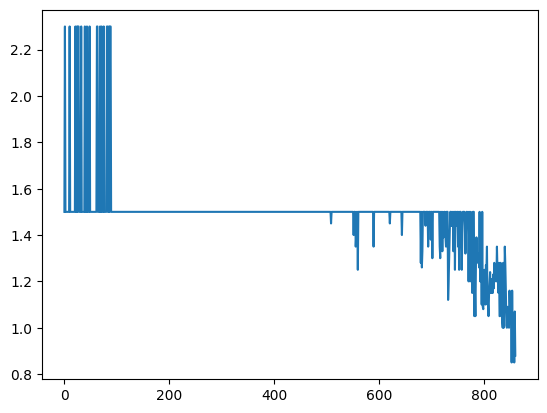

In [78]:
plt.plot(amp_array)

In [72]:
Training_XF_Data, fourier_padded_data = a.fourier_for_array(a.secure_split(padded_data[:3065], 64), 44100)


216064

In [74]:
len(code_array[1504])
duration_array[1504]
8.9  * 44100

392490.0

In [63]:
a = decoder()
True_Training_Data = np.zeros(shape = (856, 64, 3065))#Преобразование фурье для собранных данных
for i in range(856):
    data = np.array(td[i])
    increment = int((392490 - len(data)) / 2)
    padded_data = np.concatenate((np.zeros(increment), data, np.zeros(increment)))
    Training_XF_Data, fourier_padded_data_1 = a.fourier_for_array(a.secure_split(padded_data, 64), 44100)
    fourier_padded_data = np.zeros((64, 3065))
    for j in range(len(fourier_padded_data)):
      fourier_padded_data[j] = fourier_padded_data_1[j][:3065]
    True_Training_Data[i] = fourier_padded_data[:]

In [111]:
np.max(True_Training_Data)

2373389.879721985

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
Train_freq0_array = np.zeros((856, 64))
Train_freq1_array = np.zeros((856, 64))
a = decoder()
a.set_freqses(1000, 1500)
for i in range(856):
    yf_array = True_Training_Data[i]
    yf_array = a.normalize_data_array(yf_array, Training_XF_Data, 1000, 1500)
    for j in range(64):
        yf = yf_array[j]
        amp_freq0, amp_freq1 = a.freq_sum(yf, Training_XF_Data, 1000), a.freq_sum(yf, Training_XF_Data, 1500)
        Train_freq0_array[i, j], Train_freq1_array[i, j] = amp_freq0, amp_freq1



In [108]:
np.max(Train_freq1_array), len(yf_array)

(51.84026190283571, 64)

In [109]:
TrainingDataset = pd.DataFrame(index = np.linspace(0, 855, 856))
TrainingDataset[[f"f{i}_freq0" for i in range(64)]] = 0
TrainingDataset[[f"f{i}_freq1" for i in range(64)]] = 0
TrainingDataset["max_param"] = 0
TrainingDataset["amp_threshold"] = 0
TrainingDataset["x_position"] = 0
for i in range(64):
    for j in range(856):
        TrainingDataset[f"f{i}_freq0"][j] = Train_freq0_array[j,i]
        TrainingDataset[f"f{i}_freq1"][j] = Train_freq1_array[j,i]
        TrainingDataset["max_param"][j] = param_array[j]
        TrainingDataset["amp_threshold"][j] = amp_array[j]
        TrainingDataset["x_position"][j] = x_array[j]
TrainingDataset#Создание конечного датасета

,f0_freq0,f1_freq0,f2_freq0,f3_freq0,f4_freq0,f5_freq0,f6_freq0,f7_freq0,f8_freq0,f9_freq0,...,f57_freq1,f58_freq1,f59_freq1,f60_freq1,f61_freq1,f62_freq1,f63_freq1,max_param,amp_threshold,x_position
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,1.50,2374
1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,2.30,4395
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,1.50,3725
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,1.50,3801
4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,1.50,3601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851.0,0.021017,0.022497,0.024656,0.012635,0.019980,0.015657,0.022395,0.022664,0.018345,0.014537,...,2.241751,1.251971,0.255289,0.038765,0.010654,0.007782,0.010189,3,1.10,4065
852.0,0.020910,0.012653,0.012645,0.023136,0.015172,0.014234,0.019621,0.019511,0.019912,0.022529,...,0.065808,0.022676,0.012070,0.013299,0.011748,0.009476,0.016354,2,0.85,4076
853.0,0.027006,0.023018,0.023370,0.022168,0.025780,0.033111,0.034665,0.035115,0.027016,0.019135,...,0.033709,0.021132,0.005710,0.005947,0.006579,0.008594,0.009577,2,1.16,3982
854.0,0.021773,0.021561,0.016379,0.022514,0.017173,0.011759,0.021688,0.016461,0.022318,0.019087,...,2.375190,1.335513,0.255109,0.041774,0.009767,0.007232,0.011165,2,0.95,3687


In [90]:
X = TrainingDataset.drop(columns = ["max_param", "amp_threshold", "x_position"])
y = TrainingDataset[["max_param", "amp_threshold", "x_position"]]

In [13]:
TrainingDataset

,f0_freq0,f1_freq0,f2_freq0,f3_freq0,f4_freq0,f5_freq0,f6_freq0,f7_freq0,f8_freq0,f9_freq0,...,f57_freq1,f58_freq1,f59_freq1,f60_freq1,f61_freq1,f62_freq1,f63_freq1,max_param,amp_threshold,length
0,0.122921,0.154449,0.229447,0.409696,0.167682,0.105942,0.107506,0.140358,0.065110,0.139592,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.99,4
1,0.042877,0.045239,0.061720,0.063699,0.052829,0.095235,0.051877,0.066920,0.222249,0.052747,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.54,4
2,0.119038,0.119468,0.125734,0.149360,0.096273,0.237518,0.151898,0.142295,0.185614,0.133377,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.76,4
3,0.120825,0.159579,0.097711,0.101082,0.151825,0.186910,0.087471,0.367049,0.190753,0.132302,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.82,4
4,0.126829,0.184287,0.141417,0.193877,0.103230,0.048362,0.163119,0.209220,0.182319,0.122975,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.63,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.003451,0.004447,0.008657,0.006718,0.008872,0.003921,0.005415,0.008062,0.006881,0.006145,...,1.622959,0.073616,0.010136,0.003677,0.005632,0.003502,0.002715,2,0.99,64
279,0.006634,0.004733,0.008560,0.003606,0.005768,0.007504,0.009368,0.008457,0.009200,0.008119,...,1.762585,0.093952,0.012084,0.005941,0.003292,0.005011,0.004733,2,0.99,64
280,0.007051,0.008490,0.010663,0.009003,0.008198,0.009136,0.007512,0.007514,0.007322,0.009069,...,0.181647,0.036029,0.003480,0.003514,0.004506,0.004664,0.004358,2,0.99,64
281,0.007917,0.006686,0.006220,0.005961,0.006623,0.010409,0.005074,0.009230,0.010030,0.006652,...,2.291145,1.125921,0.036541,0.007514,0.004069,0.005200,0.002881,2,0.99,64


In [112]:
TrainingDataset.to_csv("Dataset2_correct.csv", index = False)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)#Т.к данных собрано (пока что) не очень много, выбран достаточно большой коэффициент

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (56, 128), (56,)
Test dataset size: (227, 128), (227,)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.40344778956331157
Mean Squared Error: 0.2722166229155917
